# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2020.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           198 non-null    float64
 1   Ln_M_stem_kg_m2       198 non-null    float64
 2   Ln_M_stem_bark_kg_m2  198 non-null    float64
 3   Ln_M_crown_kg_m2      198 non-null    float64
 4   Ln_M_foliage_kg_m2    198 non-null    float64
 5   Ln_M_AG_kg_m2         198 non-null    float64
 6   Ln_Cs_wood            198 non-null    float64
 7   Ln_Sr_wood            198 non-null    float64
 8   Ln_Tag_Cs             198 non-null    float64
 9   Ln_Tag_Sr             198 non-null    float64
 10  r2020B01              198 non-null    float64
 11  r2020B02              198 non-null    float64
 12  r2020B03              198 non-null    float64
 13  r2020B04              198 non-null    float64
 14  r2020B05              198 non-null    float64
 15  r2020B06              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_14499/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            123.0  304.699187  185.582068    2.0  150.5  319.0  457.5   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          123.0  11.991789  7.094609   0.05   6.285  12.37   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.645  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.234646,2.081717,-0.039242,0.171313,-0.953081,2.305758,6.052020,7.395960,-0.566667,2.342424,...,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.129652,1.126519,0.789675,0.588506,0.719719,0.931192,2.089707,2.070848,1.250989,0.939283,...,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.960000,1.812500,-0.190000,-0.025000,-1.525000,2.052500,4.300000,5.800000,-1.300000,1.700000,...,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.510000,2.420000,0.060000,0.310000,-0.690000,2.580000,6.400000,7.600000,-0.500000,2.500000,...,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.987500,2.807500,0.387500,0.530000,-0.360000,2.937500,7.400000,8.800000,0.400000,3.000000,...,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


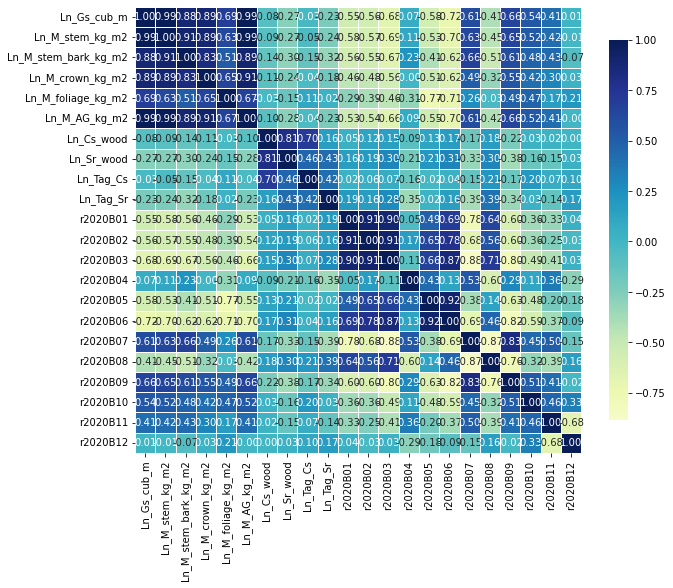

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2020B01', 'r2020B03', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B10', 'r2020B11'])
y = pd.DataFrame(select, columns= ['Ln_Gs_cub_m'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B03,r2020B05,r2020B06,r2020B07,r2020B10,r2020B11
0,0.019397,0.028616,0.175280,0.086611,0.797761,-15.527246,-11.385074
1,0.019167,0.022230,0.092225,0.047120,0.789129,-16.547673,-10.947565
2,0.019568,0.021190,0.093062,0.043824,0.812120,-14.341917,-11.884799
3,0.020556,0.025284,0.102872,0.048585,0.762431,-14.885610,-11.725163
4,0.019003,0.024911,0.096981,0.044880,0.793606,-14.647913,-11.512282


In [11]:
# Columns in "y" data collections
y.head()

,Ln_Gs_cub_m
0,4.81
1,5.76
2,5.85
3,5.75
4,5.95


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.4442847640435571, 0.3825208390997815, 0.16526961530567086]
    Mean: 0.331
    Std: 0.120

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.89660833 0.93550958 0.97214557]
    Mean: 0.935
    Std: 0.031

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7239184319611752, 0.7584259140130246, 0.6134196570425323]
    Mean: 0.699
    Std: 0.062

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.337 (std: 0.219)
Parameters: {'colsample_bytree': 0.096116898742868, 'gamma': 0.45423317193339313, 'learning_rate': 0.050926550350538474, 'max_depth': 3, 'n_estimators': 92, 'subsample': 0.30591744767868656}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.19690065, 0.29320683, 0.23082933, ..., 0.17213392, 0.11324787,
       0.11197205]), 'std_fit_time': array([0.00553242, 0.0048925 , 0.01125635, ..., 0.00165052, 0.00353057,
       0.00809123]), 'mean_score_time': array([0.00450397, 0.004601  , 0.00454102, ..., 0.00464425, 0.00447845,
       0.00458984]), 'std_score_time': array([5.56581522e-05, 1.58271225e-04, 8.01992188e-05, ...,
       4.85122033e-04, 4.30847507e-04, 2.17770251e-04]), 'param_colsample_bytree': masked_array(data=[0.10127557660786254, 0.10606590502985824,
                   0.6234007255265358, ..., 0.907561012385274,
                   0.4149882315903778, 0.35511280428365594],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.08123937846977952, 0.22247367890444153,
                   0.19142471784112125, ..., 0.13969184706200144,
                   0.17657005775202494, 0.32516539818733065],
 

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.096116898742868
Gamma: 0.45423317193339313
Learning_rate: 0.050926550350538474
Max_depth: 3
N_estimators: 92
Subsample: 0.30591744767868656


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:4.62002	validation_1-rmse:4.77364
[1]	validation_0-rmse:4.40279	validation_1-rmse:4.54907
[2]	validation_0-rmse:4.20077	validation_1-rmse:4.35847
[3]	validation_0-rmse:3.99214	validation_1-rmse:4.14998
[4]	validation_0-rmse:3.80046	validation_1-rmse:3.95519
[5]	validation_0-rmse:3.62670	validation_1-rmse:3.77026
[6]	validation_0-rmse:3.46292	validation_1-rmse:3.60433
[7]	validation_0-rmse:3.29637	validation_1-rmse:3.43374
[8]	validation_0-rmse:3.13921	validation_1-rmse:3.27283
[9]	validation_0-rmse:2.99666	validation_1-rmse:3.12807
[10]	validation_0-rmse:2.86921	validation_1-rmse:3.00026
[11]	validation_0-rmse:2.73895	validation_1-rmse:2.86582
[12]	validation_0-rmse:2.60867	validation_1-rmse:2.73174
[13]	validation_0-rmse:2.50042	validation_1-rmse:2.62344
[14]	validation_0-rmse:2.38416	validation_1-rmse:2.50289
[15]	validation_0-rmse:2.27530	validation_1-rmse:2.38903
[16]	validation_0-rmse:2.17454	validation_1-rmse:2.28365
[17]	validation_0-rmse:2.08442	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:1.64831	validation_1-rmse:1.72878
[24]	validation_0-rmse:1.58594	validation_1-rmse:1.66366
[25]	validation_0-rmse:1.52374	validation_1-rmse:1.59972
[26]	validation_0-rmse:1.47674	validation_1-rmse:1.55102
[27]	validation_0-rmse:1.43044	validation_1-rmse:1.50767
[28]	validation_0-rmse:1.38388	validation_1-rmse:1.46200
[29]	validation_0-rmse:1.33524	validation_1-rmse:1.40761
[30]	validation_0-rmse:1.28624	validation_1-rmse:1.35469
[31]	validation_0-rmse:1.25423	validation_1-rmse:1.32067
[32]	validation_0-rmse:1.21302	validation_1-rmse:1.27199
[33]	validation_0-rmse:1.18203	validation_1-rmse:1.24094
[34]	validation_0-rmse:1.14329	validation_1-rmse:1.20109
[35]	validation_0-rmse:1.11001	validation_1-rmse:1.16369
[36]	validation_0-rmse:1.07825	validation_1-rmse:1.12611
[37]	validation_0-rmse:1.05233	validation_1-rmse:1.10267
[38]	validation_0-rmse:1.02525	validation_1-rmse:1.07449
[39]	validation_0-rmse:1.00044	validation_1-rmse:1.03846
[40]	validation_0-rmse:0.97923	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:2.74748	validation_1-rmse:2.74493
[12]	validation_0-rmse:2.62082	validation_1-rmse:2.61765
[13]	validation_0-rmse:2.50725	validation_1-rmse:2.50862
[14]	validation_0-rmse:2.38731	validation_1-rmse:2.38749
[15]	validation_0-rmse:2.27995	validation_1-rmse:2.28014
[16]	validation_0-rmse:2.18491	validation_1-rmse:2.18160
[17]	validation_0-rmse:2.09386	validation_1-rmse:2.09067
[18]	validation_0-rmse:1.99794	validation_1-rmse:2.00392
[19]	validation_0-rmse:1.91991	validation_1-rmse:1.92741
[20]	validation_0-rmse:1.84052	validation_1-rmse:1.84828
[21]	validation_0-rmse:1.76414	validation_1-rmse:1.77570
[22]	validation_0-rmse:1.68990	validation_1-rmse:1.70154
[23]	validation_0-rmse:1.63550	validation_1-rmse:1.65397
[24]	validation_0-rmse:1.57929	validation_1-rmse:1.60158
[25]	validation_0-rmse:1.52085	validation_1-rmse:1.54964
[26]	validation_0-rmse:1.46509	validation_1-rmse:1.49063
[27]	validation_0-rmse:1.41403	validation_1-rmse:1.43807
[28]	validation_0-rmse:1.36834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:2.41426	validation_1-rmse:2.35186
[15]	validation_0-rmse:2.30829	validation_1-rmse:2.24784
[16]	validation_0-rmse:2.20611	validation_1-rmse:2.14964
[17]	validation_0-rmse:2.12068	validation_1-rmse:2.07302
[18]	validation_0-rmse:2.02742	validation_1-rmse:1.98369
[19]	validation_0-rmse:1.95362	validation_1-rmse:1.91050
[20]	validation_0-rmse:1.87788	validation_1-rmse:1.83765
[21]	validation_0-rmse:1.79527	validation_1-rmse:1.76305
[22]	validation_0-rmse:1.72103	validation_1-rmse:1.69277
[23]	validation_0-rmse:1.65618	validation_1-rmse:1.62766
[24]	validation_0-rmse:1.58615	validation_1-rmse:1.56085
[25]	validation_0-rmse:1.52515	validation_1-rmse:1.50003
[26]	validation_0-rmse:1.46750	validation_1-rmse:1.44606
[27]	validation_0-rmse:1.41520	validation_1-rmse:1.39762
[28]	validation_0-rmse:1.36166	validation_1-rmse:1.34642
[29]	validation_0-rmse:1.31024	validation_1-rmse:1.29603
[30]	validation_0-rmse:1.26813	validation_1-rmse:1.26120
[31]	validation_0-rmse:1.22377	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:3.28507	validation_1-rmse:3.41606
[8]	validation_0-rmse:3.13874	validation_1-rmse:3.26813
[9]	validation_0-rmse:2.99151	validation_1-rmse:3.11708
[10]	validation_0-rmse:2.86467	validation_1-rmse:2.99291
[11]	validation_0-rmse:2.73663	validation_1-rmse:2.86300
[12]	validation_0-rmse:2.60988	validation_1-rmse:2.73489
[13]	validation_0-rmse:2.49526	validation_1-rmse:2.62128
[14]	validation_0-rmse:2.38607	validation_1-rmse:2.50826
[15]	validation_0-rmse:2.28093	validation_1-rmse:2.40645
[16]	validation_0-rmse:2.18547	validation_1-rmse:2.30848
[17]	validation_0-rmse:2.09149	validation_1-rmse:2.21202
[18]	validation_0-rmse:2.01613	validation_1-rmse:2.14335
[19]	validation_0-rmse:1.93778	validation_1-rmse:2.06263
[20]	validation_0-rmse:1.85422	validation_1-rmse:1.97653
[21]	validation_0-rmse:1.78442	validation_1-rmse:1.90202
[22]	validation_0-rmse:1.71634	validation_1-rmse:1.83228
[23]	validation_0-rmse:1.65516	validation_1-rmse:1.76927
[24]	validation_0-rmse:1.58839	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:2.11051	validation_1-rmse:2.17974
[18]	validation_0-rmse:2.01167	validation_1-rmse:2.08932
[19]	validation_0-rmse:1.93112	validation_1-rmse:2.01350
[20]	validation_0-rmse:1.84902	validation_1-rmse:1.93801
[21]	validation_0-rmse:1.77184	validation_1-rmse:1.86981
[22]	validation_0-rmse:1.70186	validation_1-rmse:1.80936
[23]	validation_0-rmse:1.64038	validation_1-rmse:1.75841
[24]	validation_0-rmse:1.57439	validation_1-rmse:1.70029
[25]	validation_0-rmse:1.51064	validation_1-rmse:1.65144
[26]	validation_0-rmse:1.45000	validation_1-rmse:1.59748
[27]	validation_0-rmse:1.39685	validation_1-rmse:1.55353
[28]	validation_0-rmse:1.34816	validation_1-rmse:1.51824
[29]	validation_0-rmse:1.30377	validation_1-rmse:1.48020
[30]	validation_0-rmse:1.25747	validation_1-rmse:1.44239
[31]	validation_0-rmse:1.21499	validation_1-rmse:1.41021
[32]	validation_0-rmse:1.17182	validation_1-rmse:1.37220
[33]	validation_0-rmse:1.13198	validation_1-rmse:1.34213
[34]	validation_0-rmse:1.09893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:2.20330	validation_1-rmse:2.12083
[17]	validation_0-rmse:2.10944	validation_1-rmse:2.04075
[18]	validation_0-rmse:2.01257	validation_1-rmse:1.94614
[19]	validation_0-rmse:1.92111	validation_1-rmse:1.86043
[20]	validation_0-rmse:1.84473	validation_1-rmse:1.79070
[21]	validation_0-rmse:1.76866	validation_1-rmse:1.73140
[22]	validation_0-rmse:1.70038	validation_1-rmse:1.66983
[23]	validation_0-rmse:1.63350	validation_1-rmse:1.60976
[24]	validation_0-rmse:1.57650	validation_1-rmse:1.55895
[25]	validation_0-rmse:1.51935	validation_1-rmse:1.50543
[26]	validation_0-rmse:1.46209	validation_1-rmse:1.46010
[27]	validation_0-rmse:1.40719	validation_1-rmse:1.41325
[28]	validation_0-rmse:1.35125	validation_1-rmse:1.36455
[29]	validation_0-rmse:1.30647	validation_1-rmse:1.32755
[30]	validation_0-rmse:1.26442	validation_1-rmse:1.28899
[31]	validation_0-rmse:1.22276	validation_1-rmse:1.25095
[32]	validation_0-rmse:1.17874	validation_1-rmse:1.21977
[33]	validation_0-rmse:1.13956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.91300	validation_1-rmse:2.01187
[20]	validation_0-rmse:1.82892	validation_1-rmse:1.93268
[21]	validation_0-rmse:1.75684	validation_1-rmse:1.86205
[22]	validation_0-rmse:1.68084	validation_1-rmse:1.79053
[23]	validation_0-rmse:1.61540	validation_1-rmse:1.73164
[24]	validation_0-rmse:1.55073	validation_1-rmse:1.67242
[25]	validation_0-rmse:1.49483	validation_1-rmse:1.62520
[26]	validation_0-rmse:1.43396	validation_1-rmse:1.56861
[27]	validation_0-rmse:1.38264	validation_1-rmse:1.51982
[28]	validation_0-rmse:1.33439	validation_1-rmse:1.47929
[29]	validation_0-rmse:1.28561	validation_1-rmse:1.43421
[30]	validation_0-rmse:1.23859	validation_1-rmse:1.39815
[31]	validation_0-rmse:1.20009	validation_1-rmse:1.36096
[32]	validation_0-rmse:1.16200	validation_1-rmse:1.33026
[33]	validation_0-rmse:1.12677	validation_1-rmse:1.29848
[34]	validation_0-rmse:1.09772	validation_1-rmse:1.27116
[35]	validation_0-rmse:1.06965	validation_1-rmse:1.24703
[36]	validation_0-rmse:1.04645	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.70258	validation_1-rmse:1.77784
[23]	validation_0-rmse:1.62981	validation_1-rmse:1.70723
[24]	validation_0-rmse:1.57094	validation_1-rmse:1.65249
[25]	validation_0-rmse:1.51312	validation_1-rmse:1.60057
[26]	validation_0-rmse:1.46674	validation_1-rmse:1.55961
[27]	validation_0-rmse:1.41836	validation_1-rmse:1.51816
[28]	validation_0-rmse:1.36299	validation_1-rmse:1.46686
[29]	validation_0-rmse:1.31320	validation_1-rmse:1.42068
[30]	validation_0-rmse:1.26745	validation_1-rmse:1.37597
[31]	validation_0-rmse:1.22904	validation_1-rmse:1.34289
[32]	validation_0-rmse:1.19083	validation_1-rmse:1.30851
[33]	validation_0-rmse:1.15269	validation_1-rmse:1.27889
[34]	validation_0-rmse:1.11941	validation_1-rmse:1.25188
[35]	validation_0-rmse:1.09009	validation_1-rmse:1.22951
[36]	validation_0-rmse:1.06175	validation_1-rmse:1.20568
[37]	validation_0-rmse:1.03081	validation_1-rmse:1.17686
[38]	validation_0-rmse:1.00341	validation_1-rmse:1.15261
[39]	validation_0-rmse:0.97710	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.85538	validation_1-rmse:1.76540
[21]	validation_0-rmse:1.77485	validation_1-rmse:1.69926
[22]	validation_0-rmse:1.70105	validation_1-rmse:1.64013
[23]	validation_0-rmse:1.63112	validation_1-rmse:1.57632
[24]	validation_0-rmse:1.56750	validation_1-rmse:1.52451
[25]	validation_0-rmse:1.50678	validation_1-rmse:1.47377
[26]	validation_0-rmse:1.44564	validation_1-rmse:1.43149
[27]	validation_0-rmse:1.39373	validation_1-rmse:1.38972
[28]	validation_0-rmse:1.34352	validation_1-rmse:1.34916
[29]	validation_0-rmse:1.29669	validation_1-rmse:1.31469
[30]	validation_0-rmse:1.25225	validation_1-rmse:1.28477
[31]	validation_0-rmse:1.20925	validation_1-rmse:1.25231
[32]	validation_0-rmse:1.16943	validation_1-rmse:1.22584
[33]	validation_0-rmse:1.12918	validation_1-rmse:1.19651
[34]	validation_0-rmse:1.09595	validation_1-rmse:1.17605
[35]	validation_0-rmse:1.06350	validation_1-rmse:1.14833
[36]	validation_0-rmse:1.03446	validation_1-rmse:1.13021
[37]	validation_0-rmse:1.00399	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:2.30040	validation_1-rmse:2.35841
[16]	validation_0-rmse:2.20012	validation_1-rmse:2.26105
[17]	validation_0-rmse:2.11189	validation_1-rmse:2.17657
[18]	validation_0-rmse:2.00987	validation_1-rmse:2.07435
[19]	validation_0-rmse:1.92926	validation_1-rmse:1.99278
[20]	validation_0-rmse:1.84810	validation_1-rmse:1.91850
[21]	validation_0-rmse:1.77395	validation_1-rmse:1.84472
[22]	validation_0-rmse:1.70357	validation_1-rmse:1.77435
[23]	validation_0-rmse:1.63534	validation_1-rmse:1.71244
[24]	validation_0-rmse:1.57276	validation_1-rmse:1.65476
[25]	validation_0-rmse:1.50702	validation_1-rmse:1.59987
[26]	validation_0-rmse:1.45798	validation_1-rmse:1.55994
[27]	validation_0-rmse:1.39687	validation_1-rmse:1.49947
[28]	validation_0-rmse:1.35287	validation_1-rmse:1.46140
[29]	validation_0-rmse:1.30441	validation_1-rmse:1.42304
[30]	validation_0-rmse:1.25255	validation_1-rmse:1.37513
[31]	validation_0-rmse:1.21042	validation_1-rmse:1.33431
[32]	validation_0-rmse:1.16602	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:2.29007	validation_1-rmse:2.24424
[16]	validation_0-rmse:2.19047	validation_1-rmse:2.14245
[17]	validation_0-rmse:2.09417	validation_1-rmse:2.03844
[18]	validation_0-rmse:2.01767	validation_1-rmse:1.95498
[19]	validation_0-rmse:1.93708	validation_1-rmse:1.87225
[20]	validation_0-rmse:1.85898	validation_1-rmse:1.78681
[21]	validation_0-rmse:1.78635	validation_1-rmse:1.70685
[22]	validation_0-rmse:1.71949	validation_1-rmse:1.63390
[23]	validation_0-rmse:1.65616	validation_1-rmse:1.56443
[24]	validation_0-rmse:1.60002	validation_1-rmse:1.50534
[25]	validation_0-rmse:1.53594	validation_1-rmse:1.43664
[26]	validation_0-rmse:1.47712	validation_1-rmse:1.37315
[27]	validation_0-rmse:1.42077	validation_1-rmse:1.32026
[28]	validation_0-rmse:1.37644	validation_1-rmse:1.26991
[29]	validation_0-rmse:1.32902	validation_1-rmse:1.22631
[30]	validation_0-rmse:1.28186	validation_1-rmse:1.17690
[31]	validation_0-rmse:1.24328	validation_1-rmse:1.13260
[32]	validation_0-rmse:1.19984	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.90949	validation_1-rmse:1.78605
[20]	validation_0-rmse:1.82908	validation_1-rmse:1.71923
[21]	validation_0-rmse:1.75206	validation_1-rmse:1.65460
[22]	validation_0-rmse:1.68300	validation_1-rmse:1.59646
[23]	validation_0-rmse:1.61669	validation_1-rmse:1.55360
[24]	validation_0-rmse:1.56816	validation_1-rmse:1.50889
[25]	validation_0-rmse:1.50930	validation_1-rmse:1.46223
[26]	validation_0-rmse:1.44997	validation_1-rmse:1.41521
[27]	validation_0-rmse:1.39548	validation_1-rmse:1.38097
[28]	validation_0-rmse:1.34901	validation_1-rmse:1.35031
[29]	validation_0-rmse:1.29829	validation_1-rmse:1.31552
[30]	validation_0-rmse:1.25839	validation_1-rmse:1.28677
[31]	validation_0-rmse:1.21204	validation_1-rmse:1.26949
[32]	validation_0-rmse:1.16541	validation_1-rmse:1.23920
[33]	validation_0-rmse:1.12893	validation_1-rmse:1.21576
[34]	validation_0-rmse:1.09336	validation_1-rmse:1.18932
[35]	validation_0-rmse:1.05896	validation_1-rmse:1.17403
[36]	validation_0-rmse:1.02586	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.75870	validation_1-rmse:1.76580
[22]	validation_0-rmse:1.68778	validation_1-rmse:1.69857
[23]	validation_0-rmse:1.62595	validation_1-rmse:1.63306
[24]	validation_0-rmse:1.56963	validation_1-rmse:1.57854
[25]	validation_0-rmse:1.50748	validation_1-rmse:1.51413
[26]	validation_0-rmse:1.44876	validation_1-rmse:1.45721
[27]	validation_0-rmse:1.39797	validation_1-rmse:1.40459
[28]	validation_0-rmse:1.34687	validation_1-rmse:1.35364
[29]	validation_0-rmse:1.29806	validation_1-rmse:1.30386
[30]	validation_0-rmse:1.24762	validation_1-rmse:1.25113
[31]	validation_0-rmse:1.21249	validation_1-rmse:1.21551
[32]	validation_0-rmse:1.17368	validation_1-rmse:1.18048
[33]	validation_0-rmse:1.13632	validation_1-rmse:1.14175
[34]	validation_0-rmse:1.10010	validation_1-rmse:1.10514
[35]	validation_0-rmse:1.07158	validation_1-rmse:1.09659
[36]	validation_0-rmse:1.04264	validation_1-rmse:1.06898
[37]	validation_0-rmse:1.01905	validation_1-rmse:1.04379
[38]	validation_0-rmse:0.99392	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.71739	validation_1-rmse:1.84837
[23]	validation_0-rmse:1.64904	validation_1-rmse:1.77507
[24]	validation_0-rmse:1.59600	validation_1-rmse:1.71648
[25]	validation_0-rmse:1.53596	validation_1-rmse:1.65609
[26]	validation_0-rmse:1.47449	validation_1-rmse:1.59286
[27]	validation_0-rmse:1.41851	validation_1-rmse:1.53308
[28]	validation_0-rmse:1.37239	validation_1-rmse:1.48993
[29]	validation_0-rmse:1.32967	validation_1-rmse:1.44277
[30]	validation_0-rmse:1.28604	validation_1-rmse:1.39562
[31]	validation_0-rmse:1.24617	validation_1-rmse:1.35298
[32]	validation_0-rmse:1.20342	validation_1-rmse:1.30235
[33]	validation_0-rmse:1.17050	validation_1-rmse:1.26946
[34]	validation_0-rmse:1.13411	validation_1-rmse:1.23269
[35]	validation_0-rmse:1.10461	validation_1-rmse:1.20075
[36]	validation_0-rmse:1.08100	validation_1-rmse:1.17303
[37]	validation_0-rmse:1.05051	validation_1-rmse:1.13844
[38]	validation_0-rmse:1.02499	validation_1-rmse:1.10657
[39]	validation_0-rmse:1.00012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.69918	validation_1-rmse:1.65764
[23]	validation_0-rmse:1.63124	validation_1-rmse:1.59982
[24]	validation_0-rmse:1.56533	validation_1-rmse:1.54407
[25]	validation_0-rmse:1.50456	validation_1-rmse:1.49477
[26]	validation_0-rmse:1.44737	validation_1-rmse:1.44860
[27]	validation_0-rmse:1.40163	validation_1-rmse:1.41400
[28]	validation_0-rmse:1.35021	validation_1-rmse:1.38107
[29]	validation_0-rmse:1.29812	validation_1-rmse:1.34440
[30]	validation_0-rmse:1.25610	validation_1-rmse:1.31389
[31]	validation_0-rmse:1.20933	validation_1-rmse:1.28771
[32]	validation_0-rmse:1.16637	validation_1-rmse:1.26361
[33]	validation_0-rmse:1.12761	validation_1-rmse:1.23274
[34]	validation_0-rmse:1.09341	validation_1-rmse:1.21117
[35]	validation_0-rmse:1.06318	validation_1-rmse:1.19239
[36]	validation_0-rmse:1.03409	validation_1-rmse:1.17553
[37]	validation_0-rmse:1.00381	validation_1-rmse:1.15608
[38]	validation_0-rmse:0.98104	validation_1-rmse:1.14221
[39]	validation_0-rmse:0.95834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.69410	validation_1-rmse:1.69628
[23]	validation_0-rmse:1.63059	validation_1-rmse:1.63111
[24]	validation_0-rmse:1.57561	validation_1-rmse:1.57967
[25]	validation_0-rmse:1.51508	validation_1-rmse:1.51804
[26]	validation_0-rmse:1.46053	validation_1-rmse:1.46551
[27]	validation_0-rmse:1.40448	validation_1-rmse:1.40727
[28]	validation_0-rmse:1.35736	validation_1-rmse:1.35970
[29]	validation_0-rmse:1.30847	validation_1-rmse:1.31019
[30]	validation_0-rmse:1.26419	validation_1-rmse:1.26892
[31]	validation_0-rmse:1.22155	validation_1-rmse:1.22355
[32]	validation_0-rmse:1.18662	validation_1-rmse:1.18618
[33]	validation_0-rmse:1.15304	validation_1-rmse:1.15404
[34]	validation_0-rmse:1.12130	validation_1-rmse:1.12153
[35]	validation_0-rmse:1.09359	validation_1-rmse:1.09711
[36]	validation_0-rmse:1.06686	validation_1-rmse:1.06635
[37]	validation_0-rmse:1.03640	validation_1-rmse:1.03274
[38]	validation_0-rmse:1.01237	validation_1-rmse:1.00890
[39]	validation_0-rmse:0.98454	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:2.09837	validation_1-rmse:1.91347
[18]	validation_0-rmse:2.00949	validation_1-rmse:1.83308
[19]	validation_0-rmse:1.92870	validation_1-rmse:1.75962
[20]	validation_0-rmse:1.84726	validation_1-rmse:1.68764
[21]	validation_0-rmse:1.76139	validation_1-rmse:1.61532
[22]	validation_0-rmse:1.68792	validation_1-rmse:1.55338
[23]	validation_0-rmse:1.60908	validation_1-rmse:1.48815
[24]	validation_0-rmse:1.55466	validation_1-rmse:1.44704
[25]	validation_0-rmse:1.50090	validation_1-rmse:1.40821
[26]	validation_0-rmse:1.45437	validation_1-rmse:1.37146
[27]	validation_0-rmse:1.40052	validation_1-rmse:1.34356
[28]	validation_0-rmse:1.35424	validation_1-rmse:1.31382
[29]	validation_0-rmse:1.30271	validation_1-rmse:1.28179
[30]	validation_0-rmse:1.26073	validation_1-rmse:1.25025
[31]	validation_0-rmse:1.22183	validation_1-rmse:1.22787
[32]	validation_0-rmse:1.17892	validation_1-rmse:1.19763
[33]	validation_0-rmse:1.14841	validation_1-rmse:1.18049
[34]	validation_0-rmse:1.11939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:2.03267	validation_1-rmse:1.95607
[19]	validation_0-rmse:1.94900	validation_1-rmse:1.87317
[20]	validation_0-rmse:1.87202	validation_1-rmse:1.79701
[21]	validation_0-rmse:1.80508	validation_1-rmse:1.73879
[22]	validation_0-rmse:1.73558	validation_1-rmse:1.66956
[23]	validation_0-rmse:1.67381	validation_1-rmse:1.60662
[24]	validation_0-rmse:1.60360	validation_1-rmse:1.54193
[25]	validation_0-rmse:1.54028	validation_1-rmse:1.47966
[26]	validation_0-rmse:1.48207	validation_1-rmse:1.42301
[27]	validation_0-rmse:1.42849	validation_1-rmse:1.37178
[28]	validation_0-rmse:1.38245	validation_1-rmse:1.32994
[29]	validation_0-rmse:1.33903	validation_1-rmse:1.28709
[30]	validation_0-rmse:1.29014	validation_1-rmse:1.23561
[31]	validation_0-rmse:1.25323	validation_1-rmse:1.20260
[32]	validation_0-rmse:1.20781	validation_1-rmse:1.15631
[33]	validation_0-rmse:1.16997	validation_1-rmse:1.13051
[34]	validation_0-rmse:1.12984	validation_1-rmse:1.09906
[35]	validation_0-rmse:1.10232	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.91477	validation_1-rmse:1.95960
[20]	validation_0-rmse:1.83015	validation_1-rmse:1.87596
[21]	validation_0-rmse:1.76130	validation_1-rmse:1.80741
[22]	validation_0-rmse:1.69085	validation_1-rmse:1.74132
[23]	validation_0-rmse:1.62611	validation_1-rmse:1.68064
[24]	validation_0-rmse:1.56444	validation_1-rmse:1.62110
[25]	validation_0-rmse:1.50234	validation_1-rmse:1.56580
[26]	validation_0-rmse:1.44004	validation_1-rmse:1.50625
[27]	validation_0-rmse:1.38994	validation_1-rmse:1.46332
[28]	validation_0-rmse:1.33879	validation_1-rmse:1.42157
[29]	validation_0-rmse:1.29249	validation_1-rmse:1.38283
[30]	validation_0-rmse:1.24646	validation_1-rmse:1.34329
[31]	validation_0-rmse:1.20742	validation_1-rmse:1.31149
[32]	validation_0-rmse:1.16722	validation_1-rmse:1.27297
[33]	validation_0-rmse:1.12945	validation_1-rmse:1.24338
[34]	validation_0-rmse:1.09558	validation_1-rmse:1.21714
[35]	validation_0-rmse:1.07147	validation_1-rmse:1.19468
[36]	validation_0-rmse:1.04729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.79453	validation_1-rmse:1.80456
[22]	validation_0-rmse:1.72662	validation_1-rmse:1.73848
[23]	validation_0-rmse:1.66400	validation_1-rmse:1.67282
[24]	validation_0-rmse:1.60924	validation_1-rmse:1.62354
[25]	validation_0-rmse:1.54929	validation_1-rmse:1.56003
[26]	validation_0-rmse:1.49779	validation_1-rmse:1.52680
[27]	validation_0-rmse:1.44278	validation_1-rmse:1.47009
[28]	validation_0-rmse:1.38513	validation_1-rmse:1.41104
[29]	validation_0-rmse:1.33780	validation_1-rmse:1.36735
[30]	validation_0-rmse:1.28644	validation_1-rmse:1.32144
[31]	validation_0-rmse:1.24663	validation_1-rmse:1.27945
[32]	validation_0-rmse:1.20181	validation_1-rmse:1.24988
[33]	validation_0-rmse:1.16802	validation_1-rmse:1.21643
[34]	validation_0-rmse:1.13924	validation_1-rmse:1.19585
[35]	validation_0-rmse:1.10725	validation_1-rmse:1.16892
[36]	validation_0-rmse:1.07428	validation_1-rmse:1.13471
[37]	validation_0-rmse:1.04456	validation_1-rmse:1.11089
[38]	validation_0-rmse:1.02171	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.50238	validation_1-rmse:1.58565
[26]	validation_0-rmse:1.44731	validation_1-rmse:1.53623
[27]	validation_0-rmse:1.39264	validation_1-rmse:1.49020
[28]	validation_0-rmse:1.34209	validation_1-rmse:1.44271
[29]	validation_0-rmse:1.29849	validation_1-rmse:1.39868
[30]	validation_0-rmse:1.25940	validation_1-rmse:1.36284
[31]	validation_0-rmse:1.22362	validation_1-rmse:1.32950
[32]	validation_0-rmse:1.18092	validation_1-rmse:1.29064
[33]	validation_0-rmse:1.14249	validation_1-rmse:1.26361
[34]	validation_0-rmse:1.10954	validation_1-rmse:1.23413
[35]	validation_0-rmse:1.07667	validation_1-rmse:1.20519
[36]	validation_0-rmse:1.04714	validation_1-rmse:1.17961
[37]	validation_0-rmse:1.01876	validation_1-rmse:1.15307
[38]	validation_0-rmse:0.99317	validation_1-rmse:1.13588
[39]	validation_0-rmse:0.97037	validation_1-rmse:1.11606
[40]	validation_0-rmse:0.94037	validation_1-rmse:1.09092
[41]	validation_0-rmse:0.91747	validation_1-rmse:1.07233
[42]	validation_0-rmse:0.89571	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.77600	validation_1-rmse:1.80419
[22]	validation_0-rmse:1.70826	validation_1-rmse:1.73865
[23]	validation_0-rmse:1.63883	validation_1-rmse:1.66561
[24]	validation_0-rmse:1.57330	validation_1-rmse:1.60094
[25]	validation_0-rmse:1.51280	validation_1-rmse:1.53730
[26]	validation_0-rmse:1.45667	validation_1-rmse:1.47923
[27]	validation_0-rmse:1.40960	validation_1-rmse:1.44111
[28]	validation_0-rmse:1.36416	validation_1-rmse:1.40524
[29]	validation_0-rmse:1.31983	validation_1-rmse:1.35990
[30]	validation_0-rmse:1.27306	validation_1-rmse:1.31468
[31]	validation_0-rmse:1.22988	validation_1-rmse:1.27382
[32]	validation_0-rmse:1.18611	validation_1-rmse:1.23366
[33]	validation_0-rmse:1.14836	validation_1-rmse:1.19547
[34]	validation_0-rmse:1.11603	validation_1-rmse:1.16499
[35]	validation_0-rmse:1.08223	validation_1-rmse:1.13353
[36]	validation_0-rmse:1.04814	validation_1-rmse:1.10265
[37]	validation_0-rmse:1.01726	validation_1-rmse:1.07406
[38]	validation_0-rmse:0.99482	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.52198	validation_1-rmse:1.49884
[26]	validation_0-rmse:1.46371	validation_1-rmse:1.44379
[27]	validation_0-rmse:1.40911	validation_1-rmse:1.39551
[28]	validation_0-rmse:1.35349	validation_1-rmse:1.34670
[29]	validation_0-rmse:1.30598	validation_1-rmse:1.30224
[30]	validation_0-rmse:1.25886	validation_1-rmse:1.26039
[31]	validation_0-rmse:1.22102	validation_1-rmse:1.22803
[32]	validation_0-rmse:1.17895	validation_1-rmse:1.19148
[33]	validation_0-rmse:1.14525	validation_1-rmse:1.16312
[34]	validation_0-rmse:1.11132	validation_1-rmse:1.13414
[35]	validation_0-rmse:1.07654	validation_1-rmse:1.10418
[36]	validation_0-rmse:1.04716	validation_1-rmse:1.08429
[37]	validation_0-rmse:1.01549	validation_1-rmse:1.05900
[38]	validation_0-rmse:0.98920	validation_1-rmse:1.04011
[39]	validation_0-rmse:0.96851	validation_1-rmse:1.02471
[40]	validation_0-rmse:0.94418	validation_1-rmse:1.00053
[41]	validation_0-rmse:0.92132	validation_1-rmse:0.98275
[42]	validation_0-rmse:0.89893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:2.18494	validation_1-rmse:2.38911
[17]	validation_0-rmse:2.08789	validation_1-rmse:2.29112
[18]	validation_0-rmse:2.00371	validation_1-rmse:2.21066
[19]	validation_0-rmse:1.92235	validation_1-rmse:2.12600
[20]	validation_0-rmse:1.84848	validation_1-rmse:2.05444
[21]	validation_0-rmse:1.77806	validation_1-rmse:1.98154
[22]	validation_0-rmse:1.70737	validation_1-rmse:1.90917
[23]	validation_0-rmse:1.64023	validation_1-rmse:1.83876
[24]	validation_0-rmse:1.57876	validation_1-rmse:1.78040
[25]	validation_0-rmse:1.52486	validation_1-rmse:1.72184
[26]	validation_0-rmse:1.46792	validation_1-rmse:1.66465
[27]	validation_0-rmse:1.41712	validation_1-rmse:1.61876
[28]	validation_0-rmse:1.36662	validation_1-rmse:1.56833
[29]	validation_0-rmse:1.31966	validation_1-rmse:1.52100
[30]	validation_0-rmse:1.27455	validation_1-rmse:1.47427
[31]	validation_0-rmse:1.23221	validation_1-rmse:1.44489
[32]	validation_0-rmse:1.18940	validation_1-rmse:1.40167
[33]	validation_0-rmse:1.15212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.58055	validation_1-rmse:1.57583
[25]	validation_0-rmse:1.52690	validation_1-rmse:1.52468
[26]	validation_0-rmse:1.46824	validation_1-rmse:1.47047
[27]	validation_0-rmse:1.41638	validation_1-rmse:1.41958
[28]	validation_0-rmse:1.36869	validation_1-rmse:1.37564
[29]	validation_0-rmse:1.32584	validation_1-rmse:1.33666
[30]	validation_0-rmse:1.27832	validation_1-rmse:1.29486
[31]	validation_0-rmse:1.23651	validation_1-rmse:1.25194
[32]	validation_0-rmse:1.19617	validation_1-rmse:1.21327
[33]	validation_0-rmse:1.16139	validation_1-rmse:1.18298
[34]	validation_0-rmse:1.12383	validation_1-rmse:1.15062
[35]	validation_0-rmse:1.08877	validation_1-rmse:1.12338
[36]	validation_0-rmse:1.05867	validation_1-rmse:1.09864
[37]	validation_0-rmse:1.02737	validation_1-rmse:1.07566
[38]	validation_0-rmse:1.00116	validation_1-rmse:1.06195
[39]	validation_0-rmse:0.97555	validation_1-rmse:1.04082
[40]	validation_0-rmse:0.95374	validation_1-rmse:1.02342
[41]	validation_0-rmse:0.92819	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:2.77633	validation_1-rmse:2.69769
[12]	validation_0-rmse:2.65061	validation_1-rmse:2.57745
[13]	validation_0-rmse:2.54757	validation_1-rmse:2.48567
[14]	validation_0-rmse:2.42446	validation_1-rmse:2.36886
[15]	validation_0-rmse:2.31564	validation_1-rmse:2.28622
[16]	validation_0-rmse:2.21314	validation_1-rmse:2.19099
[17]	validation_0-rmse:2.11190	validation_1-rmse:2.09699
[18]	validation_0-rmse:2.02377	validation_1-rmse:2.01700
[19]	validation_0-rmse:1.94290	validation_1-rmse:1.94708
[20]	validation_0-rmse:1.85991	validation_1-rmse:1.87000
[21]	validation_0-rmse:1.78563	validation_1-rmse:1.80438
[22]	validation_0-rmse:1.70757	validation_1-rmse:1.73325
[23]	validation_0-rmse:1.64622	validation_1-rmse:1.68303
[24]	validation_0-rmse:1.57786	validation_1-rmse:1.62202
[25]	validation_0-rmse:1.51528	validation_1-rmse:1.57256
[26]	validation_0-rmse:1.45593	validation_1-rmse:1.52230
[27]	validation_0-rmse:1.40682	validation_1-rmse:1.49152
[28]	validation_0-rmse:1.36099	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.10997	validation_1-rmse:1.09904
[35]	validation_0-rmse:1.08003	validation_1-rmse:1.07909
[36]	validation_0-rmse:1.05301	validation_1-rmse:1.06493
[37]	validation_0-rmse:1.01850	validation_1-rmse:1.03971
[38]	validation_0-rmse:0.99341	validation_1-rmse:1.01414
[39]	validation_0-rmse:0.96714	validation_1-rmse:1.00111
[40]	validation_0-rmse:0.94331	validation_1-rmse:0.98661
[41]	validation_0-rmse:0.92223	validation_1-rmse:0.97070
[42]	validation_0-rmse:0.89966	validation_1-rmse:0.96246
[43]	validation_0-rmse:0.88282	validation_1-rmse:0.95330
[44]	validation_0-rmse:0.86105	validation_1-rmse:0.93904
[45]	validation_0-rmse:0.84997	validation_1-rmse:0.92452
[46]	validation_0-rmse:0.83272	validation_1-rmse:0.91081
[47]	validation_0-rmse:0.81925	validation_1-rmse:0.89999
[48]	validation_0-rmse:0.80493	validation_1-rmse:0.89038
[49]	validation_0-rmse:0.79263	validation_1-rmse:0.88055
[50]	validation_0-rmse:0.78023	validation_1-rmse:0.87091
[51]	validation_0-rmse:0.77246	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17794	validation_1-rmse:1.23045
[34]	validation_0-rmse:1.14347	validation_1-rmse:1.18664
[35]	validation_0-rmse:1.11122	validation_1-rmse:1.15013
[36]	validation_0-rmse:1.07921	validation_1-rmse:1.11571
[37]	validation_0-rmse:1.05160	validation_1-rmse:1.08719
[38]	validation_0-rmse:1.02461	validation_1-rmse:1.05350
[39]	validation_0-rmse:0.99839	validation_1-rmse:1.02314
[40]	validation_0-rmse:0.97748	validation_1-rmse:1.00155
[41]	validation_0-rmse:0.95909	validation_1-rmse:0.97906
[42]	validation_0-rmse:0.93898	validation_1-rmse:0.95348
[43]	validation_0-rmse:0.91658	validation_1-rmse:0.92675
[44]	validation_0-rmse:0.90035	validation_1-rmse:0.91410
[45]	validation_0-rmse:0.88765	validation_1-rmse:0.89301
[46]	validation_0-rmse:0.87189	validation_1-rmse:0.87133
[47]	validation_0-rmse:0.86112	validation_1-rmse:0.85670
[48]	validation_0-rmse:0.84493	validation_1-rmse:0.83454
[49]	validation_0-rmse:0.82977	validation_1-rmse:0.81362
[50]	validation_0-rmse:0.81693	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:1.09672	validation_1-rmse:1.16328
[36]	validation_0-rmse:1.06541	validation_1-rmse:1.13468
[37]	validation_0-rmse:1.03418	validation_1-rmse:1.10633
[38]	validation_0-rmse:1.00714	validation_1-rmse:1.08115
[39]	validation_0-rmse:0.98029	validation_1-rmse:1.05571
[40]	validation_0-rmse:0.95963	validation_1-rmse:1.03261
[41]	validation_0-rmse:0.93677	validation_1-rmse:1.01526
[42]	validation_0-rmse:0.91690	validation_1-rmse:1.00173
[43]	validation_0-rmse:0.89759	validation_1-rmse:0.98462
[44]	validation_0-rmse:0.87877	validation_1-rmse:0.97273
[45]	validation_0-rmse:0.86308	validation_1-rmse:0.95923
[46]	validation_0-rmse:0.84436	validation_1-rmse:0.94595
[47]	validation_0-rmse:0.83057	validation_1-rmse:0.93502
[48]	validation_0-rmse:0.82108	validation_1-rmse:0.92937
[49]	validation_0-rmse:0.80593	validation_1-rmse:0.91752
[50]	validation_0-rmse:0.79227	validation_1-rmse:0.90782
[51]	validation_0-rmse:0.77981	validation_1-rmse:0.89904
[52]	validation_0-rmse:0.76971	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.17109	validation_1-rmse:1.21005
[33]	validation_0-rmse:1.13654	validation_1-rmse:1.18209
[34]	validation_0-rmse:1.10388	validation_1-rmse:1.15605
[35]	validation_0-rmse:1.07549	validation_1-rmse:1.13023
[36]	validation_0-rmse:1.04986	validation_1-rmse:1.10956
[37]	validation_0-rmse:1.01839	validation_1-rmse:1.08815
[38]	validation_0-rmse:0.99873	validation_1-rmse:1.07303
[39]	validation_0-rmse:0.97206	validation_1-rmse:1.05189
[40]	validation_0-rmse:0.95135	validation_1-rmse:1.03220
[41]	validation_0-rmse:0.92728	validation_1-rmse:1.01618
[42]	validation_0-rmse:0.90733	validation_1-rmse:1.00210
[43]	validation_0-rmse:0.89229	validation_1-rmse:0.98860
[44]	validation_0-rmse:0.87397	validation_1-rmse:0.97933
[45]	validation_0-rmse:0.85625	validation_1-rmse:0.96537
[46]	validation_0-rmse:0.84015	validation_1-rmse:0.95054
[47]	validation_0-rmse:0.82583	validation_1-rmse:0.93527
[48]	validation_0-rmse:0.81352	validation_1-rmse:0.92975
[49]	validation_0-rmse:0.80583	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.12250	validation_1-rmse:1.27479
[34]	validation_0-rmse:1.09321	validation_1-rmse:1.25262
[35]	validation_0-rmse:1.05797	validation_1-rmse:1.22099
[36]	validation_0-rmse:1.03048	validation_1-rmse:1.19631
[37]	validation_0-rmse:0.99654	validation_1-rmse:1.16258
[38]	validation_0-rmse:0.96862	validation_1-rmse:1.13528
[39]	validation_0-rmse:0.94951	validation_1-rmse:1.11818
[40]	validation_0-rmse:0.93394	validation_1-rmse:1.10208
[41]	validation_0-rmse:0.91371	validation_1-rmse:1.07705
[42]	validation_0-rmse:0.89384	validation_1-rmse:1.05808
[43]	validation_0-rmse:0.88055	validation_1-rmse:1.04734
[44]	validation_0-rmse:0.86374	validation_1-rmse:1.03478
[45]	validation_0-rmse:0.84552	validation_1-rmse:1.01931
[46]	validation_0-rmse:0.83172	validation_1-rmse:1.00137
[47]	validation_0-rmse:0.81811	validation_1-rmse:0.99018
[48]	validation_0-rmse:0.80327	validation_1-rmse:0.98088
[49]	validation_0-rmse:0.79080	validation_1-rmse:0.96657
[50]	validation_0-rmse:0.78116	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.15656	validation_1-rmse:1.15033
[35]	validation_0-rmse:1.12309	validation_1-rmse:1.11061
[36]	validation_0-rmse:1.09835	validation_1-rmse:1.08741
[37]	validation_0-rmse:1.07229	validation_1-rmse:1.06232
[38]	validation_0-rmse:1.05139	validation_1-rmse:1.03924
[39]	validation_0-rmse:1.02372	validation_1-rmse:1.01513
[40]	validation_0-rmse:1.00323	validation_1-rmse:0.99201
[41]	validation_0-rmse:0.98201	validation_1-rmse:0.97439
[42]	validation_0-rmse:0.95747	validation_1-rmse:0.95216
[43]	validation_0-rmse:0.93758	validation_1-rmse:0.92598
[44]	validation_0-rmse:0.91761	validation_1-rmse:0.90087
[45]	validation_0-rmse:0.90137	validation_1-rmse:0.88111
[46]	validation_0-rmse:0.88615	validation_1-rmse:0.86136
[47]	validation_0-rmse:0.87086	validation_1-rmse:0.84376
[48]	validation_0-rmse:0.85760	validation_1-rmse:0.82982
[49]	validation_0-rmse:0.84224	validation_1-rmse:0.80823
[50]	validation_0-rmse:0.82799	validation_1-rmse:0.79364
[51]	validation_0-rmse:0.81672	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.13477	validation_1-rmse:1.23142
[34]	validation_0-rmse:1.09800	validation_1-rmse:1.19265
[35]	validation_0-rmse:1.07415	validation_1-rmse:1.17240
[36]	validation_0-rmse:1.04690	validation_1-rmse:1.14917
[37]	validation_0-rmse:1.01053	validation_1-rmse:1.11451
[38]	validation_0-rmse:0.98576	validation_1-rmse:1.09405
[39]	validation_0-rmse:0.96652	validation_1-rmse:1.07307
[40]	validation_0-rmse:0.94224	validation_1-rmse:1.04792
[41]	validation_0-rmse:0.92015	validation_1-rmse:1.02560
[42]	validation_0-rmse:0.90059	validation_1-rmse:1.01115
[43]	validation_0-rmse:0.88488	validation_1-rmse:0.99428
[44]	validation_0-rmse:0.86396	validation_1-rmse:0.97418
[45]	validation_0-rmse:0.84858	validation_1-rmse:0.96014
[46]	validation_0-rmse:0.83071	validation_1-rmse:0.94405
[47]	validation_0-rmse:0.81437	validation_1-rmse:0.93382
[48]	validation_0-rmse:0.80104	validation_1-rmse:0.92337
[49]	validation_0-rmse:0.79131	validation_1-rmse:0.91379
[50]	validation_0-rmse:0.77438	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.14236	validation_1-rmse:1.06501
[35]	validation_0-rmse:1.11900	validation_1-rmse:1.03487
[36]	validation_0-rmse:1.09109	validation_1-rmse:0.99843
[37]	validation_0-rmse:1.06178	validation_1-rmse:0.96335
[38]	validation_0-rmse:1.03870	validation_1-rmse:0.93666
[39]	validation_0-rmse:1.01153	validation_1-rmse:0.89979
[40]	validation_0-rmse:0.99096	validation_1-rmse:0.87502
[41]	validation_0-rmse:0.96863	validation_1-rmse:0.84567
[42]	validation_0-rmse:0.95234	validation_1-rmse:0.83089
[43]	validation_0-rmse:0.93182	validation_1-rmse:0.80774
[44]	validation_0-rmse:0.91654	validation_1-rmse:0.78597
[45]	validation_0-rmse:0.90325	validation_1-rmse:0.76887
[46]	validation_0-rmse:0.88535	validation_1-rmse:0.74124
[47]	validation_0-rmse:0.86712	validation_1-rmse:0.71826
[48]	validation_0-rmse:0.85650	validation_1-rmse:0.69814
[49]	validation_0-rmse:0.84368	validation_1-rmse:0.68158
[50]	validation_0-rmse:0.83065	validation_1-rmse:0.66248
[51]	validation_0-rmse:0.82027	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:1.10021	validation_1-rmse:1.13468
[36]	validation_0-rmse:1.06708	validation_1-rmse:1.10848
[37]	validation_0-rmse:1.03708	validation_1-rmse:1.07950
[38]	validation_0-rmse:1.01538	validation_1-rmse:1.06650
[39]	validation_0-rmse:0.98554	validation_1-rmse:1.03936
[40]	validation_0-rmse:0.95960	validation_1-rmse:1.01604
[41]	validation_0-rmse:0.93878	validation_1-rmse:0.99870
[42]	validation_0-rmse:0.92258	validation_1-rmse:0.98569
[43]	validation_0-rmse:0.90150	validation_1-rmse:0.96812
[44]	validation_0-rmse:0.89007	validation_1-rmse:0.96356
[45]	validation_0-rmse:0.87307	validation_1-rmse:0.94892
[46]	validation_0-rmse:0.85340	validation_1-rmse:0.93227
[47]	validation_0-rmse:0.83974	validation_1-rmse:0.91713
[48]	validation_0-rmse:0.82964	validation_1-rmse:0.90860
[49]	validation_0-rmse:0.81399	validation_1-rmse:0.89421
[50]	validation_0-rmse:0.79952	validation_1-rmse:0.88480
[51]	validation_0-rmse:0.78863	validation_1-rmse:0.87116
[52]	validation_0-rmse:0.77784	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:1.10017	validation_1-rmse:1.02288
[36]	validation_0-rmse:1.07162	validation_1-rmse:0.99788
[37]	validation_0-rmse:1.04030	validation_1-rmse:0.98054
[38]	validation_0-rmse:1.01421	validation_1-rmse:0.95972
[39]	validation_0-rmse:0.99337	validation_1-rmse:0.94570
[40]	validation_0-rmse:0.97048	validation_1-rmse:0.92606
[41]	validation_0-rmse:0.94467	validation_1-rmse:0.90723
[42]	validation_0-rmse:0.92723	validation_1-rmse:0.90168
[43]	validation_0-rmse:0.91362	validation_1-rmse:0.88813
[44]	validation_0-rmse:0.89491	validation_1-rmse:0.87564
[45]	validation_0-rmse:0.87781	validation_1-rmse:0.86307
[46]	validation_0-rmse:0.86091	validation_1-rmse:0.84735
[47]	validation_0-rmse:0.84870	validation_1-rmse:0.83289
[48]	validation_0-rmse:0.83477	validation_1-rmse:0.82557
[49]	validation_0-rmse:0.82163	validation_1-rmse:0.81735
[50]	validation_0-rmse:0.80905	validation_1-rmse:0.81002
[51]	validation_0-rmse:0.79803	validation_1-rmse:0.80865
[52]	validation_0-rmse:0.78932	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:1.09397	validation_1-rmse:1.24197
[36]	validation_0-rmse:1.06298	validation_1-rmse:1.20990
[37]	validation_0-rmse:1.02884	validation_1-rmse:1.17240
[38]	validation_0-rmse:1.00424	validation_1-rmse:1.14448
[39]	validation_0-rmse:0.97783	validation_1-rmse:1.11525
[40]	validation_0-rmse:0.95703	validation_1-rmse:1.09458
[41]	validation_0-rmse:0.93523	validation_1-rmse:1.06551
[42]	validation_0-rmse:0.91550	validation_1-rmse:1.04244
[43]	validation_0-rmse:0.89909	validation_1-rmse:1.02451
[44]	validation_0-rmse:0.87845	validation_1-rmse:0.99989
[45]	validation_0-rmse:0.86231	validation_1-rmse:0.98057
[46]	validation_0-rmse:0.84781	validation_1-rmse:0.96422
[47]	validation_0-rmse:0.83360	validation_1-rmse:0.95199
[48]	validation_0-rmse:0.82196	validation_1-rmse:0.94031
[49]	validation_0-rmse:0.80784	validation_1-rmse:0.92733
[50]	validation_0-rmse:0.79428	validation_1-rmse:0.91606
[51]	validation_0-rmse:0.78236	validation_1-rmse:0.90184
[52]	validation_0-rmse:0.77118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:1.09239	validation_1-rmse:1.14248
[36]	validation_0-rmse:1.06670	validation_1-rmse:1.12059
[37]	validation_0-rmse:1.03465	validation_1-rmse:1.09705
[38]	validation_0-rmse:1.01034	validation_1-rmse:1.07012
[39]	validation_0-rmse:0.99111	validation_1-rmse:1.05092
[40]	validation_0-rmse:0.97183	validation_1-rmse:1.03329
[41]	validation_0-rmse:0.95021	validation_1-rmse:1.01804
[42]	validation_0-rmse:0.92462	validation_1-rmse:0.99634
[43]	validation_0-rmse:0.90652	validation_1-rmse:0.98261
[44]	validation_0-rmse:0.88553	validation_1-rmse:0.96364
[45]	validation_0-rmse:0.86531	validation_1-rmse:0.94494
[46]	validation_0-rmse:0.84903	validation_1-rmse:0.92700
[47]	validation_0-rmse:0.83452	validation_1-rmse:0.91263
[48]	validation_0-rmse:0.82393	validation_1-rmse:0.90111
[49]	validation_0-rmse:0.80939	validation_1-rmse:0.88925
[50]	validation_0-rmse:0.79475	validation_1-rmse:0.88509
[51]	validation_0-rmse:0.78462	validation_1-rmse:0.88070
[52]	validation_0-rmse:0.77471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:1.06026	validation_1-rmse:1.22460
[36]	validation_0-rmse:1.02715	validation_1-rmse:1.20439
[37]	validation_0-rmse:0.99915	validation_1-rmse:1.18467
[38]	validation_0-rmse:0.97447	validation_1-rmse:1.17314
[39]	validation_0-rmse:0.94852	validation_1-rmse:1.15459
[40]	validation_0-rmse:0.92577	validation_1-rmse:1.14273
[41]	validation_0-rmse:0.90166	validation_1-rmse:1.12703
[42]	validation_0-rmse:0.88069	validation_1-rmse:1.11559
[43]	validation_0-rmse:0.86576	validation_1-rmse:1.10486
[44]	validation_0-rmse:0.84516	validation_1-rmse:1.09372
[45]	validation_0-rmse:0.82604	validation_1-rmse:1.08144
[46]	validation_0-rmse:0.81917	validation_1-rmse:1.08125
[47]	validation_0-rmse:0.80712	validation_1-rmse:1.07395
[48]	validation_0-rmse:0.79198	validation_1-rmse:1.06896
[49]	validation_0-rmse:0.77749	validation_1-rmse:1.06780
[50]	validation_0-rmse:0.75922	validation_1-rmse:1.05960
[51]	validation_0-rmse:0.74589	validation_1-rmse:1.05239
[52]	validation_0-rmse:0.73336	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:1.05340	validation_1-rmse:1.19374
[37]	validation_0-rmse:1.02430	validation_1-rmse:1.18888
[38]	validation_0-rmse:0.99946	validation_1-rmse:1.16487
[39]	validation_0-rmse:0.97311	validation_1-rmse:1.14708
[40]	validation_0-rmse:0.94957	validation_1-rmse:1.12672
[41]	validation_0-rmse:0.93094	validation_1-rmse:1.10987
[42]	validation_0-rmse:0.90918	validation_1-rmse:1.09073
[43]	validation_0-rmse:0.88620	validation_1-rmse:1.07438
[44]	validation_0-rmse:0.87004	validation_1-rmse:1.06032
[45]	validation_0-rmse:0.85374	validation_1-rmse:1.04728
[46]	validation_0-rmse:0.83472	validation_1-rmse:1.03886
[47]	validation_0-rmse:0.81695	validation_1-rmse:1.02455
[48]	validation_0-rmse:0.80345	validation_1-rmse:1.01399
[49]	validation_0-rmse:0.78701	validation_1-rmse:1.00429
[50]	validation_0-rmse:0.77172	validation_1-rmse:0.99393
[51]	validation_0-rmse:0.76014	validation_1-rmse:0.99038
[52]	validation_0-rmse:0.74938	validation_1-rmse:0.98517
[53]	validation_0-rmse:0.73969	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.06234	validation_1-rmse:1.20169
[35]	validation_0-rmse:1.03443	validation_1-rmse:1.18661
[36]	validation_0-rmse:1.00700	validation_1-rmse:1.18033
[37]	validation_0-rmse:0.97221	validation_1-rmse:1.15333
[38]	validation_0-rmse:0.94369	validation_1-rmse:1.14256
[39]	validation_0-rmse:0.91954	validation_1-rmse:1.12886
[40]	validation_0-rmse:0.89520	validation_1-rmse:1.12020
[41]	validation_0-rmse:0.87439	validation_1-rmse:1.10877
[42]	validation_0-rmse:0.85445	validation_1-rmse:1.10515
[43]	validation_0-rmse:0.83610	validation_1-rmse:1.10251
[44]	validation_0-rmse:0.81561	validation_1-rmse:1.09291
[45]	validation_0-rmse:0.80021	validation_1-rmse:1.09000
[46]	validation_0-rmse:0.78894	validation_1-rmse:1.08159
[47]	validation_0-rmse:0.77573	validation_1-rmse:1.07934
[48]	validation_0-rmse:0.75963	validation_1-rmse:1.07769
[49]	validation_0-rmse:0.74710	validation_1-rmse:1.07399
[50]	validation_0-rmse:0.73590	validation_1-rmse:1.06545
[51]	validation_0-rmse:0.72473	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.99380	validation_1-rmse:1.20361
[37]	validation_0-rmse:0.96412	validation_1-rmse:1.19074
[38]	validation_0-rmse:0.94220	validation_1-rmse:1.17977
[39]	validation_0-rmse:0.91766	validation_1-rmse:1.17148
[40]	validation_0-rmse:0.90071	validation_1-rmse:1.16098
[41]	validation_0-rmse:0.87916	validation_1-rmse:1.15120
[42]	validation_0-rmse:0.85935	validation_1-rmse:1.14071
[43]	validation_0-rmse:0.84052	validation_1-rmse:1.13483
[44]	validation_0-rmse:0.82151	validation_1-rmse:1.12841
[45]	validation_0-rmse:0.80595	validation_1-rmse:1.12082
[46]	validation_0-rmse:0.79428	validation_1-rmse:1.12030
[47]	validation_0-rmse:0.78128	validation_1-rmse:1.11994
[48]	validation_0-rmse:0.76760	validation_1-rmse:1.11605
[49]	validation_0-rmse:0.75136	validation_1-rmse:1.10917
[50]	validation_0-rmse:0.73428	validation_1-rmse:1.10390
[51]	validation_0-rmse:0.72309	validation_1-rmse:1.09730
[52]	validation_0-rmse:0.70960	validation_1-rmse:1.09660
[53]	validation_0-rmse:0.69564	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.13641	validation_1-rmse:1.18211
[35]	validation_0-rmse:1.09755	validation_1-rmse:1.14866
[36]	validation_0-rmse:1.06661	validation_1-rmse:1.12014
[37]	validation_0-rmse:1.03756	validation_1-rmse:1.09028
[38]	validation_0-rmse:1.01327	validation_1-rmse:1.07005
[39]	validation_0-rmse:0.98431	validation_1-rmse:1.04862
[40]	validation_0-rmse:0.95937	validation_1-rmse:1.03126
[41]	validation_0-rmse:0.94069	validation_1-rmse:1.01064
[42]	validation_0-rmse:0.92026	validation_1-rmse:1.00048
[43]	validation_0-rmse:0.90137	validation_1-rmse:0.98575
[44]	validation_0-rmse:0.88440	validation_1-rmse:0.97076
[45]	validation_0-rmse:0.86787	validation_1-rmse:0.95869
[46]	validation_0-rmse:0.85181	validation_1-rmse:0.94631
[47]	validation_0-rmse:0.83798	validation_1-rmse:0.93512
[48]	validation_0-rmse:0.82807	validation_1-rmse:0.92607
[49]	validation_0-rmse:0.81264	validation_1-rmse:0.91659
[50]	validation_0-rmse:0.79831	validation_1-rmse:0.90303
[51]	validation_0-rmse:0.79098	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.14546	validation_1-rmse:1.12402
[35]	validation_0-rmse:1.11524	validation_1-rmse:1.08697
[36]	validation_0-rmse:1.08841	validation_1-rmse:1.05427
[37]	validation_0-rmse:1.05550	validation_1-rmse:1.01407
[38]	validation_0-rmse:1.03844	validation_1-rmse:0.99733
[39]	validation_0-rmse:1.00948	validation_1-rmse:0.96310
[40]	validation_0-rmse:0.98966	validation_1-rmse:0.93704
[41]	validation_0-rmse:0.96436	validation_1-rmse:0.91398
[42]	validation_0-rmse:0.94647	validation_1-rmse:0.89911
[43]	validation_0-rmse:0.92813	validation_1-rmse:0.87884
[44]	validation_0-rmse:0.91287	validation_1-rmse:0.86246
[45]	validation_0-rmse:0.89519	validation_1-rmse:0.84374
[46]	validation_0-rmse:0.87728	validation_1-rmse:0.82932
[47]	validation_0-rmse:0.86342	validation_1-rmse:0.81293
[48]	validation_0-rmse:0.85183	validation_1-rmse:0.80163
[49]	validation_0-rmse:0.84248	validation_1-rmse:0.79334
[50]	validation_0-rmse:0.83040	validation_1-rmse:0.77812
[51]	validation_0-rmse:0.82272	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.17486	validation_1-rmse:1.29202
[33]	validation_0-rmse:1.14341	validation_1-rmse:1.25789
[34]	validation_0-rmse:1.10604	validation_1-rmse:1.22286
[35]	validation_0-rmse:1.07255	validation_1-rmse:1.18538
[36]	validation_0-rmse:1.04704	validation_1-rmse:1.15769
[37]	validation_0-rmse:1.01712	validation_1-rmse:1.12579
[38]	validation_0-rmse:0.99470	validation_1-rmse:1.10134
[39]	validation_0-rmse:0.97054	validation_1-rmse:1.08763
[40]	validation_0-rmse:0.94644	validation_1-rmse:1.05944
[41]	validation_0-rmse:0.92522	validation_1-rmse:1.04100
[42]	validation_0-rmse:0.91050	validation_1-rmse:1.01966
[43]	validation_0-rmse:0.89294	validation_1-rmse:1.00064
[44]	validation_0-rmse:0.87701	validation_1-rmse:0.98565
[45]	validation_0-rmse:0.86786	validation_1-rmse:0.97504
[46]	validation_0-rmse:0.85136	validation_1-rmse:0.95701
[47]	validation_0-rmse:0.83780	validation_1-rmse:0.94183
[48]	validation_0-rmse:0.82335	validation_1-rmse:0.92783
[49]	validation_0-rmse:0.81052	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17000	validation_1-rmse:1.22536
[34]	validation_0-rmse:1.13981	validation_1-rmse:1.19458
[35]	validation_0-rmse:1.10534	validation_1-rmse:1.15678
[36]	validation_0-rmse:1.07145	validation_1-rmse:1.12032
[37]	validation_0-rmse:1.03948	validation_1-rmse:1.08686
[38]	validation_0-rmse:1.01966	validation_1-rmse:1.07857
[39]	validation_0-rmse:0.99054	validation_1-rmse:1.05271
[40]	validation_0-rmse:0.96665	validation_1-rmse:1.02755
[41]	validation_0-rmse:0.94227	validation_1-rmse:1.00561
[42]	validation_0-rmse:0.92321	validation_1-rmse:0.98807
[43]	validation_0-rmse:0.90159	validation_1-rmse:0.96715
[44]	validation_0-rmse:0.88564	validation_1-rmse:0.95555
[45]	validation_0-rmse:0.86855	validation_1-rmse:0.94163
[46]	validation_0-rmse:0.85307	validation_1-rmse:0.92564
[47]	validation_0-rmse:0.83417	validation_1-rmse:0.91108
[48]	validation_0-rmse:0.81980	validation_1-rmse:0.89691
[49]	validation_0-rmse:0.80449	validation_1-rmse:0.88523
[50]	validation_0-rmse:0.79087	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.32737	validation_1-rmse:1.28130
[30]	validation_0-rmse:1.28053	validation_1-rmse:1.24385
[31]	validation_0-rmse:1.24039	validation_1-rmse:1.20748
[32]	validation_0-rmse:1.20086	validation_1-rmse:1.17586
[33]	validation_0-rmse:1.17265	validation_1-rmse:1.14947
[34]	validation_0-rmse:1.13548	validation_1-rmse:1.11690
[35]	validation_0-rmse:1.10440	validation_1-rmse:1.09184
[36]	validation_0-rmse:1.07382	validation_1-rmse:1.06853
[37]	validation_0-rmse:1.04153	validation_1-rmse:1.04106
[38]	validation_0-rmse:1.01562	validation_1-rmse:1.02292
[39]	validation_0-rmse:0.99166	validation_1-rmse:1.00236
[40]	validation_0-rmse:0.97200	validation_1-rmse:0.99084
[41]	validation_0-rmse:0.95079	validation_1-rmse:0.97544
[42]	validation_0-rmse:0.92834	validation_1-rmse:0.95438
[43]	validation_0-rmse:0.91170	validation_1-rmse:0.93947
[44]	validation_0-rmse:0.89331	validation_1-rmse:0.92632
[45]	validation_0-rmse:0.87451	validation_1-rmse:0.90833
[46]	validation_0-rmse:0.85566	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.11299	validation_1-rmse:1.12693
[35]	validation_0-rmse:1.07922	validation_1-rmse:1.10074
[36]	validation_0-rmse:1.05433	validation_1-rmse:1.08023
[37]	validation_0-rmse:1.02301	validation_1-rmse:1.05372
[38]	validation_0-rmse:0.99947	validation_1-rmse:1.03689
[39]	validation_0-rmse:0.97025	validation_1-rmse:1.01542
[40]	validation_0-rmse:0.94191	validation_1-rmse:0.99478
[41]	validation_0-rmse:0.91958	validation_1-rmse:0.98025
[42]	validation_0-rmse:0.89798	validation_1-rmse:0.96880
[43]	validation_0-rmse:0.88042	validation_1-rmse:0.95943
[44]	validation_0-rmse:0.86066	validation_1-rmse:0.94606
[45]	validation_0-rmse:0.84733	validation_1-rmse:0.94025
[46]	validation_0-rmse:0.83356	validation_1-rmse:0.93204
[47]	validation_0-rmse:0.81897	validation_1-rmse:0.92352
[48]	validation_0-rmse:0.80752	validation_1-rmse:0.91945
[49]	validation_0-rmse:0.79126	validation_1-rmse:0.91082
[50]	validation_0-rmse:0.77870	validation_1-rmse:0.90364
[51]	validation_0-rmse:0.76719	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.14097	validation_1-rmse:1.13792
[34]	validation_0-rmse:1.10388	validation_1-rmse:1.11456
[35]	validation_0-rmse:1.06949	validation_1-rmse:1.10091
[36]	validation_0-rmse:1.03832	validation_1-rmse:1.08046
[37]	validation_0-rmse:1.00725	validation_1-rmse:1.06520
[38]	validation_0-rmse:0.98009	validation_1-rmse:1.05075
[39]	validation_0-rmse:0.95813	validation_1-rmse:1.04011
[40]	validation_0-rmse:0.94066	validation_1-rmse:1.03503
[41]	validation_0-rmse:0.91806	validation_1-rmse:1.02475
[42]	validation_0-rmse:0.89147	validation_1-rmse:1.00968
[43]	validation_0-rmse:0.86959	validation_1-rmse:1.00177
[44]	validation_0-rmse:0.84884	validation_1-rmse:0.99620
[45]	validation_0-rmse:0.83610	validation_1-rmse:0.98801
[46]	validation_0-rmse:0.81460	validation_1-rmse:0.98176
[47]	validation_0-rmse:0.79893	validation_1-rmse:0.97698
[48]	validation_0-rmse:0.78382	validation_1-rmse:0.96906
[49]	validation_0-rmse:0.77120	validation_1-rmse:0.96810
[50]	validation_0-rmse:0.75715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15033	validation_1-rmse:1.22004
[34]	validation_0-rmse:1.11202	validation_1-rmse:1.18110
[35]	validation_0-rmse:1.08255	validation_1-rmse:1.16059
[36]	validation_0-rmse:1.05693	validation_1-rmse:1.14429
[37]	validation_0-rmse:1.02766	validation_1-rmse:1.11481
[38]	validation_0-rmse:1.00118	validation_1-rmse:1.09586
[39]	validation_0-rmse:0.97712	validation_1-rmse:1.07719
[40]	validation_0-rmse:0.95444	validation_1-rmse:1.05528
[41]	validation_0-rmse:0.93757	validation_1-rmse:1.03790
[42]	validation_0-rmse:0.91842	validation_1-rmse:1.01951
[43]	validation_0-rmse:0.89966	validation_1-rmse:1.00538
[44]	validation_0-rmse:0.88267	validation_1-rmse:0.98992
[45]	validation_0-rmse:0.86557	validation_1-rmse:0.97542
[46]	validation_0-rmse:0.84554	validation_1-rmse:0.95840
[47]	validation_0-rmse:0.82845	validation_1-rmse:0.94447
[48]	validation_0-rmse:0.81159	validation_1-rmse:0.93341
[49]	validation_0-rmse:0.79799	validation_1-rmse:0.93125
[50]	validation_0-rmse:0.78404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.30004	validation_1-rmse:1.49811
[30]	validation_0-rmse:1.25353	validation_1-rmse:1.44629
[31]	validation_0-rmse:1.21181	validation_1-rmse:1.40999
[32]	validation_0-rmse:1.16547	validation_1-rmse:1.36016
[33]	validation_0-rmse:1.13891	validation_1-rmse:1.33067
[34]	validation_0-rmse:1.10436	validation_1-rmse:1.29380
[35]	validation_0-rmse:1.07475	validation_1-rmse:1.26684
[36]	validation_0-rmse:1.05017	validation_1-rmse:1.24239
[37]	validation_0-rmse:1.01869	validation_1-rmse:1.20718
[38]	validation_0-rmse:0.99485	validation_1-rmse:1.18742
[39]	validation_0-rmse:0.96833	validation_1-rmse:1.16923
[40]	validation_0-rmse:0.94752	validation_1-rmse:1.15333
[41]	validation_0-rmse:0.92531	validation_1-rmse:1.13012
[42]	validation_0-rmse:0.90624	validation_1-rmse:1.10113
[43]	validation_0-rmse:0.89296	validation_1-rmse:1.08893
[44]	validation_0-rmse:0.87374	validation_1-rmse:1.07295
[45]	validation_0-rmse:0.85856	validation_1-rmse:1.06318
[46]	validation_0-rmse:0.84101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.33578	validation_1-rmse:1.39577
[30]	validation_0-rmse:1.28959	validation_1-rmse:1.34319
[31]	validation_0-rmse:1.25286	validation_1-rmse:1.30570
[32]	validation_0-rmse:1.21427	validation_1-rmse:1.26166
[33]	validation_0-rmse:1.18266	validation_1-rmse:1.23539
[34]	validation_0-rmse:1.15196	validation_1-rmse:1.20795
[35]	validation_0-rmse:1.12103	validation_1-rmse:1.17197
[36]	validation_0-rmse:1.09517	validation_1-rmse:1.14478
[37]	validation_0-rmse:1.06027	validation_1-rmse:1.10211
[38]	validation_0-rmse:1.03546	validation_1-rmse:1.07475
[39]	validation_0-rmse:1.00899	validation_1-rmse:1.04120
[40]	validation_0-rmse:0.98784	validation_1-rmse:1.02172
[41]	validation_0-rmse:0.96718	validation_1-rmse:1.00040
[42]	validation_0-rmse:0.94696	validation_1-rmse:0.97784
[43]	validation_0-rmse:0.92660	validation_1-rmse:0.95440
[44]	validation_0-rmse:0.91041	validation_1-rmse:0.93489
[45]	validation_0-rmse:0.89048	validation_1-rmse:0.91156
[46]	validation_0-rmse:0.87382	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.52185	validation_1-rmse:1.43987
[26]	validation_0-rmse:1.46952	validation_1-rmse:1.39592
[27]	validation_0-rmse:1.42514	validation_1-rmse:1.35515
[28]	validation_0-rmse:1.37972	validation_1-rmse:1.31103
[29]	validation_0-rmse:1.33278	validation_1-rmse:1.26558
[30]	validation_0-rmse:1.28681	validation_1-rmse:1.22229
[31]	validation_0-rmse:1.25138	validation_1-rmse:1.19619
[32]	validation_0-rmse:1.21113	validation_1-rmse:1.15852
[33]	validation_0-rmse:1.17631	validation_1-rmse:1.12790
[34]	validation_0-rmse:1.13709	validation_1-rmse:1.09326
[35]	validation_0-rmse:1.11359	validation_1-rmse:1.07096
[36]	validation_0-rmse:1.08308	validation_1-rmse:1.04626
[37]	validation_0-rmse:1.05406	validation_1-rmse:1.02085
[38]	validation_0-rmse:1.02572	validation_1-rmse:0.99760
[39]	validation_0-rmse:0.99497	validation_1-rmse:0.96946
[40]	validation_0-rmse:0.97138	validation_1-rmse:0.95500
[41]	validation_0-rmse:0.94871	validation_1-rmse:0.93365
[42]	validation_0-rmse:0.92749	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17705	validation_1-rmse:1.08428
[34]	validation_0-rmse:1.13925	validation_1-rmse:1.04634
[35]	validation_0-rmse:1.10827	validation_1-rmse:1.01539
[36]	validation_0-rmse:1.07533	validation_1-rmse:0.98536
[37]	validation_0-rmse:1.04878	validation_1-rmse:0.95986
[38]	validation_0-rmse:1.03095	validation_1-rmse:0.94199
[39]	validation_0-rmse:1.00361	validation_1-rmse:0.91782
[40]	validation_0-rmse:0.98287	validation_1-rmse:0.89646
[41]	validation_0-rmse:0.96171	validation_1-rmse:0.87926
[42]	validation_0-rmse:0.93957	validation_1-rmse:0.85500
[43]	validation_0-rmse:0.92326	validation_1-rmse:0.84257
[44]	validation_0-rmse:0.90553	validation_1-rmse:0.82564
[45]	validation_0-rmse:0.88852	validation_1-rmse:0.80798
[46]	validation_0-rmse:0.87446	validation_1-rmse:0.79665
[47]	validation_0-rmse:0.86131	validation_1-rmse:0.78278
[48]	validation_0-rmse:0.85100	validation_1-rmse:0.77545
[49]	validation_0-rmse:0.83384	validation_1-rmse:0.76056
[50]	validation_0-rmse:0.82169	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15363	validation_1-rmse:1.25533
[34]	validation_0-rmse:1.12818	validation_1-rmse:1.23423
[35]	validation_0-rmse:1.09956	validation_1-rmse:1.20213
[36]	validation_0-rmse:1.07094	validation_1-rmse:1.17135
[37]	validation_0-rmse:1.03831	validation_1-rmse:1.13687
[38]	validation_0-rmse:1.00838	validation_1-rmse:1.10530
[39]	validation_0-rmse:0.98047	validation_1-rmse:1.07553
[40]	validation_0-rmse:0.95934	validation_1-rmse:1.06167
[41]	validation_0-rmse:0.93747	validation_1-rmse:1.04188
[42]	validation_0-rmse:0.91848	validation_1-rmse:1.02479
[43]	validation_0-rmse:0.90241	validation_1-rmse:1.01454
[44]	validation_0-rmse:0.88572	validation_1-rmse:0.99997
[45]	validation_0-rmse:0.87255	validation_1-rmse:0.98483
[46]	validation_0-rmse:0.85434	validation_1-rmse:0.96480
[47]	validation_0-rmse:0.83986	validation_1-rmse:0.95087
[48]	validation_0-rmse:0.82703	validation_1-rmse:0.94108
[49]	validation_0-rmse:0.81249	validation_1-rmse:0.93133
[50]	validation_0-rmse:0.80018	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.24507	validation_1-rmse:1.38469
[31]	validation_0-rmse:1.20426	validation_1-rmse:1.34706
[32]	validation_0-rmse:1.16759	validation_1-rmse:1.30838
[33]	validation_0-rmse:1.13580	validation_1-rmse:1.28452
[34]	validation_0-rmse:1.09899	validation_1-rmse:1.24899
[35]	validation_0-rmse:1.07330	validation_1-rmse:1.22785
[36]	validation_0-rmse:1.04246	validation_1-rmse:1.19997
[37]	validation_0-rmse:1.01373	validation_1-rmse:1.16865
[38]	validation_0-rmse:0.98779	validation_1-rmse:1.14726
[39]	validation_0-rmse:0.96227	validation_1-rmse:1.12406
[40]	validation_0-rmse:0.94480	validation_1-rmse:1.11383
[41]	validation_0-rmse:0.92114	validation_1-rmse:1.08908
[42]	validation_0-rmse:0.90394	validation_1-rmse:1.07462
[43]	validation_0-rmse:0.88727	validation_1-rmse:1.05724
[44]	validation_0-rmse:0.87234	validation_1-rmse:1.04317
[45]	validation_0-rmse:0.85493	validation_1-rmse:1.02631
[46]	validation_0-rmse:0.84074	validation_1-rmse:1.01198
[47]	validation_0-rmse:0.83069	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.37483	validation_1-rmse:1.27810
[29]	validation_0-rmse:1.32092	validation_1-rmse:1.22738
[30]	validation_0-rmse:1.27445	validation_1-rmse:1.18764
[31]	validation_0-rmse:1.23327	validation_1-rmse:1.15187
[32]	validation_0-rmse:1.19669	validation_1-rmse:1.11897
[33]	validation_0-rmse:1.16372	validation_1-rmse:1.08985
[34]	validation_0-rmse:1.13103	validation_1-rmse:1.05448
[35]	validation_0-rmse:1.09362	validation_1-rmse:1.02444
[36]	validation_0-rmse:1.06329	validation_1-rmse:1.00006
[37]	validation_0-rmse:1.02749	validation_1-rmse:0.97021
[38]	validation_0-rmse:1.00885	validation_1-rmse:0.95596
[39]	validation_0-rmse:0.98580	validation_1-rmse:0.93832
[40]	validation_0-rmse:0.95801	validation_1-rmse:0.92109
[41]	validation_0-rmse:0.94008	validation_1-rmse:0.91008
[42]	validation_0-rmse:0.91797	validation_1-rmse:0.89682
[43]	validation_0-rmse:0.89872	validation_1-rmse:0.88607
[44]	validation_0-rmse:0.88026	validation_1-rmse:0.87158
[45]	validation_0-rmse:0.86082	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.41908	validation_1-rmse:1.48320
[28]	validation_0-rmse:1.36650	validation_1-rmse:1.43623
[29]	validation_0-rmse:1.31888	validation_1-rmse:1.39176
[30]	validation_0-rmse:1.27447	validation_1-rmse:1.35187
[31]	validation_0-rmse:1.23232	validation_1-rmse:1.31345
[32]	validation_0-rmse:1.18436	validation_1-rmse:1.27265
[33]	validation_0-rmse:1.14670	validation_1-rmse:1.24179
[34]	validation_0-rmse:1.10941	validation_1-rmse:1.21418
[35]	validation_0-rmse:1.07917	validation_1-rmse:1.19392
[36]	validation_0-rmse:1.05128	validation_1-rmse:1.17262
[37]	validation_0-rmse:1.02631	validation_1-rmse:1.15019
[38]	validation_0-rmse:1.00056	validation_1-rmse:1.13428
[39]	validation_0-rmse:0.97731	validation_1-rmse:1.11648
[40]	validation_0-rmse:0.95747	validation_1-rmse:1.09847
[41]	validation_0-rmse:0.93428	validation_1-rmse:1.07888
[42]	validation_0-rmse:0.90816	validation_1-rmse:1.06019
[43]	validation_0-rmse:0.88711	validation_1-rmse:1.04505
[44]	validation_0-rmse:0.86378	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.08168	validation_1-rmse:1.24674
[35]	validation_0-rmse:1.05133	validation_1-rmse:1.22606
[36]	validation_0-rmse:1.02589	validation_1-rmse:1.21086
[37]	validation_0-rmse:0.99314	validation_1-rmse:1.18577
[38]	validation_0-rmse:0.96516	validation_1-rmse:1.16942
[39]	validation_0-rmse:0.93598	validation_1-rmse:1.15553
[40]	validation_0-rmse:0.91496	validation_1-rmse:1.14177
[41]	validation_0-rmse:0.89370	validation_1-rmse:1.12766
[42]	validation_0-rmse:0.87500	validation_1-rmse:1.11905
[43]	validation_0-rmse:0.85338	validation_1-rmse:1.10772
[44]	validation_0-rmse:0.83468	validation_1-rmse:1.10262
[45]	validation_0-rmse:0.81377	validation_1-rmse:1.08933
[46]	validation_0-rmse:0.79251	validation_1-rmse:1.07958
[47]	validation_0-rmse:0.77820	validation_1-rmse:1.07276
[48]	validation_0-rmse:0.76812	validation_1-rmse:1.07128
[49]	validation_0-rmse:0.75713	validation_1-rmse:1.06772
[50]	validation_0-rmse:0.74585	validation_1-rmse:1.06467
[51]	validation_0-rmse:0.73683	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.25857	validation_1-rmse:1.20575
[31]	validation_0-rmse:1.21666	validation_1-rmse:1.16432
[32]	validation_0-rmse:1.17093	validation_1-rmse:1.12595
[33]	validation_0-rmse:1.13909	validation_1-rmse:1.09729
[34]	validation_0-rmse:1.10801	validation_1-rmse:1.06633
[35]	validation_0-rmse:1.07605	validation_1-rmse:1.03593
[36]	validation_0-rmse:1.05247	validation_1-rmse:1.00991
[37]	validation_0-rmse:1.02194	validation_1-rmse:0.98642
[38]	validation_0-rmse:0.99428	validation_1-rmse:0.96221
[39]	validation_0-rmse:0.96845	validation_1-rmse:0.93930
[40]	validation_0-rmse:0.95024	validation_1-rmse:0.92162
[41]	validation_0-rmse:0.92615	validation_1-rmse:0.90175
[42]	validation_0-rmse:0.90599	validation_1-rmse:0.87940
[43]	validation_0-rmse:0.88765	validation_1-rmse:0.86440
[44]	validation_0-rmse:0.86733	validation_1-rmse:0.85304
[45]	validation_0-rmse:0.85132	validation_1-rmse:0.84303
[46]	validation_0-rmse:0.83893	validation_1-rmse:0.83573
[47]	validation_0-rmse:0.82543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.23332	validation_1-rmse:1.36079
[31]	validation_0-rmse:1.19445	validation_1-rmse:1.33783
[32]	validation_0-rmse:1.14954	validation_1-rmse:1.30586
[33]	validation_0-rmse:1.11461	validation_1-rmse:1.27948
[34]	validation_0-rmse:1.07927	validation_1-rmse:1.25513
[35]	validation_0-rmse:1.04578	validation_1-rmse:1.23645
[36]	validation_0-rmse:1.01369	validation_1-rmse:1.21450
[37]	validation_0-rmse:0.98124	validation_1-rmse:1.18951
[38]	validation_0-rmse:0.96036	validation_1-rmse:1.17858
[39]	validation_0-rmse:0.93127	validation_1-rmse:1.15846
[40]	validation_0-rmse:0.90769	validation_1-rmse:1.14808
[41]	validation_0-rmse:0.88417	validation_1-rmse:1.13120
[42]	validation_0-rmse:0.86370	validation_1-rmse:1.11691
[43]	validation_0-rmse:0.84144	validation_1-rmse:1.10364
[44]	validation_0-rmse:0.81599	validation_1-rmse:1.09041
[45]	validation_0-rmse:0.80067	validation_1-rmse:1.08454
[46]	validation_0-rmse:0.78461	validation_1-rmse:1.07399
[47]	validation_0-rmse:0.76782	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.31668	validation_1-rmse:1.45612
[30]	validation_0-rmse:1.26423	validation_1-rmse:1.40803
[31]	validation_0-rmse:1.22518	validation_1-rmse:1.37578
[32]	validation_0-rmse:1.18827	validation_1-rmse:1.33775
[33]	validation_0-rmse:1.14509	validation_1-rmse:1.30104
[34]	validation_0-rmse:1.10771	validation_1-rmse:1.27301
[35]	validation_0-rmse:1.07841	validation_1-rmse:1.24746
[36]	validation_0-rmse:1.04463	validation_1-rmse:1.22013
[37]	validation_0-rmse:1.01694	validation_1-rmse:1.19802
[38]	validation_0-rmse:0.99248	validation_1-rmse:1.17903
[39]	validation_0-rmse:0.96726	validation_1-rmse:1.15785
[40]	validation_0-rmse:0.94537	validation_1-rmse:1.14142
[41]	validation_0-rmse:0.92405	validation_1-rmse:1.12296
[42]	validation_0-rmse:0.90498	validation_1-rmse:1.10859
[43]	validation_0-rmse:0.88505	validation_1-rmse:1.09775
[44]	validation_0-rmse:0.86435	validation_1-rmse:1.08209
[45]	validation_0-rmse:0.85037	validation_1-rmse:1.07194
[46]	validation_0-rmse:0.83837	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16758	validation_1-rmse:1.24811
[34]	validation_0-rmse:1.13147	validation_1-rmse:1.21173
[35]	validation_0-rmse:1.09950	validation_1-rmse:1.17570
[36]	validation_0-rmse:1.06539	validation_1-rmse:1.13868
[37]	validation_0-rmse:1.04319	validation_1-rmse:1.11439
[38]	validation_0-rmse:1.01549	validation_1-rmse:1.08573
[39]	validation_0-rmse:0.99776	validation_1-rmse:1.06269
[40]	validation_0-rmse:0.98212	validation_1-rmse:1.04744
[41]	validation_0-rmse:0.96094	validation_1-rmse:1.02938
[42]	validation_0-rmse:0.93751	validation_1-rmse:1.00304
[43]	validation_0-rmse:0.92451	validation_1-rmse:0.98769
[44]	validation_0-rmse:0.91001	validation_1-rmse:0.97348
[45]	validation_0-rmse:0.89580	validation_1-rmse:0.95963
[46]	validation_0-rmse:0.88096	validation_1-rmse:0.93795
[47]	validation_0-rmse:0.86846	validation_1-rmse:0.92002
[48]	validation_0-rmse:0.85281	validation_1-rmse:0.90236
[49]	validation_0-rmse:0.83770	validation_1-rmse:0.88470
[50]	validation_0-rmse:0.82728	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.21212	validation_1-rmse:1.38270
[32]	validation_0-rmse:1.16696	validation_1-rmse:1.34525
[33]	validation_0-rmse:1.12926	validation_1-rmse:1.31707
[34]	validation_0-rmse:1.08969	validation_1-rmse:1.28764
[35]	validation_0-rmse:1.05599	validation_1-rmse:1.26543
[36]	validation_0-rmse:1.02313	validation_1-rmse:1.24196
[37]	validation_0-rmse:0.98680	validation_1-rmse:1.21597
[38]	validation_0-rmse:0.96112	validation_1-rmse:1.20273
[39]	validation_0-rmse:0.93797	validation_1-rmse:1.18634
[40]	validation_0-rmse:0.91511	validation_1-rmse:1.17647
[41]	validation_0-rmse:0.88818	validation_1-rmse:1.15972
[42]	validation_0-rmse:0.87062	validation_1-rmse:1.15142
[43]	validation_0-rmse:0.84636	validation_1-rmse:1.13679
[44]	validation_0-rmse:0.82745	validation_1-rmse:1.13300
[45]	validation_0-rmse:0.80835	validation_1-rmse:1.12140
[46]	validation_0-rmse:0.79544	validation_1-rmse:1.11245
[47]	validation_0-rmse:0.77958	validation_1-rmse:1.10485
[48]	validation_0-rmse:0.76362	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.21557	validation_1-rmse:1.16013
[32]	validation_0-rmse:1.17402	validation_1-rmse:1.13151
[33]	validation_0-rmse:1.13042	validation_1-rmse:1.09950
[34]	validation_0-rmse:1.10728	validation_1-rmse:1.08310
[35]	validation_0-rmse:1.07215	validation_1-rmse:1.05485
[36]	validation_0-rmse:1.03817	validation_1-rmse:1.02830
[37]	validation_0-rmse:1.00957	validation_1-rmse:1.01063
[38]	validation_0-rmse:0.99050	validation_1-rmse:1.00178
[39]	validation_0-rmse:0.96302	validation_1-rmse:0.97925
[40]	validation_0-rmse:0.93991	validation_1-rmse:0.96098
[41]	validation_0-rmse:0.92022	validation_1-rmse:0.94892
[42]	validation_0-rmse:0.90177	validation_1-rmse:0.93337
[43]	validation_0-rmse:0.88450	validation_1-rmse:0.92248
[44]	validation_0-rmse:0.86468	validation_1-rmse:0.90999
[45]	validation_0-rmse:0.84279	validation_1-rmse:0.89702
[46]	validation_0-rmse:0.82671	validation_1-rmse:0.89052
[47]	validation_0-rmse:0.80899	validation_1-rmse:0.87894
[48]	validation_0-rmse:0.79493	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.18552	validation_1-rmse:1.15816
[33]	validation_0-rmse:1.15571	validation_1-rmse:1.12594
[34]	validation_0-rmse:1.12209	validation_1-rmse:1.09210
[35]	validation_0-rmse:1.09337	validation_1-rmse:1.06485
[36]	validation_0-rmse:1.06663	validation_1-rmse:1.04226
[37]	validation_0-rmse:1.03929	validation_1-rmse:1.02384
[38]	validation_0-rmse:1.01650	validation_1-rmse:1.00781
[39]	validation_0-rmse:0.98762	validation_1-rmse:0.98726
[40]	validation_0-rmse:0.96551	validation_1-rmse:0.96712
[41]	validation_0-rmse:0.94410	validation_1-rmse:0.95277
[42]	validation_0-rmse:0.92197	validation_1-rmse:0.94162
[43]	validation_0-rmse:0.90131	validation_1-rmse:0.93124
[44]	validation_0-rmse:0.88043	validation_1-rmse:0.91526
[45]	validation_0-rmse:0.86435	validation_1-rmse:0.90398
[46]	validation_0-rmse:0.84507	validation_1-rmse:0.89048
[47]	validation_0-rmse:0.83240	validation_1-rmse:0.87948
[48]	validation_0-rmse:0.81914	validation_1-rmse:0.86812
[49]	validation_0-rmse:0.81061	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.19217	validation_1-rmse:1.32557
[33]	validation_0-rmse:1.15632	validation_1-rmse:1.29062
[34]	validation_0-rmse:1.12628	validation_1-rmse:1.26214
[35]	validation_0-rmse:1.09701	validation_1-rmse:1.23066
[36]	validation_0-rmse:1.06713	validation_1-rmse:1.20308
[37]	validation_0-rmse:1.03264	validation_1-rmse:1.16826
[38]	validation_0-rmse:1.00878	validation_1-rmse:1.14618
[39]	validation_0-rmse:0.98357	validation_1-rmse:1.11949
[40]	validation_0-rmse:0.96469	validation_1-rmse:1.10343
[41]	validation_0-rmse:0.94034	validation_1-rmse:1.07828
[42]	validation_0-rmse:0.92291	validation_1-rmse:1.06483
[43]	validation_0-rmse:0.90513	validation_1-rmse:1.04668
[44]	validation_0-rmse:0.88992	validation_1-rmse:1.03214
[45]	validation_0-rmse:0.87646	validation_1-rmse:1.02681
[46]	validation_0-rmse:0.85747	validation_1-rmse:1.01065
[47]	validation_0-rmse:0.84080	validation_1-rmse:0.99474
[48]	validation_0-rmse:0.82439	validation_1-rmse:0.97256
[49]	validation_0-rmse:0.80942	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.18061	validation_1-rmse:1.17842
[32]	validation_0-rmse:1.14343	validation_1-rmse:1.15170
[33]	validation_0-rmse:1.11176	validation_1-rmse:1.12895
[34]	validation_0-rmse:1.07749	validation_1-rmse:1.10483
[35]	validation_0-rmse:1.04775	validation_1-rmse:1.08307
[36]	validation_0-rmse:1.01975	validation_1-rmse:1.06353
[37]	validation_0-rmse:0.99478	validation_1-rmse:1.04666
[38]	validation_0-rmse:0.97121	validation_1-rmse:1.03349
[39]	validation_0-rmse:0.94317	validation_1-rmse:1.01743
[40]	validation_0-rmse:0.91881	validation_1-rmse:1.00563
[41]	validation_0-rmse:0.89448	validation_1-rmse:0.99253
[42]	validation_0-rmse:0.87513	validation_1-rmse:0.97764
[43]	validation_0-rmse:0.85480	validation_1-rmse:0.96869
[44]	validation_0-rmse:0.84058	validation_1-rmse:0.96664
[45]	validation_0-rmse:0.82855	validation_1-rmse:0.95687
[46]	validation_0-rmse:0.81063	validation_1-rmse:0.94990
[47]	validation_0-rmse:0.79465	validation_1-rmse:0.94571
[48]	validation_0-rmse:0.78458	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16614	validation_1-rmse:1.15533
[34]	validation_0-rmse:1.12919	validation_1-rmse:1.12764
[35]	validation_0-rmse:1.09783	validation_1-rmse:1.10121
[36]	validation_0-rmse:1.06375	validation_1-rmse:1.07302
[37]	validation_0-rmse:1.03517	validation_1-rmse:1.04199
[38]	validation_0-rmse:1.00790	validation_1-rmse:1.02340
[39]	validation_0-rmse:0.98344	validation_1-rmse:0.99856
[40]	validation_0-rmse:0.96093	validation_1-rmse:0.97820
[41]	validation_0-rmse:0.94418	validation_1-rmse:0.96820
[42]	validation_0-rmse:0.92588	validation_1-rmse:0.96055
[43]	validation_0-rmse:0.90865	validation_1-rmse:0.94974
[44]	validation_0-rmse:0.89110	validation_1-rmse:0.93036
[45]	validation_0-rmse:0.87583	validation_1-rmse:0.91641
[46]	validation_0-rmse:0.85821	validation_1-rmse:0.90120
[47]	validation_0-rmse:0.84068	validation_1-rmse:0.88806
[48]	validation_0-rmse:0.82912	validation_1-rmse:0.87927
[49]	validation_0-rmse:0.81279	validation_1-rmse:0.86386
[50]	validation_0-rmse:0.79567	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.16376	validation_1-rmse:1.31313
[33]	validation_0-rmse:1.13236	validation_1-rmse:1.28565
[34]	validation_0-rmse:1.10016	validation_1-rmse:1.25924
[35]	validation_0-rmse:1.07473	validation_1-rmse:1.24034
[36]	validation_0-rmse:1.05386	validation_1-rmse:1.22285
[37]	validation_0-rmse:1.02517	validation_1-rmse:1.19922
[38]	validation_0-rmse:1.00038	validation_1-rmse:1.17948
[39]	validation_0-rmse:0.96934	validation_1-rmse:1.15418
[40]	validation_0-rmse:0.94630	validation_1-rmse:1.13287
[41]	validation_0-rmse:0.92340	validation_1-rmse:1.11209
[42]	validation_0-rmse:0.89922	validation_1-rmse:1.08933
[43]	validation_0-rmse:0.88090	validation_1-rmse:1.07832
[44]	validation_0-rmse:0.86187	validation_1-rmse:1.06715
[45]	validation_0-rmse:0.84300	validation_1-rmse:1.05190
[46]	validation_0-rmse:0.82656	validation_1-rmse:1.04117
[47]	validation_0-rmse:0.81046	validation_1-rmse:1.02857
[48]	validation_0-rmse:0.79475	validation_1-rmse:1.02345
[49]	validation_0-rmse:0.78008	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.36135	validation_1-rmse:1.42995
[29]	validation_0-rmse:1.31384	validation_1-rmse:1.38651
[30]	validation_0-rmse:1.26024	validation_1-rmse:1.34086
[31]	validation_0-rmse:1.22008	validation_1-rmse:1.30719
[32]	validation_0-rmse:1.17641	validation_1-rmse:1.27241
[33]	validation_0-rmse:1.13566	validation_1-rmse:1.23965
[34]	validation_0-rmse:1.10667	validation_1-rmse:1.23140
[35]	validation_0-rmse:1.07884	validation_1-rmse:1.20717
[36]	validation_0-rmse:1.05030	validation_1-rmse:1.18441
[37]	validation_0-rmse:1.01874	validation_1-rmse:1.15312
[38]	validation_0-rmse:0.99473	validation_1-rmse:1.13571
[39]	validation_0-rmse:0.97155	validation_1-rmse:1.11336
[40]	validation_0-rmse:0.94909	validation_1-rmse:1.09563
[41]	validation_0-rmse:0.92656	validation_1-rmse:1.07890
[42]	validation_0-rmse:0.90435	validation_1-rmse:1.06185
[43]	validation_0-rmse:0.88773	validation_1-rmse:1.05277
[44]	validation_0-rmse:0.86908	validation_1-rmse:1.04095
[45]	validation_0-rmse:0.85170	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17179	validation_1-rmse:1.04662
[34]	validation_0-rmse:1.13840	validation_1-rmse:1.02547
[35]	validation_0-rmse:1.10398	validation_1-rmse:1.00325
[36]	validation_0-rmse:1.07890	validation_1-rmse:0.98344
[37]	validation_0-rmse:1.04307	validation_1-rmse:0.96025
[38]	validation_0-rmse:1.01343	validation_1-rmse:0.94710
[39]	validation_0-rmse:0.99255	validation_1-rmse:0.93619
[40]	validation_0-rmse:0.96540	validation_1-rmse:0.92274
[41]	validation_0-rmse:0.94587	validation_1-rmse:0.91514
[42]	validation_0-rmse:0.92496	validation_1-rmse:0.91554
[43]	validation_0-rmse:0.89922	validation_1-rmse:0.91232
[44]	validation_0-rmse:0.88305	validation_1-rmse:0.90366
[45]	validation_0-rmse:0.86801	validation_1-rmse:0.89996
[46]	validation_0-rmse:0.84847	validation_1-rmse:0.88739
[47]	validation_0-rmse:0.83686	validation_1-rmse:0.88640
[48]	validation_0-rmse:0.82568	validation_1-rmse:0.88599
[49]	validation_0-rmse:0.81236	validation_1-rmse:0.88009
[50]	validation_0-rmse:0.80030	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.18579	validation_1-rmse:1.23765
[33]	validation_0-rmse:1.14545	validation_1-rmse:1.20166
[34]	validation_0-rmse:1.11277	validation_1-rmse:1.17301
[35]	validation_0-rmse:1.08817	validation_1-rmse:1.16335
[36]	validation_0-rmse:1.06159	validation_1-rmse:1.14166
[37]	validation_0-rmse:1.03052	validation_1-rmse:1.11650
[38]	validation_0-rmse:1.00631	validation_1-rmse:1.09892
[39]	validation_0-rmse:0.98093	validation_1-rmse:1.07782
[40]	validation_0-rmse:0.95758	validation_1-rmse:1.05776
[41]	validation_0-rmse:0.93773	validation_1-rmse:1.04606
[42]	validation_0-rmse:0.91601	validation_1-rmse:1.02782
[43]	validation_0-rmse:0.89526	validation_1-rmse:1.00906
[44]	validation_0-rmse:0.87771	validation_1-rmse:0.99485
[45]	validation_0-rmse:0.85871	validation_1-rmse:0.97963
[46]	validation_0-rmse:0.84300	validation_1-rmse:0.96342
[47]	validation_0-rmse:0.83025	validation_1-rmse:0.95332
[48]	validation_0-rmse:0.81881	validation_1-rmse:0.95017
[49]	validation_0-rmse:0.80589	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20677	validation_1-rmse:1.37281
[33]	validation_0-rmse:1.17103	validation_1-rmse:1.33979
[34]	validation_0-rmse:1.13466	validation_1-rmse:1.29702
[35]	validation_0-rmse:1.10557	validation_1-rmse:1.26084
[36]	validation_0-rmse:1.07430	validation_1-rmse:1.22530
[37]	validation_0-rmse:1.04203	validation_1-rmse:1.18748
[38]	validation_0-rmse:1.01968	validation_1-rmse:1.16008
[39]	validation_0-rmse:0.99539	validation_1-rmse:1.13811
[40]	validation_0-rmse:0.97502	validation_1-rmse:1.11428
[41]	validation_0-rmse:0.95325	validation_1-rmse:1.09043
[42]	validation_0-rmse:0.93363	validation_1-rmse:1.07028
[43]	validation_0-rmse:0.91509	validation_1-rmse:1.05612
[44]	validation_0-rmse:0.89656	validation_1-rmse:1.03588
[45]	validation_0-rmse:0.88384	validation_1-rmse:1.01491
[46]	validation_0-rmse:0.86975	validation_1-rmse:0.99847
[47]	validation_0-rmse:0.85398	validation_1-rmse:0.97587
[48]	validation_0-rmse:0.84383	validation_1-rmse:0.96216
[49]	validation_0-rmse:0.83105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16291	validation_1-rmse:1.18032
[34]	validation_0-rmse:1.12732	validation_1-rmse:1.14407
[35]	validation_0-rmse:1.10168	validation_1-rmse:1.11241
[36]	validation_0-rmse:1.07649	validation_1-rmse:1.08329
[37]	validation_0-rmse:1.04552	validation_1-rmse:1.04244
[38]	validation_0-rmse:1.02504	validation_1-rmse:1.01452
[39]	validation_0-rmse:0.99997	validation_1-rmse:0.98338
[40]	validation_0-rmse:0.97944	validation_1-rmse:0.95618
[41]	validation_0-rmse:0.95808	validation_1-rmse:0.92903
[42]	validation_0-rmse:0.93893	validation_1-rmse:0.90775
[43]	validation_0-rmse:0.92330	validation_1-rmse:0.89159
[44]	validation_0-rmse:0.90656	validation_1-rmse:0.87286
[45]	validation_0-rmse:0.89059	validation_1-rmse:0.85028
[46]	validation_0-rmse:0.87421	validation_1-rmse:0.82298
[47]	validation_0-rmse:0.86024	validation_1-rmse:0.80756
[48]	validation_0-rmse:0.85209	validation_1-rmse:0.79373
[49]	validation_0-rmse:0.84165	validation_1-rmse:0.78661
[50]	validation_0-rmse:0.82655	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16254	validation_1-rmse:1.11436
[34]	validation_0-rmse:1.12918	validation_1-rmse:1.07863
[35]	validation_0-rmse:1.10049	validation_1-rmse:1.04127
[36]	validation_0-rmse:1.06926	validation_1-rmse:1.01362
[37]	validation_0-rmse:1.04013	validation_1-rmse:0.98447
[38]	validation_0-rmse:1.01310	validation_1-rmse:0.96023
[39]	validation_0-rmse:0.99583	validation_1-rmse:0.94245
[40]	validation_0-rmse:0.97660	validation_1-rmse:0.92728
[41]	validation_0-rmse:0.95515	validation_1-rmse:0.91130
[42]	validation_0-rmse:0.93179	validation_1-rmse:0.88715
[43]	validation_0-rmse:0.91102	validation_1-rmse:0.88104
[44]	validation_0-rmse:0.89358	validation_1-rmse:0.86336
[45]	validation_0-rmse:0.87490	validation_1-rmse:0.84376
[46]	validation_0-rmse:0.85715	validation_1-rmse:0.82896
[47]	validation_0-rmse:0.84170	validation_1-rmse:0.81526
[48]	validation_0-rmse:0.83191	validation_1-rmse:0.80833
[49]	validation_0-rmse:0.81442	validation_1-rmse:0.79232
[50]	validation_0-rmse:0.79978	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.10378	validation_1-rmse:1.36047
[34]	validation_0-rmse:1.06546	validation_1-rmse:1.33364
[35]	validation_0-rmse:1.02614	validation_1-rmse:1.30633
[36]	validation_0-rmse:0.99255	validation_1-rmse:1.28293
[37]	validation_0-rmse:0.96376	validation_1-rmse:1.26225
[38]	validation_0-rmse:0.93649	validation_1-rmse:1.24499
[39]	validation_0-rmse:0.91526	validation_1-rmse:1.22979
[40]	validation_0-rmse:0.89510	validation_1-rmse:1.22452
[41]	validation_0-rmse:0.87120	validation_1-rmse:1.20846
[42]	validation_0-rmse:0.84876	validation_1-rmse:1.19547
[43]	validation_0-rmse:0.82828	validation_1-rmse:1.18791
[44]	validation_0-rmse:0.80967	validation_1-rmse:1.17673
[45]	validation_0-rmse:0.79055	validation_1-rmse:1.16407
[46]	validation_0-rmse:0.77618	validation_1-rmse:1.15563
[47]	validation_0-rmse:0.76175	validation_1-rmse:1.14894
[48]	validation_0-rmse:0.75068	validation_1-rmse:1.14778
[49]	validation_0-rmse:0.73326	validation_1-rmse:1.14127
[50]	validation_0-rmse:0.71979	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.19475	validation_1-rmse:1.15163
[33]	validation_0-rmse:1.15616	validation_1-rmse:1.11673
[34]	validation_0-rmse:1.12820	validation_1-rmse:1.09220
[35]	validation_0-rmse:1.09487	validation_1-rmse:1.05990
[36]	validation_0-rmse:1.06588	validation_1-rmse:1.03817
[37]	validation_0-rmse:1.04146	validation_1-rmse:1.01945
[38]	validation_0-rmse:1.01873	validation_1-rmse:1.00255
[39]	validation_0-rmse:0.99327	validation_1-rmse:0.98638
[40]	validation_0-rmse:0.97465	validation_1-rmse:0.97507
[41]	validation_0-rmse:0.95262	validation_1-rmse:0.95901
[42]	validation_0-rmse:0.93149	validation_1-rmse:0.94517
[43]	validation_0-rmse:0.91378	validation_1-rmse:0.93810
[44]	validation_0-rmse:0.89739	validation_1-rmse:0.92672
[45]	validation_0-rmse:0.87720	validation_1-rmse:0.91092
[46]	validation_0-rmse:0.85690	validation_1-rmse:0.89655
[47]	validation_0-rmse:0.84229	validation_1-rmse:0.88726
[48]	validation_0-rmse:0.83195	validation_1-rmse:0.88264
[49]	validation_0-rmse:0.82074	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16703	validation_1-rmse:1.25232
[34]	validation_0-rmse:1.12940	validation_1-rmse:1.21395
[35]	validation_0-rmse:1.09934	validation_1-rmse:1.18801
[36]	validation_0-rmse:1.07044	validation_1-rmse:1.16610
[37]	validation_0-rmse:1.03901	validation_1-rmse:1.13858
[38]	validation_0-rmse:1.01438	validation_1-rmse:1.11176
[39]	validation_0-rmse:0.99143	validation_1-rmse:1.09580
[40]	validation_0-rmse:0.97078	validation_1-rmse:1.08086
[41]	validation_0-rmse:0.94753	validation_1-rmse:1.05435
[42]	validation_0-rmse:0.92579	validation_1-rmse:1.03369
[43]	validation_0-rmse:0.90517	validation_1-rmse:1.01511
[44]	validation_0-rmse:0.88492	validation_1-rmse:0.99820
[45]	validation_0-rmse:0.86615	validation_1-rmse:0.98120
[46]	validation_0-rmse:0.85030	validation_1-rmse:0.97322
[47]	validation_0-rmse:0.83411	validation_1-rmse:0.96020
[48]	validation_0-rmse:0.81828	validation_1-rmse:0.94339
[49]	validation_0-rmse:0.80017	validation_1-rmse:0.92650
[50]	validation_0-rmse:0.78564	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.14941	validation_1-rmse:1.26811
[33]	validation_0-rmse:1.12195	validation_1-rmse:1.23892
[34]	validation_0-rmse:1.09023	validation_1-rmse:1.20962
[35]	validation_0-rmse:1.05941	validation_1-rmse:1.18497
[36]	validation_0-rmse:1.03379	validation_1-rmse:1.16705
[37]	validation_0-rmse:1.00880	validation_1-rmse:1.15100
[38]	validation_0-rmse:0.97874	validation_1-rmse:1.13329
[39]	validation_0-rmse:0.95366	validation_1-rmse:1.12022
[40]	validation_0-rmse:0.93162	validation_1-rmse:1.10617
[41]	validation_0-rmse:0.91178	validation_1-rmse:1.09194
[42]	validation_0-rmse:0.88918	validation_1-rmse:1.07370
[43]	validation_0-rmse:0.87583	validation_1-rmse:1.07471
[44]	validation_0-rmse:0.85562	validation_1-rmse:1.05933
[45]	validation_0-rmse:0.83961	validation_1-rmse:1.04854
[46]	validation_0-rmse:0.82833	validation_1-rmse:1.04634
[47]	validation_0-rmse:0.81150	validation_1-rmse:1.03673
[48]	validation_0-rmse:0.80193	validation_1-rmse:1.02743
[49]	validation_0-rmse:0.78726	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15688	validation_1-rmse:1.11591
[34]	validation_0-rmse:1.12766	validation_1-rmse:1.08849
[35]	validation_0-rmse:1.09403	validation_1-rmse:1.05263
[36]	validation_0-rmse:1.07363	validation_1-rmse:1.02919
[37]	validation_0-rmse:1.04278	validation_1-rmse:1.00018
[38]	validation_0-rmse:1.01833	validation_1-rmse:0.97705
[39]	validation_0-rmse:0.99606	validation_1-rmse:0.95459
[40]	validation_0-rmse:0.97328	validation_1-rmse:0.93582
[41]	validation_0-rmse:0.95144	validation_1-rmse:0.91363
[42]	validation_0-rmse:0.93178	validation_1-rmse:0.89722
[43]	validation_0-rmse:0.91319	validation_1-rmse:0.88002
[44]	validation_0-rmse:0.89473	validation_1-rmse:0.86149
[45]	validation_0-rmse:0.87564	validation_1-rmse:0.84598
[46]	validation_0-rmse:0.85808	validation_1-rmse:0.82865
[47]	validation_0-rmse:0.84585	validation_1-rmse:0.82412
[48]	validation_0-rmse:0.83294	validation_1-rmse:0.81618
[49]	validation_0-rmse:0.81855	validation_1-rmse:0.80873
[50]	validation_0-rmse:0.80393	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17734	validation_1-rmse:1.19737
[34]	validation_0-rmse:1.14651	validation_1-rmse:1.17020
[35]	validation_0-rmse:1.11721	validation_1-rmse:1.14870
[36]	validation_0-rmse:1.08715	validation_1-rmse:1.12607
[37]	validation_0-rmse:1.05536	validation_1-rmse:1.10324
[38]	validation_0-rmse:1.02703	validation_1-rmse:1.08211
[39]	validation_0-rmse:1.00653	validation_1-rmse:1.06938
[40]	validation_0-rmse:0.98025	validation_1-rmse:1.05197
[41]	validation_0-rmse:0.95441	validation_1-rmse:1.03827
[42]	validation_0-rmse:0.92969	validation_1-rmse:1.01636
[43]	validation_0-rmse:0.90810	validation_1-rmse:1.00307
[44]	validation_0-rmse:0.88659	validation_1-rmse:0.99653
[45]	validation_0-rmse:0.86455	validation_1-rmse:0.98271
[46]	validation_0-rmse:0.85628	validation_1-rmse:0.97936
[47]	validation_0-rmse:0.84126	validation_1-rmse:0.96961
[48]	validation_0-rmse:0.82840	validation_1-rmse:0.96247
[49]	validation_0-rmse:0.81573	validation_1-rmse:0.95664
[50]	validation_0-rmse:0.80135	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.14057	validation_1-rmse:1.35957
[34]	validation_0-rmse:1.10842	validation_1-rmse:1.33452
[35]	validation_0-rmse:1.07190	validation_1-rmse:1.30367
[36]	validation_0-rmse:1.03873	validation_1-rmse:1.27648
[37]	validation_0-rmse:1.00603	validation_1-rmse:1.24702
[38]	validation_0-rmse:0.97777	validation_1-rmse:1.22772
[39]	validation_0-rmse:0.94989	validation_1-rmse:1.20772
[40]	validation_0-rmse:0.93364	validation_1-rmse:1.20046
[41]	validation_0-rmse:0.91339	validation_1-rmse:1.18361
[42]	validation_0-rmse:0.89693	validation_1-rmse:1.17989
[43]	validation_0-rmse:0.87346	validation_1-rmse:1.16443
[44]	validation_0-rmse:0.85282	validation_1-rmse:1.14570
[45]	validation_0-rmse:0.83437	validation_1-rmse:1.12639
[46]	validation_0-rmse:0.81139	validation_1-rmse:1.10612
[47]	validation_0-rmse:0.79625	validation_1-rmse:1.10032
[48]	validation_0-rmse:0.78349	validation_1-rmse:1.09789
[49]	validation_0-rmse:0.77429	validation_1-rmse:1.09238
[50]	validation_0-rmse:0.75924	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.21949	validation_1-rmse:1.38744
[32]	validation_0-rmse:1.17976	validation_1-rmse:1.35483
[33]	validation_0-rmse:1.14396	validation_1-rmse:1.32722
[34]	validation_0-rmse:1.10748	validation_1-rmse:1.30158
[35]	validation_0-rmse:1.07302	validation_1-rmse:1.27050
[36]	validation_0-rmse:1.04266	validation_1-rmse:1.24544
[37]	validation_0-rmse:1.01010	validation_1-rmse:1.21833
[38]	validation_0-rmse:0.98492	validation_1-rmse:1.19701
[39]	validation_0-rmse:0.96344	validation_1-rmse:1.18201
[40]	validation_0-rmse:0.94445	validation_1-rmse:1.16808
[41]	validation_0-rmse:0.92085	validation_1-rmse:1.14749
[42]	validation_0-rmse:0.89849	validation_1-rmse:1.12807
[43]	validation_0-rmse:0.88093	validation_1-rmse:1.11105
[44]	validation_0-rmse:0.86165	validation_1-rmse:1.09301
[45]	validation_0-rmse:0.84624	validation_1-rmse:1.08301
[46]	validation_0-rmse:0.82681	validation_1-rmse:1.06700
[47]	validation_0-rmse:0.81141	validation_1-rmse:1.05617
[48]	validation_0-rmse:0.79936	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15267	validation_1-rmse:1.24819
[34]	validation_0-rmse:1.12475	validation_1-rmse:1.22518
[35]	validation_0-rmse:1.09527	validation_1-rmse:1.20155
[36]	validation_0-rmse:1.06516	validation_1-rmse:1.17500
[37]	validation_0-rmse:1.03266	validation_1-rmse:1.15145
[38]	validation_0-rmse:1.00630	validation_1-rmse:1.12938
[39]	validation_0-rmse:0.97914	validation_1-rmse:1.11652
[40]	validation_0-rmse:0.95607	validation_1-rmse:1.10168
[41]	validation_0-rmse:0.93683	validation_1-rmse:1.10284
[42]	validation_0-rmse:0.91206	validation_1-rmse:1.08564
[43]	validation_0-rmse:0.89247	validation_1-rmse:1.07056
[44]	validation_0-rmse:0.87205	validation_1-rmse:1.05990
[45]	validation_0-rmse:0.85727	validation_1-rmse:1.04437
[46]	validation_0-rmse:0.83958	validation_1-rmse:1.03281
[47]	validation_0-rmse:0.82237	validation_1-rmse:1.02111
[48]	validation_0-rmse:0.80476	validation_1-rmse:1.01126
[49]	validation_0-rmse:0.79312	validation_1-rmse:1.00476
[50]	validation_0-rmse:0.78184	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.17951	validation_1-rmse:1.30973
[33]	validation_0-rmse:1.14515	validation_1-rmse:1.28163
[34]	validation_0-rmse:1.10812	validation_1-rmse:1.25299
[35]	validation_0-rmse:1.07898	validation_1-rmse:1.22826
[36]	validation_0-rmse:1.04876	validation_1-rmse:1.20202
[37]	validation_0-rmse:1.01764	validation_1-rmse:1.18056
[38]	validation_0-rmse:0.99138	validation_1-rmse:1.16529
[39]	validation_0-rmse:0.96708	validation_1-rmse:1.14524
[40]	validation_0-rmse:0.94534	validation_1-rmse:1.12993
[41]	validation_0-rmse:0.91909	validation_1-rmse:1.11524
[42]	validation_0-rmse:0.89917	validation_1-rmse:1.09937
[43]	validation_0-rmse:0.88485	validation_1-rmse:1.09060
[44]	validation_0-rmse:0.86937	validation_1-rmse:1.07878
[45]	validation_0-rmse:0.85109	validation_1-rmse:1.06633
[46]	validation_0-rmse:0.83972	validation_1-rmse:1.05926
[47]	validation_0-rmse:0.82694	validation_1-rmse:1.05510
[48]	validation_0-rmse:0.81844	validation_1-rmse:1.04496
[49]	validation_0-rmse:0.80498	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.34990	validation_1-rmse:1.35206
[30]	validation_0-rmse:1.30511	validation_1-rmse:1.30775
[31]	validation_0-rmse:1.26175	validation_1-rmse:1.25780
[32]	validation_0-rmse:1.21908	validation_1-rmse:1.21212
[33]	validation_0-rmse:1.17945	validation_1-rmse:1.16890
[34]	validation_0-rmse:1.13955	validation_1-rmse:1.12750
[35]	validation_0-rmse:1.10424	validation_1-rmse:1.09123
[36]	validation_0-rmse:1.07307	validation_1-rmse:1.06518
[37]	validation_0-rmse:1.04918	validation_1-rmse:1.03770
[38]	validation_0-rmse:1.02182	validation_1-rmse:1.01184
[39]	validation_0-rmse:0.99560	validation_1-rmse:0.98609
[40]	validation_0-rmse:0.97444	validation_1-rmse:0.96439
[41]	validation_0-rmse:0.95464	validation_1-rmse:0.94210
[42]	validation_0-rmse:0.93920	validation_1-rmse:0.92826
[43]	validation_0-rmse:0.92292	validation_1-rmse:0.91646
[44]	validation_0-rmse:0.90207	validation_1-rmse:0.89641
[45]	validation_0-rmse:0.89022	validation_1-rmse:0.88397
[46]	validation_0-rmse:0.87008	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.35017	validation_1-rmse:1.42484
[29]	validation_0-rmse:1.30397	validation_1-rmse:1.37793
[30]	validation_0-rmse:1.25816	validation_1-rmse:1.33571
[31]	validation_0-rmse:1.21731	validation_1-rmse:1.29730
[32]	validation_0-rmse:1.17623	validation_1-rmse:1.25804
[33]	validation_0-rmse:1.14991	validation_1-rmse:1.23580
[34]	validation_0-rmse:1.12012	validation_1-rmse:1.20683
[35]	validation_0-rmse:1.08910	validation_1-rmse:1.17949
[36]	validation_0-rmse:1.06183	validation_1-rmse:1.15262
[37]	validation_0-rmse:1.02578	validation_1-rmse:1.12920
[38]	validation_0-rmse:1.00437	validation_1-rmse:1.10975
[39]	validation_0-rmse:0.97756	validation_1-rmse:1.09035
[40]	validation_0-rmse:0.95035	validation_1-rmse:1.07165
[41]	validation_0-rmse:0.92695	validation_1-rmse:1.05371
[42]	validation_0-rmse:0.90979	validation_1-rmse:1.03982
[43]	validation_0-rmse:0.89381	validation_1-rmse:1.02556
[44]	validation_0-rmse:0.87352	validation_1-rmse:1.01968
[45]	validation_0-rmse:0.85707	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:3.67694	validation_1-rmse:3.44997
[6]	validation_0-rmse:3.50958	validation_1-rmse:3.29402
[7]	validation_0-rmse:3.34625	validation_1-rmse:3.14276
[8]	validation_0-rmse:3.18450	validation_1-rmse:2.99181
[9]	validation_0-rmse:3.04553	validation_1-rmse:2.86585
[10]	validation_0-rmse:2.90712	validation_1-rmse:2.73545
[11]	validation_0-rmse:2.77598	validation_1-rmse:2.60700
[12]	validation_0-rmse:2.64960	validation_1-rmse:2.49174
[13]	validation_0-rmse:2.52465	validation_1-rmse:2.36969
[14]	validation_0-rmse:2.41028	validation_1-rmse:2.26243
[15]	validation_0-rmse:2.30873	validation_1-rmse:2.16869
[16]	validation_0-rmse:2.21036	validation_1-rmse:2.08198
[17]	validation_0-rmse:2.12654	validation_1-rmse:2.00618
[18]	validation_0-rmse:2.03476	validation_1-rmse:1.92034
[19]	validation_0-rmse:1.95367	validation_1-rmse:1.84919
[20]	validation_0-rmse:1.86955	validation_1-rmse:1.77350
[21]	validation_0-rmse:1.79981	validation_1-rmse:1.70911
[22]	validation_0-rmse:1.72553	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.25954	validation_1-rmse:1.26756
[32]	validation_0-rmse:1.22157	validation_1-rmse:1.22655
[33]	validation_0-rmse:1.18870	validation_1-rmse:1.19760
[34]	validation_0-rmse:1.16009	validation_1-rmse:1.16416
[35]	validation_0-rmse:1.12673	validation_1-rmse:1.12854
[36]	validation_0-rmse:1.09179	validation_1-rmse:1.08870
[37]	validation_0-rmse:1.06305	validation_1-rmse:1.05366
[38]	validation_0-rmse:1.03781	validation_1-rmse:1.02110
[39]	validation_0-rmse:1.01298	validation_1-rmse:0.99877
[40]	validation_0-rmse:0.99095	validation_1-rmse:0.97085
[41]	validation_0-rmse:0.96590	validation_1-rmse:0.94610
[42]	validation_0-rmse:0.94726	validation_1-rmse:0.93130
[43]	validation_0-rmse:0.92972	validation_1-rmse:0.91818
[44]	validation_0-rmse:0.91487	validation_1-rmse:0.90168
[45]	validation_0-rmse:0.90364	validation_1-rmse:0.89243
[46]	validation_0-rmse:0.88400	validation_1-rmse:0.87192
[47]	validation_0-rmse:0.86703	validation_1-rmse:0.86011
[48]	validation_0-rmse:0.85326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.33336	validation_1-rmse:1.43969
[30]	validation_0-rmse:1.28935	validation_1-rmse:1.39639
[31]	validation_0-rmse:1.25098	validation_1-rmse:1.36314
[32]	validation_0-rmse:1.20460	validation_1-rmse:1.31560
[33]	validation_0-rmse:1.16814	validation_1-rmse:1.28460
[34]	validation_0-rmse:1.13139	validation_1-rmse:1.25101
[35]	validation_0-rmse:1.10036	validation_1-rmse:1.22117
[36]	validation_0-rmse:1.06783	validation_1-rmse:1.19135
[37]	validation_0-rmse:1.03796	validation_1-rmse:1.16133
[38]	validation_0-rmse:1.00904	validation_1-rmse:1.13270
[39]	validation_0-rmse:0.98494	validation_1-rmse:1.11222
[40]	validation_0-rmse:0.96505	validation_1-rmse:1.09299
[41]	validation_0-rmse:0.93917	validation_1-rmse:1.06368
[42]	validation_0-rmse:0.92177	validation_1-rmse:1.04635
[43]	validation_0-rmse:0.90588	validation_1-rmse:1.02995
[44]	validation_0-rmse:0.88590	validation_1-rmse:1.01397
[45]	validation_0-rmse:0.87043	validation_1-rmse:0.99850
[46]	validation_0-rmse:0.85314	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.12513	validation_1-rmse:1.07628
[35]	validation_0-rmse:1.10451	validation_1-rmse:1.05703
[36]	validation_0-rmse:1.07842	validation_1-rmse:1.02595
[37]	validation_0-rmse:1.04927	validation_1-rmse:0.98641
[38]	validation_0-rmse:1.02681	validation_1-rmse:0.96034
[39]	validation_0-rmse:0.99995	validation_1-rmse:0.92727
[40]	validation_0-rmse:0.97671	validation_1-rmse:0.89725
[41]	validation_0-rmse:0.95357	validation_1-rmse:0.87547
[42]	validation_0-rmse:0.93218	validation_1-rmse:0.85470
[43]	validation_0-rmse:0.91461	validation_1-rmse:0.83861
[44]	validation_0-rmse:0.89542	validation_1-rmse:0.81831
[45]	validation_0-rmse:0.87970	validation_1-rmse:0.80689
[46]	validation_0-rmse:0.86424	validation_1-rmse:0.78485
[47]	validation_0-rmse:0.85109	validation_1-rmse:0.76910
[48]	validation_0-rmse:0.84089	validation_1-rmse:0.75445
[49]	validation_0-rmse:0.83026	validation_1-rmse:0.74760
[50]	validation_0-rmse:0.81470	validation_1-rmse:0.73274
[51]	validation_0-rmse:0.79995	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.10916	validation_1-rmse:1.06276
[35]	validation_0-rmse:1.08101	validation_1-rmse:1.03918
[36]	validation_0-rmse:1.05243	validation_1-rmse:1.02113
[37]	validation_0-rmse:1.02242	validation_1-rmse:0.99964
[38]	validation_0-rmse:0.99731	validation_1-rmse:0.98410
[39]	validation_0-rmse:0.97436	validation_1-rmse:0.96370
[40]	validation_0-rmse:0.95761	validation_1-rmse:0.95562
[41]	validation_0-rmse:0.93526	validation_1-rmse:0.93960
[42]	validation_0-rmse:0.91273	validation_1-rmse:0.92836
[43]	validation_0-rmse:0.89610	validation_1-rmse:0.92114
[44]	validation_0-rmse:0.87941	validation_1-rmse:0.91113
[45]	validation_0-rmse:0.85617	validation_1-rmse:0.90267
[46]	validation_0-rmse:0.84282	validation_1-rmse:0.89487
[47]	validation_0-rmse:0.82904	validation_1-rmse:0.88904
[48]	validation_0-rmse:0.81831	validation_1-rmse:0.88539
[49]	validation_0-rmse:0.80795	validation_1-rmse:0.88111
[50]	validation_0-rmse:0.79314	validation_1-rmse:0.86605
[51]	validation_0-rmse:0.78045	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.12625	validation_1-rmse:1.15910
[35]	validation_0-rmse:1.09596	validation_1-rmse:1.12587
[36]	validation_0-rmse:1.07248	validation_1-rmse:1.09727
[37]	validation_0-rmse:1.04175	validation_1-rmse:1.06387
[38]	validation_0-rmse:1.01446	validation_1-rmse:1.03495
[39]	validation_0-rmse:0.98956	validation_1-rmse:1.00985
[40]	validation_0-rmse:0.96588	validation_1-rmse:0.98816
[41]	validation_0-rmse:0.94817	validation_1-rmse:0.97593
[42]	validation_0-rmse:0.93017	validation_1-rmse:0.95535
[43]	validation_0-rmse:0.90964	validation_1-rmse:0.93239
[44]	validation_0-rmse:0.88833	validation_1-rmse:0.91164
[45]	validation_0-rmse:0.86864	validation_1-rmse:0.89590
[46]	validation_0-rmse:0.85572	validation_1-rmse:0.88243
[47]	validation_0-rmse:0.84253	validation_1-rmse:0.87264
[48]	validation_0-rmse:0.82699	validation_1-rmse:0.86105
[49]	validation_0-rmse:0.81505	validation_1-rmse:0.84945
[50]	validation_0-rmse:0.79926	validation_1-rmse:0.83458
[51]	validation_0-rmse:0.78896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15368	validation_1-rmse:1.24425
[34]	validation_0-rmse:1.13147	validation_1-rmse:1.21655
[35]	validation_0-rmse:1.09987	validation_1-rmse:1.18205
[36]	validation_0-rmse:1.07146	validation_1-rmse:1.15370
[37]	validation_0-rmse:1.03956	validation_1-rmse:1.12243
[38]	validation_0-rmse:1.01486	validation_1-rmse:1.09591
[39]	validation_0-rmse:0.98359	validation_1-rmse:1.06751
[40]	validation_0-rmse:0.96198	validation_1-rmse:1.04447
[41]	validation_0-rmse:0.93761	validation_1-rmse:1.02354
[42]	validation_0-rmse:0.92021	validation_1-rmse:1.00794
[43]	validation_0-rmse:0.90367	validation_1-rmse:0.99056
[44]	validation_0-rmse:0.88888	validation_1-rmse:0.98837
[45]	validation_0-rmse:0.87080	validation_1-rmse:0.96759
[46]	validation_0-rmse:0.85478	validation_1-rmse:0.95370
[47]	validation_0-rmse:0.84235	validation_1-rmse:0.93937
[48]	validation_0-rmse:0.82734	validation_1-rmse:0.92867
[49]	validation_0-rmse:0.81788	validation_1-rmse:0.91933
[50]	validation_0-rmse:0.80845	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.18244	validation_1-rmse:1.10460
[34]	validation_0-rmse:1.15206	validation_1-rmse:1.07724
[35]	validation_0-rmse:1.12204	validation_1-rmse:1.04977
[36]	validation_0-rmse:1.09065	validation_1-rmse:1.01883
[37]	validation_0-rmse:1.05855	validation_1-rmse:0.98652
[38]	validation_0-rmse:1.03562	validation_1-rmse:0.95193
[39]	validation_0-rmse:1.00779	validation_1-rmse:0.92321
[40]	validation_0-rmse:0.98709	validation_1-rmse:0.89615
[41]	validation_0-rmse:0.96737	validation_1-rmse:0.87711
[42]	validation_0-rmse:0.95002	validation_1-rmse:0.85555
[43]	validation_0-rmse:0.93071	validation_1-rmse:0.83651
[44]	validation_0-rmse:0.91353	validation_1-rmse:0.82141
[45]	validation_0-rmse:0.89447	validation_1-rmse:0.80534
[46]	validation_0-rmse:0.87641	validation_1-rmse:0.79250
[47]	validation_0-rmse:0.85864	validation_1-rmse:0.77568
[48]	validation_0-rmse:0.84860	validation_1-rmse:0.76701
[49]	validation_0-rmse:0.83835	validation_1-rmse:0.75527
[50]	validation_0-rmse:0.82463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.10422	validation_1-rmse:1.18795
[35]	validation_0-rmse:1.07281	validation_1-rmse:1.16510
[36]	validation_0-rmse:1.04863	validation_1-rmse:1.15534
[37]	validation_0-rmse:1.01301	validation_1-rmse:1.12636
[38]	validation_0-rmse:0.99246	validation_1-rmse:1.11797
[39]	validation_0-rmse:0.96762	validation_1-rmse:1.09438
[40]	validation_0-rmse:0.94587	validation_1-rmse:1.07794
[41]	validation_0-rmse:0.92623	validation_1-rmse:1.06167
[42]	validation_0-rmse:0.90734	validation_1-rmse:1.05686
[43]	validation_0-rmse:0.88397	validation_1-rmse:1.04205
[44]	validation_0-rmse:0.86498	validation_1-rmse:1.02784
[45]	validation_0-rmse:0.84943	validation_1-rmse:1.01682
[46]	validation_0-rmse:0.83127	validation_1-rmse:1.00237
[47]	validation_0-rmse:0.81522	validation_1-rmse:0.99723
[48]	validation_0-rmse:0.80347	validation_1-rmse:0.98563
[49]	validation_0-rmse:0.79120	validation_1-rmse:0.98325
[50]	validation_0-rmse:0.77977	validation_1-rmse:0.97467
[51]	validation_0-rmse:0.76506	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.18000	validation_1-rmse:1.29141
[33]	validation_0-rmse:1.14103	validation_1-rmse:1.25741
[34]	validation_0-rmse:1.10878	validation_1-rmse:1.23062
[35]	validation_0-rmse:1.07996	validation_1-rmse:1.20657
[36]	validation_0-rmse:1.05422	validation_1-rmse:1.18226
[37]	validation_0-rmse:1.02328	validation_1-rmse:1.15569
[38]	validation_0-rmse:0.99345	validation_1-rmse:1.12671
[39]	validation_0-rmse:0.97041	validation_1-rmse:1.10677
[40]	validation_0-rmse:0.95199	validation_1-rmse:1.09255
[41]	validation_0-rmse:0.92687	validation_1-rmse:1.06881
[42]	validation_0-rmse:0.91048	validation_1-rmse:1.05191
[43]	validation_0-rmse:0.89673	validation_1-rmse:1.03643
[44]	validation_0-rmse:0.87395	validation_1-rmse:1.01898
[45]	validation_0-rmse:0.85538	validation_1-rmse:1.00199
[46]	validation_0-rmse:0.83980	validation_1-rmse:0.98459
[47]	validation_0-rmse:0.82483	validation_1-rmse:0.97104
[48]	validation_0-rmse:0.81534	validation_1-rmse:0.96575
[49]	validation_0-rmse:0.80231	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.22506	validation_1-rmse:1.24492
[32]	validation_0-rmse:1.18716	validation_1-rmse:1.21046
[33]	validation_0-rmse:1.14905	validation_1-rmse:1.17200
[34]	validation_0-rmse:1.11459	validation_1-rmse:1.13706
[35]	validation_0-rmse:1.08256	validation_1-rmse:1.10543
[36]	validation_0-rmse:1.05164	validation_1-rmse:1.06993
[37]	validation_0-rmse:1.02810	validation_1-rmse:1.05239
[38]	validation_0-rmse:1.00795	validation_1-rmse:1.03348
[39]	validation_0-rmse:0.97887	validation_1-rmse:1.00886
[40]	validation_0-rmse:0.95877	validation_1-rmse:0.99731
[41]	validation_0-rmse:0.93492	validation_1-rmse:0.97296
[42]	validation_0-rmse:0.91960	validation_1-rmse:0.95545
[43]	validation_0-rmse:0.90206	validation_1-rmse:0.93920
[44]	validation_0-rmse:0.88090	validation_1-rmse:0.92261
[45]	validation_0-rmse:0.86541	validation_1-rmse:0.90950
[46]	validation_0-rmse:0.85282	validation_1-rmse:0.89971
[47]	validation_0-rmse:0.83825	validation_1-rmse:0.88871
[48]	validation_0-rmse:0.82721	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.25542	validation_1-rmse:1.22911
[32]	validation_0-rmse:1.20996	validation_1-rmse:1.17883
[33]	validation_0-rmse:1.17577	validation_1-rmse:1.14009
[34]	validation_0-rmse:1.13766	validation_1-rmse:1.09764
[35]	validation_0-rmse:1.11071	validation_1-rmse:1.06575
[36]	validation_0-rmse:1.08511	validation_1-rmse:1.04175
[37]	validation_0-rmse:1.05641	validation_1-rmse:1.01193
[38]	validation_0-rmse:1.03739	validation_1-rmse:0.99033
[39]	validation_0-rmse:1.00803	validation_1-rmse:0.95612
[40]	validation_0-rmse:0.98461	validation_1-rmse:0.92627
[41]	validation_0-rmse:0.96483	validation_1-rmse:0.90301
[42]	validation_0-rmse:0.94154	validation_1-rmse:0.88056
[43]	validation_0-rmse:0.92399	validation_1-rmse:0.86092
[44]	validation_0-rmse:0.90683	validation_1-rmse:0.83857
[45]	validation_0-rmse:0.88911	validation_1-rmse:0.82011
[46]	validation_0-rmse:0.87683	validation_1-rmse:0.80335
[47]	validation_0-rmse:0.85928	validation_1-rmse:0.79244
[48]	validation_0-rmse:0.84502	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.23632	validation_1-rmse:1.25287
[32]	validation_0-rmse:1.19514	validation_1-rmse:1.21665
[33]	validation_0-rmse:1.15339	validation_1-rmse:1.18554
[34]	validation_0-rmse:1.12037	validation_1-rmse:1.16083
[35]	validation_0-rmse:1.09020	validation_1-rmse:1.14089
[36]	validation_0-rmse:1.05910	validation_1-rmse:1.11943
[37]	validation_0-rmse:1.02873	validation_1-rmse:1.09750
[38]	validation_0-rmse:1.01164	validation_1-rmse:1.09047
[39]	validation_0-rmse:0.98517	validation_1-rmse:1.07445
[40]	validation_0-rmse:0.96504	validation_1-rmse:1.06365
[41]	validation_0-rmse:0.94448	validation_1-rmse:1.04977
[42]	validation_0-rmse:0.92329	validation_1-rmse:1.03594
[43]	validation_0-rmse:0.90480	validation_1-rmse:1.02477
[44]	validation_0-rmse:0.88291	validation_1-rmse:1.00601
[45]	validation_0-rmse:0.86905	validation_1-rmse:1.00939
[46]	validation_0-rmse:0.84824	validation_1-rmse:0.99448
[47]	validation_0-rmse:0.82987	validation_1-rmse:0.98651
[48]	validation_0-rmse:0.81630	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.24684	validation_1-rmse:1.38120
[31]	validation_0-rmse:1.20420	validation_1-rmse:1.34969
[32]	validation_0-rmse:1.17065	validation_1-rmse:1.31906
[33]	validation_0-rmse:1.13648	validation_1-rmse:1.30022
[34]	validation_0-rmse:1.10189	validation_1-rmse:1.28330
[35]	validation_0-rmse:1.06961	validation_1-rmse:1.25773
[36]	validation_0-rmse:1.03870	validation_1-rmse:1.23409
[37]	validation_0-rmse:1.00955	validation_1-rmse:1.20763
[38]	validation_0-rmse:0.98147	validation_1-rmse:1.18768
[39]	validation_0-rmse:0.95309	validation_1-rmse:1.16640
[40]	validation_0-rmse:0.92755	validation_1-rmse:1.15019
[41]	validation_0-rmse:0.90285	validation_1-rmse:1.13120
[42]	validation_0-rmse:0.88309	validation_1-rmse:1.12087
[43]	validation_0-rmse:0.86291	validation_1-rmse:1.11014
[44]	validation_0-rmse:0.84516	validation_1-rmse:1.09403
[45]	validation_0-rmse:0.82641	validation_1-rmse:1.08693
[46]	validation_0-rmse:0.81281	validation_1-rmse:1.07679
[47]	validation_0-rmse:0.79429	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.18765	validation_1-rmse:1.25126
[33]	validation_0-rmse:1.15533	validation_1-rmse:1.21623
[34]	validation_0-rmse:1.11919	validation_1-rmse:1.17956
[35]	validation_0-rmse:1.09199	validation_1-rmse:1.14934
[36]	validation_0-rmse:1.06640	validation_1-rmse:1.11656
[37]	validation_0-rmse:1.03318	validation_1-rmse:1.07805
[38]	validation_0-rmse:1.00588	validation_1-rmse:1.04624
[39]	validation_0-rmse:0.98165	validation_1-rmse:1.01531
[40]	validation_0-rmse:0.96353	validation_1-rmse:0.99557
[41]	validation_0-rmse:0.93997	validation_1-rmse:0.97112
[42]	validation_0-rmse:0.91923	validation_1-rmse:0.94393
[43]	validation_0-rmse:0.90283	validation_1-rmse:0.93163
[44]	validation_0-rmse:0.88702	validation_1-rmse:0.91449
[45]	validation_0-rmse:0.86991	validation_1-rmse:0.89678
[46]	validation_0-rmse:0.85412	validation_1-rmse:0.88085
[47]	validation_0-rmse:0.84099	validation_1-rmse:0.87014
[48]	validation_0-rmse:0.83042	validation_1-rmse:0.85875
[49]	validation_0-rmse:0.82146	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.40221	validation_1-rmse:1.45040
[29]	validation_0-rmse:1.34873	validation_1-rmse:1.39323
[30]	validation_0-rmse:1.30577	validation_1-rmse:1.34881
[31]	validation_0-rmse:1.26994	validation_1-rmse:1.30762
[32]	validation_0-rmse:1.22643	validation_1-rmse:1.26414
[33]	validation_0-rmse:1.19137	validation_1-rmse:1.22390
[34]	validation_0-rmse:1.15910	validation_1-rmse:1.19255
[35]	validation_0-rmse:1.12547	validation_1-rmse:1.15331
[36]	validation_0-rmse:1.09895	validation_1-rmse:1.11882
[37]	validation_0-rmse:1.06526	validation_1-rmse:1.08427
[38]	validation_0-rmse:1.03783	validation_1-rmse:1.05011
[39]	validation_0-rmse:1.00938	validation_1-rmse:1.02880
[40]	validation_0-rmse:0.99265	validation_1-rmse:1.00711
[41]	validation_0-rmse:0.96741	validation_1-rmse:0.97898
[42]	validation_0-rmse:0.94769	validation_1-rmse:0.95783
[43]	validation_0-rmse:0.93093	validation_1-rmse:0.93533
[44]	validation_0-rmse:0.91123	validation_1-rmse:0.92366
[45]	validation_0-rmse:0.89850	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.26945	validation_1-rmse:1.32743
[31]	validation_0-rmse:1.22740	validation_1-rmse:1.28017
[32]	validation_0-rmse:1.19445	validation_1-rmse:1.24437
[33]	validation_0-rmse:1.15844	validation_1-rmse:1.20569
[34]	validation_0-rmse:1.12490	validation_1-rmse:1.16999
[35]	validation_0-rmse:1.09586	validation_1-rmse:1.13536
[36]	validation_0-rmse:1.06379	validation_1-rmse:1.10167
[37]	validation_0-rmse:1.03402	validation_1-rmse:1.07292
[38]	validation_0-rmse:1.00978	validation_1-rmse:1.04491
[39]	validation_0-rmse:0.98053	validation_1-rmse:1.01496
[40]	validation_0-rmse:0.95879	validation_1-rmse:0.99002
[41]	validation_0-rmse:0.93558	validation_1-rmse:0.97193
[42]	validation_0-rmse:0.91359	validation_1-rmse:0.95386
[43]	validation_0-rmse:0.89951	validation_1-rmse:0.94012
[44]	validation_0-rmse:0.88162	validation_1-rmse:0.92061
[45]	validation_0-rmse:0.86662	validation_1-rmse:0.90533
[46]	validation_0-rmse:0.85083	validation_1-rmse:0.88834
[47]	validation_0-rmse:0.83642	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.24501	validation_1-rmse:1.25218
[31]	validation_0-rmse:1.20961	validation_1-rmse:1.22344
[32]	validation_0-rmse:1.17349	validation_1-rmse:1.19537
[33]	validation_0-rmse:1.13737	validation_1-rmse:1.17037
[34]	validation_0-rmse:1.10423	validation_1-rmse:1.14860
[35]	validation_0-rmse:1.06884	validation_1-rmse:1.12717
[36]	validation_0-rmse:1.04154	validation_1-rmse:1.10948
[37]	validation_0-rmse:1.00557	validation_1-rmse:1.09039
[38]	validation_0-rmse:0.97796	validation_1-rmse:1.07914
[39]	validation_0-rmse:0.95162	validation_1-rmse:1.06163
[40]	validation_0-rmse:0.92740	validation_1-rmse:1.05130
[41]	validation_0-rmse:0.90692	validation_1-rmse:1.03813
[42]	validation_0-rmse:0.88571	validation_1-rmse:1.03109
[43]	validation_0-rmse:0.86619	validation_1-rmse:1.02518
[44]	validation_0-rmse:0.84654	validation_1-rmse:1.01647
[45]	validation_0-rmse:0.83002	validation_1-rmse:1.00914
[46]	validation_0-rmse:0.80974	validation_1-rmse:0.99761
[47]	validation_0-rmse:0.79712	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.16371	validation_1-rmse:1.40532
[33]	validation_0-rmse:1.12585	validation_1-rmse:1.37266
[34]	validation_0-rmse:1.10077	validation_1-rmse:1.35589
[35]	validation_0-rmse:1.06645	validation_1-rmse:1.32649
[36]	validation_0-rmse:1.03683	validation_1-rmse:1.29983
[37]	validation_0-rmse:1.00477	validation_1-rmse:1.26690
[38]	validation_0-rmse:0.98364	validation_1-rmse:1.24822
[39]	validation_0-rmse:0.95706	validation_1-rmse:1.22198
[40]	validation_0-rmse:0.94089	validation_1-rmse:1.21055
[41]	validation_0-rmse:0.92000	validation_1-rmse:1.19171
[42]	validation_0-rmse:0.90034	validation_1-rmse:1.18297
[43]	validation_0-rmse:0.88223	validation_1-rmse:1.17005
[44]	validation_0-rmse:0.86043	validation_1-rmse:1.14942
[45]	validation_0-rmse:0.84756	validation_1-rmse:1.14035
[46]	validation_0-rmse:0.83201	validation_1-rmse:1.12396
[47]	validation_0-rmse:0.81404	validation_1-rmse:1.11258
[48]	validation_0-rmse:0.79909	validation_1-rmse:1.10177
[49]	validation_0-rmse:0.78509	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.33349	validation_1-rmse:1.36118
[30]	validation_0-rmse:1.29539	validation_1-rmse:1.31576
[31]	validation_0-rmse:1.25890	validation_1-rmse:1.27516
[32]	validation_0-rmse:1.21991	validation_1-rmse:1.23433
[33]	validation_0-rmse:1.18846	validation_1-rmse:1.19615
[34]	validation_0-rmse:1.15949	validation_1-rmse:1.16540
[35]	validation_0-rmse:1.12863	validation_1-rmse:1.12923
[36]	validation_0-rmse:1.09909	validation_1-rmse:1.09452
[37]	validation_0-rmse:1.07102	validation_1-rmse:1.06466
[38]	validation_0-rmse:1.04939	validation_1-rmse:1.03933
[39]	validation_0-rmse:1.02555	validation_1-rmse:1.01251
[40]	validation_0-rmse:1.00651	validation_1-rmse:0.98985
[41]	validation_0-rmse:0.98784	validation_1-rmse:0.96921
[42]	validation_0-rmse:0.97029	validation_1-rmse:0.94872
[43]	validation_0-rmse:0.95185	validation_1-rmse:0.92080
[44]	validation_0-rmse:0.93298	validation_1-rmse:0.90039
[45]	validation_0-rmse:0.91837	validation_1-rmse:0.87678
[46]	validation_0-rmse:0.89871	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.15952	validation_1-rmse:1.24920
[33]	validation_0-rmse:1.12473	validation_1-rmse:1.21706
[34]	validation_0-rmse:1.08696	validation_1-rmse:1.18455
[35]	validation_0-rmse:1.06043	validation_1-rmse:1.16261
[36]	validation_0-rmse:1.02889	validation_1-rmse:1.13559
[37]	validation_0-rmse:1.00188	validation_1-rmse:1.11633
[38]	validation_0-rmse:0.97596	validation_1-rmse:1.09225
[39]	validation_0-rmse:0.95299	validation_1-rmse:1.07148
[40]	validation_0-rmse:0.93326	validation_1-rmse:1.05693
[41]	validation_0-rmse:0.91291	validation_1-rmse:1.04125
[42]	validation_0-rmse:0.89608	validation_1-rmse:1.02507
[43]	validation_0-rmse:0.87595	validation_1-rmse:1.00902
[44]	validation_0-rmse:0.86014	validation_1-rmse:0.99407
[45]	validation_0-rmse:0.84015	validation_1-rmse:0.98492
[46]	validation_0-rmse:0.82644	validation_1-rmse:0.97778
[47]	validation_0-rmse:0.81013	validation_1-rmse:0.96793
[48]	validation_0-rmse:0.79728	validation_1-rmse:0.95798
[49]	validation_0-rmse:0.78590	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.23699	validation_1-rmse:1.05616
[33]	validation_0-rmse:1.19942	validation_1-rmse:1.00923
[34]	validation_0-rmse:1.16411	validation_1-rmse:0.97168
[35]	validation_0-rmse:1.13553	validation_1-rmse:0.93580
[36]	validation_0-rmse:1.10572	validation_1-rmse:0.90229
[37]	validation_0-rmse:1.07745	validation_1-rmse:0.87220
[38]	validation_0-rmse:1.05352	validation_1-rmse:0.84836
[39]	validation_0-rmse:1.02900	validation_1-rmse:0.82425
[40]	validation_0-rmse:1.00992	validation_1-rmse:0.80740
[41]	validation_0-rmse:0.98920	validation_1-rmse:0.78670
[42]	validation_0-rmse:0.97034	validation_1-rmse:0.76572
[43]	validation_0-rmse:0.95255	validation_1-rmse:0.74401
[44]	validation_0-rmse:0.93048	validation_1-rmse:0.72383
[45]	validation_0-rmse:0.91615	validation_1-rmse:0.70624
[46]	validation_0-rmse:0.89634	validation_1-rmse:0.68580
[47]	validation_0-rmse:0.88527	validation_1-rmse:0.67400
[48]	validation_0-rmse:0.87129	validation_1-rmse:0.65666
[49]	validation_0-rmse:0.85446	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.29074	validation_1-rmse:1.23405
[30]	validation_0-rmse:1.24061	validation_1-rmse:1.20477
[31]	validation_0-rmse:1.19535	validation_1-rmse:1.17453
[32]	validation_0-rmse:1.15076	validation_1-rmse:1.14368
[33]	validation_0-rmse:1.11023	validation_1-rmse:1.11701
[34]	validation_0-rmse:1.07631	validation_1-rmse:1.09587
[35]	validation_0-rmse:1.04597	validation_1-rmse:1.08417
[36]	validation_0-rmse:1.01823	validation_1-rmse:1.07599
[37]	validation_0-rmse:0.99064	validation_1-rmse:1.06347
[38]	validation_0-rmse:0.96347	validation_1-rmse:1.05357
[39]	validation_0-rmse:0.93913	validation_1-rmse:1.04743
[40]	validation_0-rmse:0.91417	validation_1-rmse:1.03875
[41]	validation_0-rmse:0.89426	validation_1-rmse:1.03293
[42]	validation_0-rmse:0.87246	validation_1-rmse:1.02589
[43]	validation_0-rmse:0.85611	validation_1-rmse:1.02093
[44]	validation_0-rmse:0.83905	validation_1-rmse:1.01481
[45]	validation_0-rmse:0.81718	validation_1-rmse:1.01207
[46]	validation_0-rmse:0.80587	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.19203	validation_1-rmse:1.16790
[33]	validation_0-rmse:1.15800	validation_1-rmse:1.14095
[34]	validation_0-rmse:1.12485	validation_1-rmse:1.11170
[35]	validation_0-rmse:1.09153	validation_1-rmse:1.08035
[36]	validation_0-rmse:1.06033	validation_1-rmse:1.06092
[37]	validation_0-rmse:1.03533	validation_1-rmse:1.04399
[38]	validation_0-rmse:1.00831	validation_1-rmse:1.02726
[39]	validation_0-rmse:0.98342	validation_1-rmse:1.00752
[40]	validation_0-rmse:0.96154	validation_1-rmse:0.99450
[41]	validation_0-rmse:0.93679	validation_1-rmse:0.97940
[42]	validation_0-rmse:0.91465	validation_1-rmse:0.96476
[43]	validation_0-rmse:0.89522	validation_1-rmse:0.94983
[44]	validation_0-rmse:0.87791	validation_1-rmse:0.93770
[45]	validation_0-rmse:0.86973	validation_1-rmse:0.92829
[46]	validation_0-rmse:0.85038	validation_1-rmse:0.91418
[47]	validation_0-rmse:0.83611	validation_1-rmse:0.90281
[48]	validation_0-rmse:0.82559	validation_1-rmse:0.89913
[49]	validation_0-rmse:0.81161	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17017	validation_1-rmse:1.21448
[34]	validation_0-rmse:1.14042	validation_1-rmse:1.18111
[35]	validation_0-rmse:1.10901	validation_1-rmse:1.14270
[36]	validation_0-rmse:1.08438	validation_1-rmse:1.10970
[37]	validation_0-rmse:1.05525	validation_1-rmse:1.07511
[38]	validation_0-rmse:1.03252	validation_1-rmse:1.04370
[39]	validation_0-rmse:1.00605	validation_1-rmse:1.01876
[40]	validation_0-rmse:0.98719	validation_1-rmse:0.99452
[41]	validation_0-rmse:0.96594	validation_1-rmse:0.96874
[42]	validation_0-rmse:0.94649	validation_1-rmse:0.94199
[43]	validation_0-rmse:0.92732	validation_1-rmse:0.92478
[44]	validation_0-rmse:0.91277	validation_1-rmse:0.90660
[45]	validation_0-rmse:0.89383	validation_1-rmse:0.88577
[46]	validation_0-rmse:0.87801	validation_1-rmse:0.86601
[47]	validation_0-rmse:0.86621	validation_1-rmse:0.85415
[48]	validation_0-rmse:0.84942	validation_1-rmse:0.83255
[49]	validation_0-rmse:0.84008	validation_1-rmse:0.81834
[50]	validation_0-rmse:0.82530	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.12088	validation_1-rmse:1.40008
[33]	validation_0-rmse:1.08106	validation_1-rmse:1.37577
[34]	validation_0-rmse:1.04340	validation_1-rmse:1.35660
[35]	validation_0-rmse:1.00982	validation_1-rmse:1.34250
[36]	validation_0-rmse:0.98387	validation_1-rmse:1.33258
[37]	validation_0-rmse:0.95473	validation_1-rmse:1.31779
[38]	validation_0-rmse:0.92534	validation_1-rmse:1.30909
[39]	validation_0-rmse:0.89866	validation_1-rmse:1.29828
[40]	validation_0-rmse:0.87555	validation_1-rmse:1.29430
[41]	validation_0-rmse:0.85246	validation_1-rmse:1.28842
[42]	validation_0-rmse:0.83163	validation_1-rmse:1.28049
[43]	validation_0-rmse:0.81292	validation_1-rmse:1.27676
[44]	validation_0-rmse:0.78836	validation_1-rmse:1.26885
[45]	validation_0-rmse:0.76930	validation_1-rmse:1.26026
[46]	validation_0-rmse:0.74767	validation_1-rmse:1.25036
[47]	validation_0-rmse:0.73507	validation_1-rmse:1.25035
[48]	validation_0-rmse:0.72279	validation_1-rmse:1.25170
[49]	validation_0-rmse:0.70825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16613	validation_1-rmse:1.21705
[34]	validation_0-rmse:1.13339	validation_1-rmse:1.18221
[35]	validation_0-rmse:1.09962	validation_1-rmse:1.14091
[36]	validation_0-rmse:1.07353	validation_1-rmse:1.11013
[37]	validation_0-rmse:1.03765	validation_1-rmse:1.07224
[38]	validation_0-rmse:1.01700	validation_1-rmse:1.05304
[39]	validation_0-rmse:0.99563	validation_1-rmse:1.03073
[40]	validation_0-rmse:0.97823	validation_1-rmse:1.00862
[41]	validation_0-rmse:0.95204	validation_1-rmse:0.97689
[42]	validation_0-rmse:0.92673	validation_1-rmse:0.95261
[43]	validation_0-rmse:0.90900	validation_1-rmse:0.93060
[44]	validation_0-rmse:0.89151	validation_1-rmse:0.91126
[45]	validation_0-rmse:0.87504	validation_1-rmse:0.88768
[46]	validation_0-rmse:0.85831	validation_1-rmse:0.86557
[47]	validation_0-rmse:0.84588	validation_1-rmse:0.85011
[48]	validation_0-rmse:0.83348	validation_1-rmse:0.83453
[49]	validation_0-rmse:0.81909	validation_1-rmse:0.82110
[50]	validation_0-rmse:0.80606	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.18419	validation_1-rmse:1.24552
[33]	validation_0-rmse:1.14090	validation_1-rmse:1.21337
[34]	validation_0-rmse:1.10683	validation_1-rmse:1.18738
[35]	validation_0-rmse:1.07625	validation_1-rmse:1.17315
[36]	validation_0-rmse:1.04536	validation_1-rmse:1.15907
[37]	validation_0-rmse:1.01626	validation_1-rmse:1.13680
[38]	validation_0-rmse:0.99027	validation_1-rmse:1.12625
[39]	validation_0-rmse:0.95948	validation_1-rmse:1.10693
[40]	validation_0-rmse:0.93638	validation_1-rmse:1.09363
[41]	validation_0-rmse:0.91385	validation_1-rmse:1.08274
[42]	validation_0-rmse:0.89173	validation_1-rmse:1.06977
[43]	validation_0-rmse:0.87049	validation_1-rmse:1.05835
[44]	validation_0-rmse:0.85066	validation_1-rmse:1.04568
[45]	validation_0-rmse:0.83066	validation_1-rmse:1.03476
[46]	validation_0-rmse:0.80975	validation_1-rmse:1.02429
[47]	validation_0-rmse:0.78966	validation_1-rmse:1.01660
[48]	validation_0-rmse:0.77755	validation_1-rmse:1.01354
[49]	validation_0-rmse:0.76570	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.21118	validation_1-rmse:1.28762
[33]	validation_0-rmse:1.17615	validation_1-rmse:1.24981
[34]	validation_0-rmse:1.13859	validation_1-rmse:1.20867
[35]	validation_0-rmse:1.10691	validation_1-rmse:1.17522
[36]	validation_0-rmse:1.07468	validation_1-rmse:1.13958
[37]	validation_0-rmse:1.03989	validation_1-rmse:1.10182
[38]	validation_0-rmse:1.01121	validation_1-rmse:1.06956
[39]	validation_0-rmse:0.98830	validation_1-rmse:1.04264
[40]	validation_0-rmse:0.96777	validation_1-rmse:1.02015
[41]	validation_0-rmse:0.94763	validation_1-rmse:0.99714
[42]	validation_0-rmse:0.92922	validation_1-rmse:0.97755
[43]	validation_0-rmse:0.91228	validation_1-rmse:0.95929
[44]	validation_0-rmse:0.89457	validation_1-rmse:0.93702
[45]	validation_0-rmse:0.88086	validation_1-rmse:0.93174
[46]	validation_0-rmse:0.86251	validation_1-rmse:0.91185
[47]	validation_0-rmse:0.84479	validation_1-rmse:0.89684
[48]	validation_0-rmse:0.83089	validation_1-rmse:0.87980
[49]	validation_0-rmse:0.81422	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.19594	validation_1-rmse:1.18160
[33]	validation_0-rmse:1.15013	validation_1-rmse:1.15532
[34]	validation_0-rmse:1.12058	validation_1-rmse:1.13785
[35]	validation_0-rmse:1.08793	validation_1-rmse:1.12144
[36]	validation_0-rmse:1.05344	validation_1-rmse:1.10462
[37]	validation_0-rmse:1.01733	validation_1-rmse:1.08294
[38]	validation_0-rmse:0.99264	validation_1-rmse:1.07103
[39]	validation_0-rmse:0.96792	validation_1-rmse:1.05786
[40]	validation_0-rmse:0.94802	validation_1-rmse:1.04632
[41]	validation_0-rmse:0.92157	validation_1-rmse:1.03607
[42]	validation_0-rmse:0.90257	validation_1-rmse:1.02720
[43]	validation_0-rmse:0.87968	validation_1-rmse:1.02498
[44]	validation_0-rmse:0.85880	validation_1-rmse:1.01823
[45]	validation_0-rmse:0.83962	validation_1-rmse:1.01180
[46]	validation_0-rmse:0.81840	validation_1-rmse:1.00623
[47]	validation_0-rmse:0.80296	validation_1-rmse:1.00082
[48]	validation_0-rmse:0.78796	validation_1-rmse:0.99739
[49]	validation_0-rmse:0.77057	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.24931	validation_1-rmse:1.30661
[32]	validation_0-rmse:1.20707	validation_1-rmse:1.27124
[33]	validation_0-rmse:1.16508	validation_1-rmse:1.23637
[34]	validation_0-rmse:1.13255	validation_1-rmse:1.20832
[35]	validation_0-rmse:1.09700	validation_1-rmse:1.18118
[36]	validation_0-rmse:1.06855	validation_1-rmse:1.16377
[37]	validation_0-rmse:1.04765	validation_1-rmse:1.14937
[38]	validation_0-rmse:1.02064	validation_1-rmse:1.12802
[39]	validation_0-rmse:0.99229	validation_1-rmse:1.10898
[40]	validation_0-rmse:0.96558	validation_1-rmse:1.09000
[41]	validation_0-rmse:0.94078	validation_1-rmse:1.07523
[42]	validation_0-rmse:0.91956	validation_1-rmse:1.06082
[43]	validation_0-rmse:0.89889	validation_1-rmse:1.04438
[44]	validation_0-rmse:0.88119	validation_1-rmse:1.03136
[45]	validation_0-rmse:0.86150	validation_1-rmse:1.02706
[46]	validation_0-rmse:0.84176	validation_1-rmse:1.01592
[47]	validation_0-rmse:0.82429	validation_1-rmse:1.00707
[48]	validation_0-rmse:0.81319	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.28363	validation_1-rmse:1.35005
[31]	validation_0-rmse:1.24157	validation_1-rmse:1.30319
[32]	validation_0-rmse:1.19842	validation_1-rmse:1.25976
[33]	validation_0-rmse:1.16048	validation_1-rmse:1.21810
[34]	validation_0-rmse:1.12645	validation_1-rmse:1.18493
[35]	validation_0-rmse:1.09822	validation_1-rmse:1.15318
[36]	validation_0-rmse:1.07170	validation_1-rmse:1.12455
[37]	validation_0-rmse:1.04012	validation_1-rmse:1.09553
[38]	validation_0-rmse:1.01355	validation_1-rmse:1.06657
[39]	validation_0-rmse:0.98997	validation_1-rmse:1.04314
[40]	validation_0-rmse:0.96738	validation_1-rmse:1.02029
[41]	validation_0-rmse:0.94407	validation_1-rmse:0.99542
[42]	validation_0-rmse:0.92891	validation_1-rmse:0.98141
[43]	validation_0-rmse:0.91028	validation_1-rmse:0.96269
[44]	validation_0-rmse:0.89104	validation_1-rmse:0.94974
[45]	validation_0-rmse:0.87668	validation_1-rmse:0.93473
[46]	validation_0-rmse:0.86454	validation_1-rmse:0.92651
[47]	validation_0-rmse:0.84838	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.39315	validation_1-rmse:1.32062
[29]	validation_0-rmse:1.34140	validation_1-rmse:1.27042
[30]	validation_0-rmse:1.29803	validation_1-rmse:1.22775
[31]	validation_0-rmse:1.25909	validation_1-rmse:1.19208
[32]	validation_0-rmse:1.21916	validation_1-rmse:1.15618
[33]	validation_0-rmse:1.18465	validation_1-rmse:1.11926
[34]	validation_0-rmse:1.14929	validation_1-rmse:1.08819
[35]	validation_0-rmse:1.11696	validation_1-rmse:1.05678
[36]	validation_0-rmse:1.08899	validation_1-rmse:1.03090
[37]	validation_0-rmse:1.06228	validation_1-rmse:1.00020
[38]	validation_0-rmse:1.03537	validation_1-rmse:0.97454
[39]	validation_0-rmse:1.00521	validation_1-rmse:0.94758
[40]	validation_0-rmse:0.98491	validation_1-rmse:0.93656
[41]	validation_0-rmse:0.95916	validation_1-rmse:0.90806
[42]	validation_0-rmse:0.93949	validation_1-rmse:0.89814
[43]	validation_0-rmse:0.92420	validation_1-rmse:0.88094
[44]	validation_0-rmse:0.90451	validation_1-rmse:0.86251
[45]	validation_0-rmse:0.88579	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.36483	validation_1-rmse:1.44598
[29]	validation_0-rmse:1.31863	validation_1-rmse:1.40314
[30]	validation_0-rmse:1.27415	validation_1-rmse:1.36179
[31]	validation_0-rmse:1.23404	validation_1-rmse:1.32619
[32]	validation_0-rmse:1.18822	validation_1-rmse:1.29463
[33]	validation_0-rmse:1.15096	validation_1-rmse:1.25848
[34]	validation_0-rmse:1.10986	validation_1-rmse:1.22227
[35]	validation_0-rmse:1.08259	validation_1-rmse:1.20221
[36]	validation_0-rmse:1.05245	validation_1-rmse:1.17859
[37]	validation_0-rmse:1.02499	validation_1-rmse:1.16496
[38]	validation_0-rmse:1.00250	validation_1-rmse:1.14537
[39]	validation_0-rmse:0.97726	validation_1-rmse:1.12286
[40]	validation_0-rmse:0.95727	validation_1-rmse:1.11253
[41]	validation_0-rmse:0.93557	validation_1-rmse:1.09413
[42]	validation_0-rmse:0.91627	validation_1-rmse:1.07813
[43]	validation_0-rmse:0.89907	validation_1-rmse:1.06347
[44]	validation_0-rmse:0.87420	validation_1-rmse:1.04206
[45]	validation_0-rmse:0.85926	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.17496	validation_1-rmse:1.22037
[34]	validation_0-rmse:1.14951	validation_1-rmse:1.18943
[35]	validation_0-rmse:1.12105	validation_1-rmse:1.15331
[36]	validation_0-rmse:1.09574	validation_1-rmse:1.12537
[37]	validation_0-rmse:1.06413	validation_1-rmse:1.09147
[38]	validation_0-rmse:1.03812	validation_1-rmse:1.06044
[39]	validation_0-rmse:1.01775	validation_1-rmse:1.04464
[40]	validation_0-rmse:0.99455	validation_1-rmse:1.01410
[41]	validation_0-rmse:0.97020	validation_1-rmse:0.98333
[42]	validation_0-rmse:0.95078	validation_1-rmse:0.96000
[43]	validation_0-rmse:0.93215	validation_1-rmse:0.93208
[44]	validation_0-rmse:0.91395	validation_1-rmse:0.90644
[45]	validation_0-rmse:0.89531	validation_1-rmse:0.88123
[46]	validation_0-rmse:0.87716	validation_1-rmse:0.86521
[47]	validation_0-rmse:0.86368	validation_1-rmse:0.85006
[48]	validation_0-rmse:0.85326	validation_1-rmse:0.83484
[49]	validation_0-rmse:0.83883	validation_1-rmse:0.81865
[50]	validation_0-rmse:0.82440	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.21048	validation_1-rmse:1.22846
[33]	validation_0-rmse:1.17297	validation_1-rmse:1.19386
[34]	validation_0-rmse:1.13735	validation_1-rmse:1.15294
[35]	validation_0-rmse:1.10196	validation_1-rmse:1.11492
[36]	validation_0-rmse:1.07456	validation_1-rmse:1.07993
[37]	validation_0-rmse:1.04598	validation_1-rmse:1.04924
[38]	validation_0-rmse:1.02234	validation_1-rmse:1.01932
[39]	validation_0-rmse:0.99811	validation_1-rmse:0.98749
[40]	validation_0-rmse:0.97512	validation_1-rmse:0.95739
[41]	validation_0-rmse:0.95608	validation_1-rmse:0.94331
[42]	validation_0-rmse:0.93396	validation_1-rmse:0.91329
[43]	validation_0-rmse:0.91653	validation_1-rmse:0.89023
[44]	validation_0-rmse:0.89516	validation_1-rmse:0.86638
[45]	validation_0-rmse:0.88138	validation_1-rmse:0.85170
[46]	validation_0-rmse:0.85997	validation_1-rmse:0.83757
[47]	validation_0-rmse:0.84439	validation_1-rmse:0.81785
[48]	validation_0-rmse:0.83408	validation_1-rmse:0.80183
[49]	validation_0-rmse:0.82097	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.13591	validation_1-rmse:1.35229
[34]	validation_0-rmse:1.10430	validation_1-rmse:1.31748
[35]	validation_0-rmse:1.06779	validation_1-rmse:1.28486
[36]	validation_0-rmse:1.03853	validation_1-rmse:1.25836
[37]	validation_0-rmse:1.01405	validation_1-rmse:1.23259
[38]	validation_0-rmse:0.98443	validation_1-rmse:1.21138
[39]	validation_0-rmse:0.95902	validation_1-rmse:1.18993
[40]	validation_0-rmse:0.93944	validation_1-rmse:1.17274
[41]	validation_0-rmse:0.91413	validation_1-rmse:1.15266
[42]	validation_0-rmse:0.89170	validation_1-rmse:1.13697
[43]	validation_0-rmse:0.87096	validation_1-rmse:1.12087
[44]	validation_0-rmse:0.84632	validation_1-rmse:1.10396
[45]	validation_0-rmse:0.83130	validation_1-rmse:1.09400
[46]	validation_0-rmse:0.81183	validation_1-rmse:1.07775
[47]	validation_0-rmse:0.79868	validation_1-rmse:1.07202
[48]	validation_0-rmse:0.78259	validation_1-rmse:1.05825
[49]	validation_0-rmse:0.76740	validation_1-rmse:1.04605
[50]	validation_0-rmse:0.75598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.11632	validation_1-rmse:1.31840
[34]	validation_0-rmse:1.08338	validation_1-rmse:1.29184
[35]	validation_0-rmse:1.05325	validation_1-rmse:1.26931
[36]	validation_0-rmse:1.02800	validation_1-rmse:1.24725
[37]	validation_0-rmse:0.99387	validation_1-rmse:1.22192
[38]	validation_0-rmse:0.96817	validation_1-rmse:1.20736
[39]	validation_0-rmse:0.94094	validation_1-rmse:1.18920
[40]	validation_0-rmse:0.92583	validation_1-rmse:1.17623
[41]	validation_0-rmse:0.89891	validation_1-rmse:1.15851
[42]	validation_0-rmse:0.87357	validation_1-rmse:1.14367
[43]	validation_0-rmse:0.85351	validation_1-rmse:1.13033
[44]	validation_0-rmse:0.83445	validation_1-rmse:1.11844
[45]	validation_0-rmse:0.81547	validation_1-rmse:1.10641
[46]	validation_0-rmse:0.80150	validation_1-rmse:1.09761
[47]	validation_0-rmse:0.78443	validation_1-rmse:1.08936
[48]	validation_0-rmse:0.77304	validation_1-rmse:1.08469
[49]	validation_0-rmse:0.76117	validation_1-rmse:1.07730
[50]	validation_0-rmse:0.74562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.12580	validation_1-rmse:1.27392
[35]	validation_0-rmse:1.09436	validation_1-rmse:1.25063
[36]	validation_0-rmse:1.06724	validation_1-rmse:1.23100
[37]	validation_0-rmse:1.03954	validation_1-rmse:1.20169
[38]	validation_0-rmse:1.01532	validation_1-rmse:1.17882
[39]	validation_0-rmse:0.98941	validation_1-rmse:1.15602
[40]	validation_0-rmse:0.96651	validation_1-rmse:1.12933
[41]	validation_0-rmse:0.94196	validation_1-rmse:1.11002
[42]	validation_0-rmse:0.92235	validation_1-rmse:1.10121
[43]	validation_0-rmse:0.90159	validation_1-rmse:1.07823
[44]	validation_0-rmse:0.87845	validation_1-rmse:1.05551
[45]	validation_0-rmse:0.86366	validation_1-rmse:1.04326
[46]	validation_0-rmse:0.84331	validation_1-rmse:1.02407
[47]	validation_0-rmse:0.83135	validation_1-rmse:1.01631
[48]	validation_0-rmse:0.81831	validation_1-rmse:1.00048
[49]	validation_0-rmse:0.80637	validation_1-rmse:0.98576
[50]	validation_0-rmse:0.79350	validation_1-rmse:0.97357
[51]	validation_0-rmse:0.78400	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.18466	validation_1-rmse:1.13351
[34]	validation_0-rmse:1.15290	validation_1-rmse:1.09536
[35]	validation_0-rmse:1.12903	validation_1-rmse:1.06349
[36]	validation_0-rmse:1.09872	validation_1-rmse:1.03326
[37]	validation_0-rmse:1.06365	validation_1-rmse:0.99592
[38]	validation_0-rmse:1.03895	validation_1-rmse:0.96853
[39]	validation_0-rmse:1.01158	validation_1-rmse:0.93881
[40]	validation_0-rmse:0.98976	validation_1-rmse:0.91396
[41]	validation_0-rmse:0.96965	validation_1-rmse:0.89269
[42]	validation_0-rmse:0.94931	validation_1-rmse:0.87376
[43]	validation_0-rmse:0.92970	validation_1-rmse:0.85660
[44]	validation_0-rmse:0.91602	validation_1-rmse:0.84191
[45]	validation_0-rmse:0.89798	validation_1-rmse:0.83184
[46]	validation_0-rmse:0.88126	validation_1-rmse:0.81366
[47]	validation_0-rmse:0.86912	validation_1-rmse:0.80789
[48]	validation_0-rmse:0.85643	validation_1-rmse:0.79709
[49]	validation_0-rmse:0.84420	validation_1-rmse:0.78720
[50]	validation_0-rmse:0.82937	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.25470	validation_1-rmse:1.42082
[31]	validation_0-rmse:1.21683	validation_1-rmse:1.38054
[32]	validation_0-rmse:1.17939	validation_1-rmse:1.34050
[33]	validation_0-rmse:1.14122	validation_1-rmse:1.30601
[34]	validation_0-rmse:1.10668	validation_1-rmse:1.27043
[35]	validation_0-rmse:1.08296	validation_1-rmse:1.24405
[36]	validation_0-rmse:1.05309	validation_1-rmse:1.21403
[37]	validation_0-rmse:1.02319	validation_1-rmse:1.17849
[38]	validation_0-rmse:0.99800	validation_1-rmse:1.14690
[39]	validation_0-rmse:0.97187	validation_1-rmse:1.11715
[40]	validation_0-rmse:0.94834	validation_1-rmse:1.09306
[41]	validation_0-rmse:0.92444	validation_1-rmse:1.06268
[42]	validation_0-rmse:0.90706	validation_1-rmse:1.04186
[43]	validation_0-rmse:0.89024	validation_1-rmse:1.01890
[44]	validation_0-rmse:0.87419	validation_1-rmse:0.99798
[45]	validation_0-rmse:0.85993	validation_1-rmse:0.98213
[46]	validation_0-rmse:0.84351	validation_1-rmse:0.96189
[47]	validation_0-rmse:0.83091	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.16317	validation_1-rmse:1.33765
[33]	validation_0-rmse:1.12266	validation_1-rmse:1.30419
[34]	validation_0-rmse:1.09361	validation_1-rmse:1.27573
[35]	validation_0-rmse:1.06033	validation_1-rmse:1.24949
[36]	validation_0-rmse:1.03416	validation_1-rmse:1.23390
[37]	validation_0-rmse:1.01154	validation_1-rmse:1.22176
[38]	validation_0-rmse:0.98568	validation_1-rmse:1.19554
[39]	validation_0-rmse:0.96243	validation_1-rmse:1.17783
[40]	validation_0-rmse:0.93447	validation_1-rmse:1.15249
[41]	validation_0-rmse:0.91359	validation_1-rmse:1.13695
[42]	validation_0-rmse:0.89202	validation_1-rmse:1.11613
[43]	validation_0-rmse:0.87056	validation_1-rmse:1.09891
[44]	validation_0-rmse:0.84613	validation_1-rmse:1.08026
[45]	validation_0-rmse:0.82470	validation_1-rmse:1.06403
[46]	validation_0-rmse:0.81164	validation_1-rmse:1.05593
[47]	validation_0-rmse:0.79664	validation_1-rmse:1.04187
[48]	validation_0-rmse:0.78586	validation_1-rmse:1.03875
[49]	validation_0-rmse:0.77294	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.12440	validation_1-rmse:1.14880
[34]	validation_0-rmse:1.09023	validation_1-rmse:1.11767
[35]	validation_0-rmse:1.06032	validation_1-rmse:1.08954
[36]	validation_0-rmse:1.03082	validation_1-rmse:1.06807
[37]	validation_0-rmse:0.99816	validation_1-rmse:1.04250
[38]	validation_0-rmse:0.97749	validation_1-rmse:1.02270
[39]	validation_0-rmse:0.95266	validation_1-rmse:1.00267
[40]	validation_0-rmse:0.92999	validation_1-rmse:0.98897
[41]	validation_0-rmse:0.90840	validation_1-rmse:0.97315
[42]	validation_0-rmse:0.88519	validation_1-rmse:0.94932
[43]	validation_0-rmse:0.86940	validation_1-rmse:0.93966
[44]	validation_0-rmse:0.84792	validation_1-rmse:0.92474
[45]	validation_0-rmse:0.83239	validation_1-rmse:0.91646
[46]	validation_0-rmse:0.81331	validation_1-rmse:0.90398
[47]	validation_0-rmse:0.79833	validation_1-rmse:0.89733
[48]	validation_0-rmse:0.78430	validation_1-rmse:0.88951
[49]	validation_0-rmse:0.77094	validation_1-rmse:0.88060
[50]	validation_0-rmse:0.75989	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.13047	validation_1-rmse:1.23330
[34]	validation_0-rmse:1.09843	validation_1-rmse:1.20773
[35]	validation_0-rmse:1.07520	validation_1-rmse:1.19271
[36]	validation_0-rmse:1.04894	validation_1-rmse:1.17159
[37]	validation_0-rmse:1.01852	validation_1-rmse:1.14802
[38]	validation_0-rmse:0.99002	validation_1-rmse:1.12812
[39]	validation_0-rmse:0.96421	validation_1-rmse:1.10869
[40]	validation_0-rmse:0.94232	validation_1-rmse:1.09541
[41]	validation_0-rmse:0.91750	validation_1-rmse:1.07439
[42]	validation_0-rmse:0.89539	validation_1-rmse:1.05861
[43]	validation_0-rmse:0.87961	validation_1-rmse:1.05076
[44]	validation_0-rmse:0.85884	validation_1-rmse:1.03629
[45]	validation_0-rmse:0.84210	validation_1-rmse:1.02068
[46]	validation_0-rmse:0.82365	validation_1-rmse:1.01296
[47]	validation_0-rmse:0.81142	validation_1-rmse:1.00355
[48]	validation_0-rmse:0.79868	validation_1-rmse:1.00266
[49]	validation_0-rmse:0.78365	validation_1-rmse:0.98834
[50]	validation_0-rmse:0.77303	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.18300	validation_1-rmse:1.11731
[34]	validation_0-rmse:1.15002	validation_1-rmse:1.08061
[35]	validation_0-rmse:1.11404	validation_1-rmse:1.03766
[36]	validation_0-rmse:1.08902	validation_1-rmse:1.00726
[37]	validation_0-rmse:1.05983	validation_1-rmse:0.97404
[38]	validation_0-rmse:1.04178	validation_1-rmse:0.95248
[39]	validation_0-rmse:1.01817	validation_1-rmse:0.93167
[40]	validation_0-rmse:1.00001	validation_1-rmse:0.90931
[41]	validation_0-rmse:0.97623	validation_1-rmse:0.89157
[42]	validation_0-rmse:0.95638	validation_1-rmse:0.86743
[43]	validation_0-rmse:0.93876	validation_1-rmse:0.84508
[44]	validation_0-rmse:0.91908	validation_1-rmse:0.82697
[45]	validation_0-rmse:0.90240	validation_1-rmse:0.80797
[46]	validation_0-rmse:0.88971	validation_1-rmse:0.79017
[47]	validation_0-rmse:0.87492	validation_1-rmse:0.77406
[48]	validation_0-rmse:0.86339	validation_1-rmse:0.75848
[49]	validation_0-rmse:0.84695	validation_1-rmse:0.73935
[50]	validation_0-rmse:0.83290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.23888	validation_1-rmse:1.18548
[33]	validation_0-rmse:1.20092	validation_1-rmse:1.13958
[34]	validation_0-rmse:1.16219	validation_1-rmse:1.09557
[35]	validation_0-rmse:1.13581	validation_1-rmse:1.06854
[36]	validation_0-rmse:1.10993	validation_1-rmse:1.03833
[37]	validation_0-rmse:1.07845	validation_1-rmse:1.00033
[38]	validation_0-rmse:1.05387	validation_1-rmse:0.97426
[39]	validation_0-rmse:1.03310	validation_1-rmse:0.94853
[40]	validation_0-rmse:1.01448	validation_1-rmse:0.92849
[41]	validation_0-rmse:0.98769	validation_1-rmse:0.89569
[42]	validation_0-rmse:0.96420	validation_1-rmse:0.86765
[43]	validation_0-rmse:0.94945	validation_1-rmse:0.85098
[44]	validation_0-rmse:0.92947	validation_1-rmse:0.82477
[45]	validation_0-rmse:0.91148	validation_1-rmse:0.80642
[46]	validation_0-rmse:0.89525	validation_1-rmse:0.78480
[47]	validation_0-rmse:0.88180	validation_1-rmse:0.77240
[48]	validation_0-rmse:0.86728	validation_1-rmse:0.75828
[49]	validation_0-rmse:0.85257	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20146	validation_1-rmse:1.08291
[33]	validation_0-rmse:1.16380	validation_1-rmse:1.05100
[34]	validation_0-rmse:1.13670	validation_1-rmse:1.03093
[35]	validation_0-rmse:1.10824	validation_1-rmse:1.01010
[36]	validation_0-rmse:1.07678	validation_1-rmse:0.98877
[37]	validation_0-rmse:1.04397	validation_1-rmse:0.95937
[38]	validation_0-rmse:1.01748	validation_1-rmse:0.94083
[39]	validation_0-rmse:0.99155	validation_1-rmse:0.91902
[40]	validation_0-rmse:0.97051	validation_1-rmse:0.90727
[41]	validation_0-rmse:0.94688	validation_1-rmse:0.88961
[42]	validation_0-rmse:0.92684	validation_1-rmse:0.87773
[43]	validation_0-rmse:0.90745	validation_1-rmse:0.87008
[44]	validation_0-rmse:0.88908	validation_1-rmse:0.85848
[45]	validation_0-rmse:0.87091	validation_1-rmse:0.84595
[46]	validation_0-rmse:0.85354	validation_1-rmse:0.83570
[47]	validation_0-rmse:0.83913	validation_1-rmse:0.83517
[48]	validation_0-rmse:0.82392	validation_1-rmse:0.83109
[49]	validation_0-rmse:0.80938	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.25710	validation_1-rmse:1.38752
[31]	validation_0-rmse:1.21220	validation_1-rmse:1.35113
[32]	validation_0-rmse:1.17161	validation_1-rmse:1.31457
[33]	validation_0-rmse:1.13550	validation_1-rmse:1.28231
[34]	validation_0-rmse:1.09587	validation_1-rmse:1.24693
[35]	validation_0-rmse:1.07932	validation_1-rmse:1.22343
[36]	validation_0-rmse:1.05643	validation_1-rmse:1.20354
[37]	validation_0-rmse:1.02370	validation_1-rmse:1.17156
[38]	validation_0-rmse:0.99716	validation_1-rmse:1.15374
[39]	validation_0-rmse:0.97295	validation_1-rmse:1.13245
[40]	validation_0-rmse:0.95156	validation_1-rmse:1.11906
[41]	validation_0-rmse:0.92713	validation_1-rmse:1.09991
[42]	validation_0-rmse:0.90498	validation_1-rmse:1.08393
[43]	validation_0-rmse:0.88692	validation_1-rmse:1.07147
[44]	validation_0-rmse:0.86464	validation_1-rmse:1.05506
[45]	validation_0-rmse:0.85405	validation_1-rmse:1.04978
[46]	validation_0-rmse:0.84101	validation_1-rmse:1.04162
[47]	validation_0-rmse:0.82585	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.14659	validation_1-rmse:1.17977
[34]	validation_0-rmse:1.11357	validation_1-rmse:1.14747
[35]	validation_0-rmse:1.07962	validation_1-rmse:1.11822
[36]	validation_0-rmse:1.04972	validation_1-rmse:1.09092
[37]	validation_0-rmse:1.02196	validation_1-rmse:1.06475
[38]	validation_0-rmse:0.99791	validation_1-rmse:1.04176
[39]	validation_0-rmse:0.97125	validation_1-rmse:1.01586
[40]	validation_0-rmse:0.94694	validation_1-rmse:0.99746
[41]	validation_0-rmse:0.92417	validation_1-rmse:0.97581
[42]	validation_0-rmse:0.90523	validation_1-rmse:0.96067
[43]	validation_0-rmse:0.88913	validation_1-rmse:0.94438
[44]	validation_0-rmse:0.86922	validation_1-rmse:0.92671
[45]	validation_0-rmse:0.85480	validation_1-rmse:0.91232
[46]	validation_0-rmse:0.83830	validation_1-rmse:0.89248
[47]	validation_0-rmse:0.82547	validation_1-rmse:0.88139
[48]	validation_0-rmse:0.80972	validation_1-rmse:0.86771
[49]	validation_0-rmse:0.79866	validation_1-rmse:0.85741
[50]	validation_0-rmse:0.78607	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.14719	validation_1-rmse:1.23527
[34]	validation_0-rmse:1.11890	validation_1-rmse:1.20629
[35]	validation_0-rmse:1.09421	validation_1-rmse:1.17832
[36]	validation_0-rmse:1.06750	validation_1-rmse:1.15391
[37]	validation_0-rmse:1.03842	validation_1-rmse:1.12320
[38]	validation_0-rmse:1.01282	validation_1-rmse:1.09979
[39]	validation_0-rmse:0.98576	validation_1-rmse:1.07339
[40]	validation_0-rmse:0.96460	validation_1-rmse:1.05126
[41]	validation_0-rmse:0.94272	validation_1-rmse:1.03783
[42]	validation_0-rmse:0.92460	validation_1-rmse:1.01910
[43]	validation_0-rmse:0.90926	validation_1-rmse:1.00165
[44]	validation_0-rmse:0.88728	validation_1-rmse:0.98049
[45]	validation_0-rmse:0.87161	validation_1-rmse:0.97364
[46]	validation_0-rmse:0.85493	validation_1-rmse:0.95433
[47]	validation_0-rmse:0.84547	validation_1-rmse:0.94361
[48]	validation_0-rmse:0.83218	validation_1-rmse:0.92910
[49]	validation_0-rmse:0.81923	validation_1-rmse:0.92124
[50]	validation_0-rmse:0.80829	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.30936	validation_1-rmse:1.30719
[30]	validation_0-rmse:1.26417	validation_1-rmse:1.26584
[31]	validation_0-rmse:1.22623	validation_1-rmse:1.23342
[32]	validation_0-rmse:1.18490	validation_1-rmse:1.19673
[33]	validation_0-rmse:1.15290	validation_1-rmse:1.16561
[34]	validation_0-rmse:1.11841	validation_1-rmse:1.14095
[35]	validation_0-rmse:1.08531	validation_1-rmse:1.11658
[36]	validation_0-rmse:1.05324	validation_1-rmse:1.10544
[37]	validation_0-rmse:1.01969	validation_1-rmse:1.08255
[38]	validation_0-rmse:0.99523	validation_1-rmse:1.06538
[39]	validation_0-rmse:0.96959	validation_1-rmse:1.04148
[40]	validation_0-rmse:0.94965	validation_1-rmse:1.03075
[41]	validation_0-rmse:0.92343	validation_1-rmse:1.01488
[42]	validation_0-rmse:0.89976	validation_1-rmse:1.01272
[43]	validation_0-rmse:0.88081	validation_1-rmse:1.00430
[44]	validation_0-rmse:0.86302	validation_1-rmse:0.99366
[45]	validation_0-rmse:0.84202	validation_1-rmse:0.97555
[46]	validation_0-rmse:0.82786	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.40471	validation_1-rmse:1.31525
[29]	validation_0-rmse:1.35526	validation_1-rmse:1.26396
[30]	validation_0-rmse:1.31445	validation_1-rmse:1.22234
[31]	validation_0-rmse:1.27993	validation_1-rmse:1.19621
[32]	validation_0-rmse:1.22856	validation_1-rmse:1.14365
[33]	validation_0-rmse:1.18682	validation_1-rmse:1.10006
[34]	validation_0-rmse:1.14579	validation_1-rmse:1.05734
[35]	validation_0-rmse:1.11048	validation_1-rmse:1.02331
[36]	validation_0-rmse:1.08129	validation_1-rmse:0.99626
[37]	validation_0-rmse:1.05046	validation_1-rmse:0.96713
[38]	validation_0-rmse:1.02294	validation_1-rmse:0.93356
[39]	validation_0-rmse:0.99780	validation_1-rmse:0.90958
[40]	validation_0-rmse:0.97732	validation_1-rmse:0.89107
[41]	validation_0-rmse:0.95195	validation_1-rmse:0.86962
[42]	validation_0-rmse:0.93225	validation_1-rmse:0.84895
[43]	validation_0-rmse:0.91295	validation_1-rmse:0.82752
[44]	validation_0-rmse:0.89372	validation_1-rmse:0.81130
[45]	validation_0-rmse:0.87829	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15803	validation_1-rmse:1.02933
[34]	validation_0-rmse:1.12540	validation_1-rmse:1.00001
[35]	validation_0-rmse:1.08829	validation_1-rmse:0.96815
[36]	validation_0-rmse:1.05939	validation_1-rmse:0.94250
[37]	validation_0-rmse:1.03051	validation_1-rmse:0.92322
[38]	validation_0-rmse:1.01133	validation_1-rmse:0.90495
[39]	validation_0-rmse:0.98702	validation_1-rmse:0.88456
[40]	validation_0-rmse:0.96649	validation_1-rmse:0.86663
[41]	validation_0-rmse:0.94198	validation_1-rmse:0.85240
[42]	validation_0-rmse:0.92004	validation_1-rmse:0.83635
[43]	validation_0-rmse:0.90263	validation_1-rmse:0.82620
[44]	validation_0-rmse:0.88672	validation_1-rmse:0.81693
[45]	validation_0-rmse:0.87141	validation_1-rmse:0.81357
[46]	validation_0-rmse:0.85567	validation_1-rmse:0.80392
[47]	validation_0-rmse:0.83996	validation_1-rmse:0.79155
[48]	validation_0-rmse:0.82602	validation_1-rmse:0.78615
[49]	validation_0-rmse:0.81153	validation_1-rmse:0.77467
[50]	validation_0-rmse:0.79315	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20460	validation_1-rmse:1.26165
[33]	validation_0-rmse:1.17202	validation_1-rmse:1.22560
[34]	validation_0-rmse:1.13644	validation_1-rmse:1.19185
[35]	validation_0-rmse:1.10562	validation_1-rmse:1.15762
[36]	validation_0-rmse:1.07700	validation_1-rmse:1.12847
[37]	validation_0-rmse:1.04920	validation_1-rmse:1.10054
[38]	validation_0-rmse:1.02573	validation_1-rmse:1.07528
[39]	validation_0-rmse:1.00059	validation_1-rmse:1.04673
[40]	validation_0-rmse:0.98042	validation_1-rmse:1.02780
[41]	validation_0-rmse:0.95229	validation_1-rmse:1.00537
[42]	validation_0-rmse:0.93425	validation_1-rmse:0.98920
[43]	validation_0-rmse:0.91539	validation_1-rmse:0.96798
[44]	validation_0-rmse:0.89586	validation_1-rmse:0.96104
[45]	validation_0-rmse:0.87882	validation_1-rmse:0.94433
[46]	validation_0-rmse:0.87088	validation_1-rmse:0.93718
[47]	validation_0-rmse:0.85378	validation_1-rmse:0.92346
[48]	validation_0-rmse:0.83861	validation_1-rmse:0.90864
[49]	validation_0-rmse:0.82188	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20814	validation_1-rmse:1.29981
[33]	validation_0-rmse:1.16768	validation_1-rmse:1.26310
[34]	validation_0-rmse:1.12920	validation_1-rmse:1.22239
[35]	validation_0-rmse:1.09967	validation_1-rmse:1.19742
[36]	validation_0-rmse:1.06700	validation_1-rmse:1.17037
[37]	validation_0-rmse:1.03392	validation_1-rmse:1.13692
[38]	validation_0-rmse:1.00368	validation_1-rmse:1.10917
[39]	validation_0-rmse:0.97628	validation_1-rmse:1.08063
[40]	validation_0-rmse:0.94932	validation_1-rmse:1.06419
[41]	validation_0-rmse:0.92702	validation_1-rmse:1.04426
[42]	validation_0-rmse:0.90179	validation_1-rmse:1.02673
[43]	validation_0-rmse:0.88500	validation_1-rmse:1.01472
[44]	validation_0-rmse:0.86439	validation_1-rmse:0.99677
[45]	validation_0-rmse:0.85283	validation_1-rmse:0.98643
[46]	validation_0-rmse:0.83439	validation_1-rmse:0.97273
[47]	validation_0-rmse:0.81977	validation_1-rmse:0.95901
[48]	validation_0-rmse:0.80204	validation_1-rmse:0.94601
[49]	validation_0-rmse:0.79007	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.28783	validation_1-rmse:1.41644
[30]	validation_0-rmse:1.24537	validation_1-rmse:1.38243
[31]	validation_0-rmse:1.20106	validation_1-rmse:1.33878
[32]	validation_0-rmse:1.16082	validation_1-rmse:1.30091
[33]	validation_0-rmse:1.12858	validation_1-rmse:1.26562
[34]	validation_0-rmse:1.09246	validation_1-rmse:1.23394
[35]	validation_0-rmse:1.06777	validation_1-rmse:1.20956
[36]	validation_0-rmse:1.03748	validation_1-rmse:1.18428
[37]	validation_0-rmse:1.00454	validation_1-rmse:1.15507
[38]	validation_0-rmse:0.97368	validation_1-rmse:1.13112
[39]	validation_0-rmse:0.94689	validation_1-rmse:1.11045
[40]	validation_0-rmse:0.92317	validation_1-rmse:1.09193
[41]	validation_0-rmse:0.89838	validation_1-rmse:1.06926
[42]	validation_0-rmse:0.87759	validation_1-rmse:1.05643
[43]	validation_0-rmse:0.85850	validation_1-rmse:1.03884
[44]	validation_0-rmse:0.83943	validation_1-rmse:1.02613
[45]	validation_0-rmse:0.82534	validation_1-rmse:1.00994
[46]	validation_0-rmse:0.81088	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.16444	validation_1-rmse:1.28552
[33]	validation_0-rmse:1.12598	validation_1-rmse:1.26140
[34]	validation_0-rmse:1.08830	validation_1-rmse:1.23492
[35]	validation_0-rmse:1.05991	validation_1-rmse:1.21428
[36]	validation_0-rmse:1.02629	validation_1-rmse:1.19229
[37]	validation_0-rmse:0.99085	validation_1-rmse:1.17110
[38]	validation_0-rmse:0.96606	validation_1-rmse:1.15483
[39]	validation_0-rmse:0.93900	validation_1-rmse:1.13756
[40]	validation_0-rmse:0.91543	validation_1-rmse:1.12900
[41]	validation_0-rmse:0.89218	validation_1-rmse:1.11419
[42]	validation_0-rmse:0.86878	validation_1-rmse:1.10616
[43]	validation_0-rmse:0.84733	validation_1-rmse:1.09623
[44]	validation_0-rmse:0.83044	validation_1-rmse:1.08413
[45]	validation_0-rmse:0.80993	validation_1-rmse:1.07207
[46]	validation_0-rmse:0.79481	validation_1-rmse:1.06426
[47]	validation_0-rmse:0.78308	validation_1-rmse:1.05821
[48]	validation_0-rmse:0.77110	validation_1-rmse:1.05532
[49]	validation_0-rmse:0.75567	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20168	validation_1-rmse:1.32741
[33]	validation_0-rmse:1.16421	validation_1-rmse:1.28788
[34]	validation_0-rmse:1.13798	validation_1-rmse:1.26817
[35]	validation_0-rmse:1.10647	validation_1-rmse:1.23084
[36]	validation_0-rmse:1.07430	validation_1-rmse:1.19298
[37]	validation_0-rmse:1.04737	validation_1-rmse:1.16350
[38]	validation_0-rmse:1.01775	validation_1-rmse:1.12885
[39]	validation_0-rmse:0.99590	validation_1-rmse:1.10499
[40]	validation_0-rmse:0.97580	validation_1-rmse:1.08095
[41]	validation_0-rmse:0.95271	validation_1-rmse:1.05280
[42]	validation_0-rmse:0.93302	validation_1-rmse:1.02994
[43]	validation_0-rmse:0.91139	validation_1-rmse:1.00888
[44]	validation_0-rmse:0.89296	validation_1-rmse:0.99145
[45]	validation_0-rmse:0.87846	validation_1-rmse:0.97738
[46]	validation_0-rmse:0.86569	validation_1-rmse:0.96483
[47]	validation_0-rmse:0.85254	validation_1-rmse:0.95517
[48]	validation_0-rmse:0.84008	validation_1-rmse:0.94677
[49]	validation_0-rmse:0.82477	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20499	validation_1-rmse:1.08865
[33]	validation_0-rmse:1.16826	validation_1-rmse:1.05770
[34]	validation_0-rmse:1.13425	validation_1-rmse:1.03065
[35]	validation_0-rmse:1.10666	validation_1-rmse:1.00512
[36]	validation_0-rmse:1.07806	validation_1-rmse:0.97891
[37]	validation_0-rmse:1.04341	validation_1-rmse:0.95134
[38]	validation_0-rmse:1.01586	validation_1-rmse:0.92288
[39]	validation_0-rmse:0.98559	validation_1-rmse:0.89678
[40]	validation_0-rmse:0.96720	validation_1-rmse:0.88467
[41]	validation_0-rmse:0.94600	validation_1-rmse:0.86600
[42]	validation_0-rmse:0.92725	validation_1-rmse:0.85637
[43]	validation_0-rmse:0.90756	validation_1-rmse:0.84740
[44]	validation_0-rmse:0.88783	validation_1-rmse:0.83360
[45]	validation_0-rmse:0.87152	validation_1-rmse:0.82593
[46]	validation_0-rmse:0.85342	validation_1-rmse:0.81328
[47]	validation_0-rmse:0.83821	validation_1-rmse:0.80305
[48]	validation_0-rmse:0.82627	validation_1-rmse:0.79301
[49]	validation_0-rmse:0.81382	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.33843	validation_1-rmse:1.30453
[30]	validation_0-rmse:1.29033	validation_1-rmse:1.25351
[31]	validation_0-rmse:1.25504	validation_1-rmse:1.22451
[32]	validation_0-rmse:1.21060	validation_1-rmse:1.18581
[33]	validation_0-rmse:1.17696	validation_1-rmse:1.15743
[34]	validation_0-rmse:1.14321	validation_1-rmse:1.12066
[35]	validation_0-rmse:1.11688	validation_1-rmse:1.09678
[36]	validation_0-rmse:1.08829	validation_1-rmse:1.07301
[37]	validation_0-rmse:1.05276	validation_1-rmse:1.03557
[38]	validation_0-rmse:1.02491	validation_1-rmse:1.01068
[39]	validation_0-rmse:1.00076	validation_1-rmse:0.98424
[40]	validation_0-rmse:0.97321	validation_1-rmse:0.96148
[41]	validation_0-rmse:0.94981	validation_1-rmse:0.93465
[42]	validation_0-rmse:0.92730	validation_1-rmse:0.91280
[43]	validation_0-rmse:0.90799	validation_1-rmse:0.89624
[44]	validation_0-rmse:0.89348	validation_1-rmse:0.88160
[45]	validation_0-rmse:0.87624	validation_1-rmse:0.86667
[46]	validation_0-rmse:0.86045	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.23145	validation_1-rmse:1.24026
[32]	validation_0-rmse:1.18917	validation_1-rmse:1.20890
[33]	validation_0-rmse:1.15678	validation_1-rmse:1.17296
[34]	validation_0-rmse:1.12342	validation_1-rmse:1.14664
[35]	validation_0-rmse:1.08843	validation_1-rmse:1.11756
[36]	validation_0-rmse:1.05690	validation_1-rmse:1.09131
[37]	validation_0-rmse:1.02585	validation_1-rmse:1.06909
[38]	validation_0-rmse:1.00191	validation_1-rmse:1.05008
[39]	validation_0-rmse:0.97538	validation_1-rmse:1.02719
[40]	validation_0-rmse:0.95300	validation_1-rmse:1.01156
[41]	validation_0-rmse:0.92941	validation_1-rmse:0.99605
[42]	validation_0-rmse:0.90866	validation_1-rmse:0.98086
[43]	validation_0-rmse:0.88768	validation_1-rmse:0.96507
[44]	validation_0-rmse:0.86952	validation_1-rmse:0.95260
[45]	validation_0-rmse:0.85305	validation_1-rmse:0.93775
[46]	validation_0-rmse:0.83930	validation_1-rmse:0.92954
[47]	validation_0-rmse:0.82139	validation_1-rmse:0.92308
[48]	validation_0-rmse:0.80571	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.25040	validation_1-rmse:1.23953
[32]	validation_0-rmse:1.20175	validation_1-rmse:1.18647
[33]	validation_0-rmse:1.17389	validation_1-rmse:1.15239
[34]	validation_0-rmse:1.14521	validation_1-rmse:1.12225
[35]	validation_0-rmse:1.12282	validation_1-rmse:1.09691
[36]	validation_0-rmse:1.09821	validation_1-rmse:1.07114
[37]	validation_0-rmse:1.06838	validation_1-rmse:1.03338
[38]	validation_0-rmse:1.04041	validation_1-rmse:1.01027
[39]	validation_0-rmse:1.01761	validation_1-rmse:0.98434
[40]	validation_0-rmse:0.99698	validation_1-rmse:0.95856
[41]	validation_0-rmse:0.97108	validation_1-rmse:0.92793
[42]	validation_0-rmse:0.95183	validation_1-rmse:0.90599
[43]	validation_0-rmse:0.93227	validation_1-rmse:0.88129
[44]	validation_0-rmse:0.91074	validation_1-rmse:0.85441
[45]	validation_0-rmse:0.88897	validation_1-rmse:0.82785
[46]	validation_0-rmse:0.87025	validation_1-rmse:0.80263
[47]	validation_0-rmse:0.85655	validation_1-rmse:0.78662
[48]	validation_0-rmse:0.84487	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.19026	validation_1-rmse:1.34932
[32]	validation_0-rmse:1.14259	validation_1-rmse:1.31892
[33]	validation_0-rmse:1.10141	validation_1-rmse:1.29455
[34]	validation_0-rmse:1.06211	validation_1-rmse:1.27261
[35]	validation_0-rmse:1.03091	validation_1-rmse:1.25367
[36]	validation_0-rmse:1.00004	validation_1-rmse:1.23343
[37]	validation_0-rmse:0.96797	validation_1-rmse:1.21203
[38]	validation_0-rmse:0.94275	validation_1-rmse:1.19652
[39]	validation_0-rmse:0.91332	validation_1-rmse:1.18206
[40]	validation_0-rmse:0.88709	validation_1-rmse:1.16875
[41]	validation_0-rmse:0.85840	validation_1-rmse:1.15524
[42]	validation_0-rmse:0.84318	validation_1-rmse:1.14554
[43]	validation_0-rmse:0.82641	validation_1-rmse:1.14045
[44]	validation_0-rmse:0.80569	validation_1-rmse:1.13173
[45]	validation_0-rmse:0.78839	validation_1-rmse:1.12638
[46]	validation_0-rmse:0.77072	validation_1-rmse:1.11479
[47]	validation_0-rmse:0.75240	validation_1-rmse:1.10887
[48]	validation_0-rmse:0.74112	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20996	validation_1-rmse:1.29120
[33]	validation_0-rmse:1.17371	validation_1-rmse:1.25843
[34]	validation_0-rmse:1.14914	validation_1-rmse:1.23345
[35]	validation_0-rmse:1.11236	validation_1-rmse:1.20276
[36]	validation_0-rmse:1.08233	validation_1-rmse:1.18227
[37]	validation_0-rmse:1.05346	validation_1-rmse:1.15360
[38]	validation_0-rmse:1.02832	validation_1-rmse:1.13315
[39]	validation_0-rmse:1.00324	validation_1-rmse:1.11115
[40]	validation_0-rmse:0.97967	validation_1-rmse:1.09172
[41]	validation_0-rmse:0.95523	validation_1-rmse:1.06644
[42]	validation_0-rmse:0.93770	validation_1-rmse:1.05275
[43]	validation_0-rmse:0.91293	validation_1-rmse:1.03302
[44]	validation_0-rmse:0.90077	validation_1-rmse:1.02758
[45]	validation_0-rmse:0.88581	validation_1-rmse:1.01388
[46]	validation_0-rmse:0.86898	validation_1-rmse:1.00085
[47]	validation_0-rmse:0.85631	validation_1-rmse:0.99219
[48]	validation_0-rmse:0.84440	validation_1-rmse:0.98814
[49]	validation_0-rmse:0.82951	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.22376	validation_1-rmse:1.24315
[32]	validation_0-rmse:1.18477	validation_1-rmse:1.20615
[33]	validation_0-rmse:1.14267	validation_1-rmse:1.18062
[34]	validation_0-rmse:1.11483	validation_1-rmse:1.15879
[35]	validation_0-rmse:1.09582	validation_1-rmse:1.14439
[36]	validation_0-rmse:1.06652	validation_1-rmse:1.11739
[37]	validation_0-rmse:1.03789	validation_1-rmse:1.09088
[38]	validation_0-rmse:1.01344	validation_1-rmse:1.06489
[39]	validation_0-rmse:0.98201	validation_1-rmse:1.03991
[40]	validation_0-rmse:0.95922	validation_1-rmse:1.02178
[41]	validation_0-rmse:0.93894	validation_1-rmse:1.00571
[42]	validation_0-rmse:0.91836	validation_1-rmse:0.99021
[43]	validation_0-rmse:0.89901	validation_1-rmse:0.97260
[44]	validation_0-rmse:0.88081	validation_1-rmse:0.96275
[45]	validation_0-rmse:0.86540	validation_1-rmse:0.94901
[46]	validation_0-rmse:0.85605	validation_1-rmse:0.93789
[47]	validation_0-rmse:0.84318	validation_1-rmse:0.92799
[48]	validation_0-rmse:0.82948	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.08438	validation_1-rmse:1.41111
[35]	validation_0-rmse:1.05258	validation_1-rmse:1.38133
[36]	validation_0-rmse:1.02263	validation_1-rmse:1.35716
[37]	validation_0-rmse:0.98876	validation_1-rmse:1.32352
[38]	validation_0-rmse:0.96755	validation_1-rmse:1.30466
[39]	validation_0-rmse:0.94379	validation_1-rmse:1.28355
[40]	validation_0-rmse:0.92504	validation_1-rmse:1.26569
[41]	validation_0-rmse:0.90408	validation_1-rmse:1.24644
[42]	validation_0-rmse:0.88013	validation_1-rmse:1.23282
[43]	validation_0-rmse:0.86157	validation_1-rmse:1.21385
[44]	validation_0-rmse:0.84494	validation_1-rmse:1.19953
[45]	validation_0-rmse:0.82568	validation_1-rmse:1.17854
[46]	validation_0-rmse:0.81112	validation_1-rmse:1.16201
[47]	validation_0-rmse:0.79586	validation_1-rmse:1.15500
[48]	validation_0-rmse:0.78160	validation_1-rmse:1.14079
[49]	validation_0-rmse:0.76992	validation_1-rmse:1.12906
[50]	validation_0-rmse:0.75566	validation_1-rmse:1.11532
[51]	validation_0-rmse:0.74326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.22233	validation_1-rmse:1.33454
[32]	validation_0-rmse:1.18406	validation_1-rmse:1.29743
[33]	validation_0-rmse:1.14717	validation_1-rmse:1.26162
[34]	validation_0-rmse:1.11504	validation_1-rmse:1.22724
[35]	validation_0-rmse:1.08296	validation_1-rmse:1.19184
[36]	validation_0-rmse:1.05170	validation_1-rmse:1.16098
[37]	validation_0-rmse:1.01769	validation_1-rmse:1.12556
[38]	validation_0-rmse:0.99142	validation_1-rmse:1.10131
[39]	validation_0-rmse:0.96622	validation_1-rmse:1.07638
[40]	validation_0-rmse:0.94613	validation_1-rmse:1.05605
[41]	validation_0-rmse:0.92559	validation_1-rmse:1.03358
[42]	validation_0-rmse:0.90267	validation_1-rmse:1.01032
[43]	validation_0-rmse:0.89134	validation_1-rmse:1.00032
[44]	validation_0-rmse:0.87499	validation_1-rmse:0.98474
[45]	validation_0-rmse:0.86741	validation_1-rmse:0.97311
[46]	validation_0-rmse:0.84955	validation_1-rmse:0.95620
[47]	validation_0-rmse:0.83115	validation_1-rmse:0.94535
[48]	validation_0-rmse:0.81770	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15134	validation_1-rmse:1.27851
[34]	validation_0-rmse:1.11858	validation_1-rmse:1.24730
[35]	validation_0-rmse:1.08834	validation_1-rmse:1.21447
[36]	validation_0-rmse:1.05955	validation_1-rmse:1.18141
[37]	validation_0-rmse:1.02522	validation_1-rmse:1.14681
[38]	validation_0-rmse:1.00153	validation_1-rmse:1.12044
[39]	validation_0-rmse:0.97732	validation_1-rmse:1.09126
[40]	validation_0-rmse:0.95325	validation_1-rmse:1.06867
[41]	validation_0-rmse:0.92969	validation_1-rmse:1.04037
[42]	validation_0-rmse:0.91179	validation_1-rmse:1.02036
[43]	validation_0-rmse:0.89079	validation_1-rmse:0.99780
[44]	validation_0-rmse:0.87262	validation_1-rmse:0.97351
[45]	validation_0-rmse:0.85524	validation_1-rmse:0.95395
[46]	validation_0-rmse:0.84297	validation_1-rmse:0.93963
[47]	validation_0-rmse:0.82590	validation_1-rmse:0.92636
[48]	validation_0-rmse:0.81435	validation_1-rmse:0.91167
[49]	validation_0-rmse:0.79994	validation_1-rmse:0.89356
[50]	validation_0-rmse:0.78827	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.24821	validation_1-rmse:1.43731
[32]	validation_0-rmse:1.20287	validation_1-rmse:1.38613
[33]	validation_0-rmse:1.16708	validation_1-rmse:1.34832
[34]	validation_0-rmse:1.13705	validation_1-rmse:1.31352
[35]	validation_0-rmse:1.10607	validation_1-rmse:1.27910
[36]	validation_0-rmse:1.07866	validation_1-rmse:1.24723
[37]	validation_0-rmse:1.05028	validation_1-rmse:1.21664
[38]	validation_0-rmse:1.02186	validation_1-rmse:1.18140
[39]	validation_0-rmse:0.99385	validation_1-rmse:1.15283
[40]	validation_0-rmse:0.97003	validation_1-rmse:1.13062
[41]	validation_0-rmse:0.94821	validation_1-rmse:1.10683
[42]	validation_0-rmse:0.93422	validation_1-rmse:1.09483
[43]	validation_0-rmse:0.91538	validation_1-rmse:1.07055
[44]	validation_0-rmse:0.90057	validation_1-rmse:1.05836
[45]	validation_0-rmse:0.88336	validation_1-rmse:1.03837
[46]	validation_0-rmse:0.86599	validation_1-rmse:1.01625
[47]	validation_0-rmse:0.85739	validation_1-rmse:1.00468
[48]	validation_0-rmse:0.84265	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.19853	validation_1-rmse:1.34700
[33]	validation_0-rmse:1.15955	validation_1-rmse:1.31546
[34]	validation_0-rmse:1.12418	validation_1-rmse:1.28055
[35]	validation_0-rmse:1.08731	validation_1-rmse:1.24463
[36]	validation_0-rmse:1.06005	validation_1-rmse:1.21887
[37]	validation_0-rmse:1.03138	validation_1-rmse:1.19153
[38]	validation_0-rmse:1.00983	validation_1-rmse:1.16821
[39]	validation_0-rmse:0.98351	validation_1-rmse:1.14134
[40]	validation_0-rmse:0.95607	validation_1-rmse:1.11605
[41]	validation_0-rmse:0.93315	validation_1-rmse:1.09532
[42]	validation_0-rmse:0.91132	validation_1-rmse:1.08567
[43]	validation_0-rmse:0.89076	validation_1-rmse:1.06538
[44]	validation_0-rmse:0.87014	validation_1-rmse:1.04811
[45]	validation_0-rmse:0.85347	validation_1-rmse:1.03095
[46]	validation_0-rmse:0.83715	validation_1-rmse:1.01934
[47]	validation_0-rmse:0.82173	validation_1-rmse:1.00547
[48]	validation_0-rmse:0.80610	validation_1-rmse:0.99429
[49]	validation_0-rmse:0.79276	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.34756	validation_1-rmse:1.27449
[30]	validation_0-rmse:1.31200	validation_1-rmse:1.24675
[31]	validation_0-rmse:1.27332	validation_1-rmse:1.20494
[32]	validation_0-rmse:1.22816	validation_1-rmse:1.16037
[33]	validation_0-rmse:1.19239	validation_1-rmse:1.12129
[34]	validation_0-rmse:1.15664	validation_1-rmse:1.08618
[35]	validation_0-rmse:1.12795	validation_1-rmse:1.05621
[36]	validation_0-rmse:1.09877	validation_1-rmse:1.02640
[37]	validation_0-rmse:1.06682	validation_1-rmse:0.99759
[38]	validation_0-rmse:1.04371	validation_1-rmse:0.97555
[39]	validation_0-rmse:1.01648	validation_1-rmse:0.95149
[40]	validation_0-rmse:0.99757	validation_1-rmse:0.93253
[41]	validation_0-rmse:0.97361	validation_1-rmse:0.91981
[42]	validation_0-rmse:0.95445	validation_1-rmse:0.90899
[43]	validation_0-rmse:0.93772	validation_1-rmse:0.89268
[44]	validation_0-rmse:0.91732	validation_1-rmse:0.87805
[45]	validation_0-rmse:0.89610	validation_1-rmse:0.85596
[46]	validation_0-rmse:0.87832	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.13557	validation_1-rmse:1.11507
[34]	validation_0-rmse:1.09647	validation_1-rmse:1.08962
[35]	validation_0-rmse:1.06801	validation_1-rmse:1.07549
[36]	validation_0-rmse:1.03899	validation_1-rmse:1.06441
[37]	validation_0-rmse:1.01133	validation_1-rmse:1.05041
[38]	validation_0-rmse:0.98400	validation_1-rmse:1.04263
[39]	validation_0-rmse:0.95736	validation_1-rmse:1.02717
[40]	validation_0-rmse:0.93927	validation_1-rmse:1.02179
[41]	validation_0-rmse:0.91598	validation_1-rmse:1.01556
[42]	validation_0-rmse:0.89237	validation_1-rmse:1.00939
[43]	validation_0-rmse:0.87888	validation_1-rmse:1.00554
[44]	validation_0-rmse:0.85888	validation_1-rmse:0.99853
[45]	validation_0-rmse:0.84370	validation_1-rmse:0.99347
[46]	validation_0-rmse:0.82538	validation_1-rmse:0.98072
[47]	validation_0-rmse:0.81362	validation_1-rmse:0.97677
[48]	validation_0-rmse:0.80310	validation_1-rmse:0.97369
[49]	validation_0-rmse:0.79171	validation_1-rmse:0.96511
[50]	validation_0-rmse:0.77892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.21241	validation_1-rmse:1.24202
[33]	validation_0-rmse:1.17274	validation_1-rmse:1.20125
[34]	validation_0-rmse:1.14727	validation_1-rmse:1.17977
[35]	validation_0-rmse:1.11855	validation_1-rmse:1.14941
[36]	validation_0-rmse:1.09301	validation_1-rmse:1.11978
[37]	validation_0-rmse:1.06235	validation_1-rmse:1.07937
[38]	validation_0-rmse:1.03648	validation_1-rmse:1.04838
[39]	validation_0-rmse:1.01113	validation_1-rmse:1.01732
[40]	validation_0-rmse:0.99112	validation_1-rmse:0.99735
[41]	validation_0-rmse:0.96583	validation_1-rmse:0.96658
[42]	validation_0-rmse:0.94801	validation_1-rmse:0.94010
[43]	validation_0-rmse:0.93600	validation_1-rmse:0.92502
[44]	validation_0-rmse:0.92076	validation_1-rmse:0.90513
[45]	validation_0-rmse:0.89970	validation_1-rmse:0.87676
[46]	validation_0-rmse:0.88133	validation_1-rmse:0.85212
[47]	validation_0-rmse:0.87015	validation_1-rmse:0.83758
[48]	validation_0-rmse:0.85946	validation_1-rmse:0.82897
[49]	validation_0-rmse:0.84486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.11031	validation_1-rmse:1.25013
[34]	validation_0-rmse:1.07892	validation_1-rmse:1.22773
[35]	validation_0-rmse:1.05367	validation_1-rmse:1.21387
[36]	validation_0-rmse:1.01867	validation_1-rmse:1.19465
[37]	validation_0-rmse:0.98686	validation_1-rmse:1.17109
[38]	validation_0-rmse:0.95615	validation_1-rmse:1.15560
[39]	validation_0-rmse:0.92907	validation_1-rmse:1.13793
[40]	validation_0-rmse:0.90645	validation_1-rmse:1.12337
[41]	validation_0-rmse:0.88304	validation_1-rmse:1.11055
[42]	validation_0-rmse:0.86112	validation_1-rmse:1.09987
[43]	validation_0-rmse:0.84324	validation_1-rmse:1.09197
[44]	validation_0-rmse:0.82801	validation_1-rmse:1.08328
[45]	validation_0-rmse:0.80889	validation_1-rmse:1.07121
[46]	validation_0-rmse:0.79453	validation_1-rmse:1.06097
[47]	validation_0-rmse:0.77753	validation_1-rmse:1.05852
[48]	validation_0-rmse:0.76479	validation_1-rmse:1.05489
[49]	validation_0-rmse:0.75337	validation_1-rmse:1.04830
[50]	validation_0-rmse:0.74138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.19681	validation_1-rmse:1.22770
[32]	validation_0-rmse:1.15363	validation_1-rmse:1.19458
[33]	validation_0-rmse:1.11623	validation_1-rmse:1.16159
[34]	validation_0-rmse:1.08280	validation_1-rmse:1.13760
[35]	validation_0-rmse:1.05261	validation_1-rmse:1.11171
[36]	validation_0-rmse:1.02386	validation_1-rmse:1.09336
[37]	validation_0-rmse:0.99565	validation_1-rmse:1.07137
[38]	validation_0-rmse:0.97089	validation_1-rmse:1.05345
[39]	validation_0-rmse:0.94921	validation_1-rmse:1.03471
[40]	validation_0-rmse:0.92916	validation_1-rmse:1.01912
[41]	validation_0-rmse:0.90840	validation_1-rmse:1.00213
[42]	validation_0-rmse:0.88919	validation_1-rmse:0.98939
[43]	validation_0-rmse:0.87453	validation_1-rmse:0.98015
[44]	validation_0-rmse:0.85689	validation_1-rmse:0.96820
[45]	validation_0-rmse:0.84023	validation_1-rmse:0.95985
[46]	validation_0-rmse:0.82805	validation_1-rmse:0.94943
[47]	validation_0-rmse:0.81205	validation_1-rmse:0.94065
[48]	validation_0-rmse:0.80011	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.23689	validation_1-rmse:1.33262
[32]	validation_0-rmse:1.19276	validation_1-rmse:1.28592
[33]	validation_0-rmse:1.15622	validation_1-rmse:1.24883
[34]	validation_0-rmse:1.12689	validation_1-rmse:1.21145
[35]	validation_0-rmse:1.09914	validation_1-rmse:1.19157
[36]	validation_0-rmse:1.07510	validation_1-rmse:1.17186
[37]	validation_0-rmse:1.04162	validation_1-rmse:1.13759
[38]	validation_0-rmse:1.01028	validation_1-rmse:1.11036
[39]	validation_0-rmse:0.98952	validation_1-rmse:1.08966
[40]	validation_0-rmse:0.96481	validation_1-rmse:1.06161
[41]	validation_0-rmse:0.94163	validation_1-rmse:1.04289
[42]	validation_0-rmse:0.92453	validation_1-rmse:1.02642
[43]	validation_0-rmse:0.90570	validation_1-rmse:1.01251
[44]	validation_0-rmse:0.88327	validation_1-rmse:0.98942
[45]	validation_0-rmse:0.86703	validation_1-rmse:0.97102
[46]	validation_0-rmse:0.85283	validation_1-rmse:0.95819
[47]	validation_0-rmse:0.83971	validation_1-rmse:0.94694
[48]	validation_0-rmse:0.82547	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.15582	validation_1-rmse:1.18700
[34]	validation_0-rmse:1.12248	validation_1-rmse:1.16083
[35]	validation_0-rmse:1.08583	validation_1-rmse:1.13722
[36]	validation_0-rmse:1.05286	validation_1-rmse:1.11771
[37]	validation_0-rmse:1.01913	validation_1-rmse:1.09376
[38]	validation_0-rmse:0.98997	validation_1-rmse:1.07481
[39]	validation_0-rmse:0.96649	validation_1-rmse:1.06282
[40]	validation_0-rmse:0.94088	validation_1-rmse:1.04920
[41]	validation_0-rmse:0.91568	validation_1-rmse:1.03660
[42]	validation_0-rmse:0.89359	validation_1-rmse:1.02285
[43]	validation_0-rmse:0.87751	validation_1-rmse:1.01206
[44]	validation_0-rmse:0.86088	validation_1-rmse:1.00267
[45]	validation_0-rmse:0.84307	validation_1-rmse:0.99305
[46]	validation_0-rmse:0.82580	validation_1-rmse:0.98485
[47]	validation_0-rmse:0.81069	validation_1-rmse:0.98044
[48]	validation_0-rmse:0.79705	validation_1-rmse:0.97242
[49]	validation_0-rmse:0.78552	validation_1-rmse:0.96855
[50]	validation_0-rmse:0.77264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.19469	validation_1-rmse:1.23912
[32]	validation_0-rmse:1.15447	validation_1-rmse:1.20982
[33]	validation_0-rmse:1.11818	validation_1-rmse:1.18619
[34]	validation_0-rmse:1.08828	validation_1-rmse:1.16335
[35]	validation_0-rmse:1.05596	validation_1-rmse:1.14400
[36]	validation_0-rmse:1.02604	validation_1-rmse:1.13054
[37]	validation_0-rmse:0.99274	validation_1-rmse:1.10774
[38]	validation_0-rmse:0.96163	validation_1-rmse:1.09146
[39]	validation_0-rmse:0.93239	validation_1-rmse:1.07857
[40]	validation_0-rmse:0.90345	validation_1-rmse:1.06507
[41]	validation_0-rmse:0.87888	validation_1-rmse:1.05701
[42]	validation_0-rmse:0.86002	validation_1-rmse:1.04893
[43]	validation_0-rmse:0.84103	validation_1-rmse:1.03881
[44]	validation_0-rmse:0.82464	validation_1-rmse:1.03447
[45]	validation_0-rmse:0.80958	validation_1-rmse:1.02812
[46]	validation_0-rmse:0.79109	validation_1-rmse:1.02503
[47]	validation_0-rmse:0.77319	validation_1-rmse:1.02533
[48]	validation_0-rmse:0.76123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.19032	validation_1-rmse:1.10218
[34]	validation_0-rmse:1.15416	validation_1-rmse:1.05950
[35]	validation_0-rmse:1.12639	validation_1-rmse:1.02892
[36]	validation_0-rmse:1.09830	validation_1-rmse:1.00823
[37]	validation_0-rmse:1.06749	validation_1-rmse:0.96823
[38]	validation_0-rmse:1.04274	validation_1-rmse:0.94455
[39]	validation_0-rmse:1.01676	validation_1-rmse:0.91255
[40]	validation_0-rmse:0.99504	validation_1-rmse:0.88731
[41]	validation_0-rmse:0.97025	validation_1-rmse:0.85452
[42]	validation_0-rmse:0.94988	validation_1-rmse:0.83386
[43]	validation_0-rmse:0.93216	validation_1-rmse:0.81911
[44]	validation_0-rmse:0.91697	validation_1-rmse:0.80595
[45]	validation_0-rmse:0.89939	validation_1-rmse:0.78256
[46]	validation_0-rmse:0.88415	validation_1-rmse:0.75976
[47]	validation_0-rmse:0.86850	validation_1-rmse:0.73888
[48]	validation_0-rmse:0.85767	validation_1-rmse:0.72705
[49]	validation_0-rmse:0.84819	validation_1-rmse:0.71912
[50]	validation_0-rmse:0.83308	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.25066	validation_1-rmse:1.20846
[32]	validation_0-rmse:1.20375	validation_1-rmse:1.16588
[33]	validation_0-rmse:1.17195	validation_1-rmse:1.14316
[34]	validation_0-rmse:1.13649	validation_1-rmse:1.12028
[35]	validation_0-rmse:1.10321	validation_1-rmse:1.10154
[36]	validation_0-rmse:1.07404	validation_1-rmse:1.07985
[37]	validation_0-rmse:1.04402	validation_1-rmse:1.05203
[38]	validation_0-rmse:1.01855	validation_1-rmse:1.03241
[39]	validation_0-rmse:0.99100	validation_1-rmse:1.01280
[40]	validation_0-rmse:0.96875	validation_1-rmse:0.99435
[41]	validation_0-rmse:0.94864	validation_1-rmse:0.97917
[42]	validation_0-rmse:0.92714	validation_1-rmse:0.96515
[43]	validation_0-rmse:0.91106	validation_1-rmse:0.95117
[44]	validation_0-rmse:0.89725	validation_1-rmse:0.94132
[45]	validation_0-rmse:0.88221	validation_1-rmse:0.92540
[46]	validation_0-rmse:0.86350	validation_1-rmse:0.90992
[47]	validation_0-rmse:0.84680	validation_1-rmse:0.89573
[48]	validation_0-rmse:0.83590	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.22272	validation_1-rmse:1.36530
[33]	validation_0-rmse:1.18958	validation_1-rmse:1.33293
[34]	validation_0-rmse:1.14925	validation_1-rmse:1.28965
[35]	validation_0-rmse:1.12439	validation_1-rmse:1.26335
[36]	validation_0-rmse:1.09632	validation_1-rmse:1.22861
[37]	validation_0-rmse:1.05938	validation_1-rmse:1.18901
[38]	validation_0-rmse:1.02814	validation_1-rmse:1.15118
[39]	validation_0-rmse:0.99982	validation_1-rmse:1.11604
[40]	validation_0-rmse:0.98002	validation_1-rmse:1.09662
[41]	validation_0-rmse:0.95827	validation_1-rmse:1.06830
[42]	validation_0-rmse:0.93361	validation_1-rmse:1.03931
[43]	validation_0-rmse:0.91522	validation_1-rmse:1.02075
[44]	validation_0-rmse:0.89927	validation_1-rmse:1.00447
[45]	validation_0-rmse:0.87719	validation_1-rmse:0.97895
[46]	validation_0-rmse:0.85894	validation_1-rmse:0.95508
[47]	validation_0-rmse:0.84076	validation_1-rmse:0.93555
[48]	validation_0-rmse:0.82739	validation_1-rmse:0.91751
[49]	validation_0-rmse:0.81549	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.18659	validation_1-rmse:1.23525
[33]	validation_0-rmse:1.14098	validation_1-rmse:1.19822
[34]	validation_0-rmse:1.11011	validation_1-rmse:1.17288
[35]	validation_0-rmse:1.07928	validation_1-rmse:1.14171
[36]	validation_0-rmse:1.04726	validation_1-rmse:1.11499
[37]	validation_0-rmse:1.01874	validation_1-rmse:1.09347
[38]	validation_0-rmse:0.99152	validation_1-rmse:1.07678
[39]	validation_0-rmse:0.96314	validation_1-rmse:1.05584
[40]	validation_0-rmse:0.94426	validation_1-rmse:1.04022
[41]	validation_0-rmse:0.92788	validation_1-rmse:1.02583
[42]	validation_0-rmse:0.90789	validation_1-rmse:1.01046
[43]	validation_0-rmse:0.88897	validation_1-rmse:0.99604
[44]	validation_0-rmse:0.87062	validation_1-rmse:0.98183
[45]	validation_0-rmse:0.85887	validation_1-rmse:0.97357
[46]	validation_0-rmse:0.83696	validation_1-rmse:0.95829
[47]	validation_0-rmse:0.81984	validation_1-rmse:0.95278
[48]	validation_0-rmse:0.80737	validation_1-rmse:0.94404
[49]	validation_0-rmse:0.79197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.26328	validation_1-rmse:1.29048
[32]	validation_0-rmse:1.21976	validation_1-rmse:1.24779
[33]	validation_0-rmse:1.18316	validation_1-rmse:1.20767
[34]	validation_0-rmse:1.14825	validation_1-rmse:1.17488
[35]	validation_0-rmse:1.11464	validation_1-rmse:1.13634
[36]	validation_0-rmse:1.08068	validation_1-rmse:1.10030
[37]	validation_0-rmse:1.05303	validation_1-rmse:1.07644
[38]	validation_0-rmse:1.02718	validation_1-rmse:1.04881
[39]	validation_0-rmse:1.01026	validation_1-rmse:1.02823
[40]	validation_0-rmse:0.98997	validation_1-rmse:1.00896
[41]	validation_0-rmse:0.96708	validation_1-rmse:0.99278
[42]	validation_0-rmse:0.94736	validation_1-rmse:0.97069
[43]	validation_0-rmse:0.93160	validation_1-rmse:0.95486
[44]	validation_0-rmse:0.90980	validation_1-rmse:0.92998
[45]	validation_0-rmse:0.89265	validation_1-rmse:0.91183
[46]	validation_0-rmse:0.87685	validation_1-rmse:0.89265
[47]	validation_0-rmse:0.86206	validation_1-rmse:0.87475
[48]	validation_0-rmse:0.84644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.25259	validation_1-rmse:1.25211
[32]	validation_0-rmse:1.21056	validation_1-rmse:1.21634
[33]	validation_0-rmse:1.17464	validation_1-rmse:1.17826
[34]	validation_0-rmse:1.13927	validation_1-rmse:1.14990
[35]	validation_0-rmse:1.10081	validation_1-rmse:1.11267
[36]	validation_0-rmse:1.07259	validation_1-rmse:1.09211
[37]	validation_0-rmse:1.04167	validation_1-rmse:1.05921
[38]	validation_0-rmse:1.01667	validation_1-rmse:1.03745
[39]	validation_0-rmse:0.99932	validation_1-rmse:1.01973
[40]	validation_0-rmse:0.98295	validation_1-rmse:1.00079
[41]	validation_0-rmse:0.95936	validation_1-rmse:0.98227
[42]	validation_0-rmse:0.93583	validation_1-rmse:0.95965
[43]	validation_0-rmse:0.91570	validation_1-rmse:0.94382
[44]	validation_0-rmse:0.89729	validation_1-rmse:0.93718
[45]	validation_0-rmse:0.87910	validation_1-rmse:0.91841
[46]	validation_0-rmse:0.86507	validation_1-rmse:0.90891
[47]	validation_0-rmse:0.85258	validation_1-rmse:0.89578
[48]	validation_0-rmse:0.83787	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.23422	validation_1-rmse:1.20630
[33]	validation_0-rmse:1.19563	validation_1-rmse:1.16232
[34]	validation_0-rmse:1.16264	validation_1-rmse:1.13315
[35]	validation_0-rmse:1.13078	validation_1-rmse:1.09483
[36]	validation_0-rmse:1.09684	validation_1-rmse:1.05801
[37]	validation_0-rmse:1.05800	validation_1-rmse:1.01767
[38]	validation_0-rmse:1.03084	validation_1-rmse:0.98435
[39]	validation_0-rmse:1.00569	validation_1-rmse:0.95924
[40]	validation_0-rmse:0.98765	validation_1-rmse:0.93998
[41]	validation_0-rmse:0.96543	validation_1-rmse:0.91784
[42]	validation_0-rmse:0.94213	validation_1-rmse:0.89120
[43]	validation_0-rmse:0.92288	validation_1-rmse:0.86646
[44]	validation_0-rmse:0.90364	validation_1-rmse:0.85052
[45]	validation_0-rmse:0.88886	validation_1-rmse:0.83033
[46]	validation_0-rmse:0.86934	validation_1-rmse:0.81633
[47]	validation_0-rmse:0.85301	validation_1-rmse:0.79241
[48]	validation_0-rmse:0.83821	validation_1-rmse:0.77051
[49]	validation_0-rmse:0.82919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.25500	validation_1-rmse:1.17888
[32]	validation_0-rmse:1.21266	validation_1-rmse:1.12896
[33]	validation_0-rmse:1.17697	validation_1-rmse:1.08345
[34]	validation_0-rmse:1.14711	validation_1-rmse:1.05145
[35]	validation_0-rmse:1.11755	validation_1-rmse:1.01542
[36]	validation_0-rmse:1.09296	validation_1-rmse:0.99168
[37]	validation_0-rmse:1.06640	validation_1-rmse:0.95997
[38]	validation_0-rmse:1.04051	validation_1-rmse:0.93110
[39]	validation_0-rmse:1.01768	validation_1-rmse:0.91715
[40]	validation_0-rmse:0.99889	validation_1-rmse:0.89462
[41]	validation_0-rmse:0.97754	validation_1-rmse:0.87009
[42]	validation_0-rmse:0.95997	validation_1-rmse:0.84898
[43]	validation_0-rmse:0.94269	validation_1-rmse:0.82781
[44]	validation_0-rmse:0.92292	validation_1-rmse:0.80741
[45]	validation_0-rmse:0.90557	validation_1-rmse:0.78407
[46]	validation_0-rmse:0.88888	validation_1-rmse:0.76425
[47]	validation_0-rmse:0.87434	validation_1-rmse:0.74856
[48]	validation_0-rmse:0.85748	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20500	validation_1-rmse:1.16119
[33]	validation_0-rmse:1.16855	validation_1-rmse:1.12655
[34]	validation_0-rmse:1.13853	validation_1-rmse:1.09708
[35]	validation_0-rmse:1.11109	validation_1-rmse:1.07093
[36]	validation_0-rmse:1.08783	validation_1-rmse:1.05239
[37]	validation_0-rmse:1.05783	validation_1-rmse:1.02445
[38]	validation_0-rmse:1.03569	validation_1-rmse:1.00608
[39]	validation_0-rmse:1.00830	validation_1-rmse:0.97880
[40]	validation_0-rmse:0.98594	validation_1-rmse:0.95419
[41]	validation_0-rmse:0.96238	validation_1-rmse:0.93571
[42]	validation_0-rmse:0.94172	validation_1-rmse:0.91603
[43]	validation_0-rmse:0.92238	validation_1-rmse:0.90030
[44]	validation_0-rmse:0.90444	validation_1-rmse:0.88608
[45]	validation_0-rmse:0.89001	validation_1-rmse:0.87217
[46]	validation_0-rmse:0.87864	validation_1-rmse:0.86119
[47]	validation_0-rmse:0.86424	validation_1-rmse:0.84646
[48]	validation_0-rmse:0.85350	validation_1-rmse:0.83459
[49]	validation_0-rmse:0.84178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.23651	validation_1-rmse:1.30074
[32]	validation_0-rmse:1.19276	validation_1-rmse:1.25450
[33]	validation_0-rmse:1.16156	validation_1-rmse:1.21806
[34]	validation_0-rmse:1.12718	validation_1-rmse:1.17664
[35]	validation_0-rmse:1.09835	validation_1-rmse:1.14066
[36]	validation_0-rmse:1.07415	validation_1-rmse:1.11698
[37]	validation_0-rmse:1.04662	validation_1-rmse:1.09316
[38]	validation_0-rmse:1.02150	validation_1-rmse:1.06417
[39]	validation_0-rmse:0.99745	validation_1-rmse:1.04151
[40]	validation_0-rmse:0.97668	validation_1-rmse:1.01372
[41]	validation_0-rmse:0.95513	validation_1-rmse:0.99077
[42]	validation_0-rmse:0.93416	validation_1-rmse:0.96430
[43]	validation_0-rmse:0.91259	validation_1-rmse:0.93707
[44]	validation_0-rmse:0.89434	validation_1-rmse:0.91695
[45]	validation_0-rmse:0.88000	validation_1-rmse:0.90786
[46]	validation_0-rmse:0.86653	validation_1-rmse:0.90090
[47]	validation_0-rmse:0.84675	validation_1-rmse:0.87907
[48]	validation_0-rmse:0.83164	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.23484	validation_1-rmse:1.18798
[32]	validation_0-rmse:1.19227	validation_1-rmse:1.15257
[33]	validation_0-rmse:1.16063	validation_1-rmse:1.11710
[34]	validation_0-rmse:1.12291	validation_1-rmse:1.08191
[35]	validation_0-rmse:1.09516	validation_1-rmse:1.06032
[36]	validation_0-rmse:1.06542	validation_1-rmse:1.03761
[37]	validation_0-rmse:1.03909	validation_1-rmse:1.01581
[38]	validation_0-rmse:1.01406	validation_1-rmse:1.00014
[39]	validation_0-rmse:0.99114	validation_1-rmse:0.98520
[40]	validation_0-rmse:0.96976	validation_1-rmse:0.97066
[41]	validation_0-rmse:0.94713	validation_1-rmse:0.94957
[42]	validation_0-rmse:0.92491	validation_1-rmse:0.92581
[43]	validation_0-rmse:0.91373	validation_1-rmse:0.92188
[44]	validation_0-rmse:0.89760	validation_1-rmse:0.90893
[45]	validation_0-rmse:0.88456	validation_1-rmse:0.90630
[46]	validation_0-rmse:0.86482	validation_1-rmse:0.89203
[47]	validation_0-rmse:0.85243	validation_1-rmse:0.87788
[48]	validation_0-rmse:0.84046	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.21360	validation_1-rmse:1.20177
[32]	validation_0-rmse:1.16603	validation_1-rmse:1.17385
[33]	validation_0-rmse:1.13152	validation_1-rmse:1.14998
[34]	validation_0-rmse:1.10083	validation_1-rmse:1.13336
[35]	validation_0-rmse:1.06137	validation_1-rmse:1.11009
[36]	validation_0-rmse:1.03500	validation_1-rmse:1.09320
[37]	validation_0-rmse:1.00535	validation_1-rmse:1.07909
[38]	validation_0-rmse:0.98128	validation_1-rmse:1.06320
[39]	validation_0-rmse:0.95506	validation_1-rmse:1.05228
[40]	validation_0-rmse:0.93394	validation_1-rmse:1.04218
[41]	validation_0-rmse:0.91238	validation_1-rmse:1.02927
[42]	validation_0-rmse:0.89354	validation_1-rmse:1.02121
[43]	validation_0-rmse:0.87537	validation_1-rmse:1.01577
[44]	validation_0-rmse:0.85197	validation_1-rmse:1.00752
[45]	validation_0-rmse:0.83388	validation_1-rmse:0.99822
[46]	validation_0-rmse:0.81794	validation_1-rmse:0.98928
[47]	validation_0-rmse:0.80233	validation_1-rmse:0.98574
[48]	validation_0-rmse:0.79082	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.20138	validation_1-rmse:1.35787
[32]	validation_0-rmse:1.15966	validation_1-rmse:1.32747
[33]	validation_0-rmse:1.12665	validation_1-rmse:1.30410
[34]	validation_0-rmse:1.09832	validation_1-rmse:1.27561
[35]	validation_0-rmse:1.06687	validation_1-rmse:1.24942
[36]	validation_0-rmse:1.04000	validation_1-rmse:1.22801
[37]	validation_0-rmse:1.00935	validation_1-rmse:1.20238
[38]	validation_0-rmse:0.98312	validation_1-rmse:1.18501
[39]	validation_0-rmse:0.95952	validation_1-rmse:1.16082
[40]	validation_0-rmse:0.93208	validation_1-rmse:1.14652
[41]	validation_0-rmse:0.91573	validation_1-rmse:1.13341
[42]	validation_0-rmse:0.89871	validation_1-rmse:1.13138
[43]	validation_0-rmse:0.87681	validation_1-rmse:1.11100
[44]	validation_0-rmse:0.85958	validation_1-rmse:1.09651
[45]	validation_0-rmse:0.84711	validation_1-rmse:1.08616
[46]	validation_0-rmse:0.83481	validation_1-rmse:1.07580
[47]	validation_0-rmse:0.82055	validation_1-rmse:1.06216
[48]	validation_0-rmse:0.80451	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.26366	validation_1-rmse:1.38777
[31]	validation_0-rmse:1.22207	validation_1-rmse:1.34940
[32]	validation_0-rmse:1.17876	validation_1-rmse:1.31630
[33]	validation_0-rmse:1.13961	validation_1-rmse:1.27994
[34]	validation_0-rmse:1.10486	validation_1-rmse:1.25091
[35]	validation_0-rmse:1.07546	validation_1-rmse:1.23011
[36]	validation_0-rmse:1.04087	validation_1-rmse:1.20623
[37]	validation_0-rmse:1.00793	validation_1-rmse:1.18126
[38]	validation_0-rmse:0.98174	validation_1-rmse:1.16311
[39]	validation_0-rmse:0.95557	validation_1-rmse:1.14086
[40]	validation_0-rmse:0.93178	validation_1-rmse:1.12330
[41]	validation_0-rmse:0.90980	validation_1-rmse:1.10471
[42]	validation_0-rmse:0.88741	validation_1-rmse:1.08539
[43]	validation_0-rmse:0.87062	validation_1-rmse:1.08047
[44]	validation_0-rmse:0.85204	validation_1-rmse:1.06699
[45]	validation_0-rmse:0.83007	validation_1-rmse:1.05712
[46]	validation_0-rmse:0.81490	validation_1-rmse:1.04778
[47]	validation_0-rmse:0.79855	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.26384	validation_1-rmse:1.40762
[31]	validation_0-rmse:1.21330	validation_1-rmse:1.36155
[32]	validation_0-rmse:1.17241	validation_1-rmse:1.32916
[33]	validation_0-rmse:1.14040	validation_1-rmse:1.30479
[34]	validation_0-rmse:1.10605	validation_1-rmse:1.27637
[35]	validation_0-rmse:1.07717	validation_1-rmse:1.25320
[36]	validation_0-rmse:1.04519	validation_1-rmse:1.22755
[37]	validation_0-rmse:1.01776	validation_1-rmse:1.20516
[38]	validation_0-rmse:0.98968	validation_1-rmse:1.18210
[39]	validation_0-rmse:0.97002	validation_1-rmse:1.16510
[40]	validation_0-rmse:0.95532	validation_1-rmse:1.15999
[41]	validation_0-rmse:0.92991	validation_1-rmse:1.13929
[42]	validation_0-rmse:0.91035	validation_1-rmse:1.12678
[43]	validation_0-rmse:0.89477	validation_1-rmse:1.11559
[44]	validation_0-rmse:0.87468	validation_1-rmse:1.09986
[45]	validation_0-rmse:0.85786	validation_1-rmse:1.08766
[46]	validation_0-rmse:0.84091	validation_1-rmse:1.07501
[47]	validation_0-rmse:0.82540	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.19239	validation_1-rmse:1.32464
[32]	validation_0-rmse:1.15971	validation_1-rmse:1.29590
[33]	validation_0-rmse:1.12588	validation_1-rmse:1.26268
[34]	validation_0-rmse:1.09534	validation_1-rmse:1.23866
[35]	validation_0-rmse:1.06008	validation_1-rmse:1.20241
[36]	validation_0-rmse:1.02941	validation_1-rmse:1.17059
[37]	validation_0-rmse:0.99760	validation_1-rmse:1.14445
[38]	validation_0-rmse:0.97229	validation_1-rmse:1.11952
[39]	validation_0-rmse:0.94716	validation_1-rmse:1.09214
[40]	validation_0-rmse:0.92716	validation_1-rmse:1.07420
[41]	validation_0-rmse:0.90366	validation_1-rmse:1.04894
[42]	validation_0-rmse:0.88515	validation_1-rmse:1.03186
[43]	validation_0-rmse:0.87191	validation_1-rmse:1.02041
[44]	validation_0-rmse:0.85952	validation_1-rmse:1.00771
[45]	validation_0-rmse:0.84450	validation_1-rmse:0.99840
[46]	validation_0-rmse:0.82935	validation_1-rmse:0.98633
[47]	validation_0-rmse:0.81141	validation_1-rmse:0.97644
[48]	validation_0-rmse:0.80055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.43576	validation_1-rmse:1.31426
[27]	validation_0-rmse:1.38369	validation_1-rmse:1.27691
[28]	validation_0-rmse:1.33405	validation_1-rmse:1.24582
[29]	validation_0-rmse:1.28273	validation_1-rmse:1.21377
[30]	validation_0-rmse:1.24096	validation_1-rmse:1.18955
[31]	validation_0-rmse:1.20006	validation_1-rmse:1.17478
[32]	validation_0-rmse:1.15790	validation_1-rmse:1.15304
[33]	validation_0-rmse:1.11799	validation_1-rmse:1.13252
[34]	validation_0-rmse:1.08064	validation_1-rmse:1.11695
[35]	validation_0-rmse:1.04733	validation_1-rmse:1.10687
[36]	validation_0-rmse:1.02255	validation_1-rmse:1.10103
[37]	validation_0-rmse:0.99001	validation_1-rmse:1.08711
[38]	validation_0-rmse:0.96710	validation_1-rmse:1.07809
[39]	validation_0-rmse:0.94317	validation_1-rmse:1.06810
[40]	validation_0-rmse:0.91869	validation_1-rmse:1.06091
[41]	validation_0-rmse:0.89371	validation_1-rmse:1.05417
[42]	validation_0-rmse:0.86882	validation_1-rmse:1.05236
[43]	validation_0-rmse:0.85175	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.40454	validation_1-rmse:1.41251
[28]	validation_0-rmse:1.35288	validation_1-rmse:1.36834
[29]	validation_0-rmse:1.30515	validation_1-rmse:1.31620
[30]	validation_0-rmse:1.26228	validation_1-rmse:1.28672
[31]	validation_0-rmse:1.22331	validation_1-rmse:1.24899
[32]	validation_0-rmse:1.18488	validation_1-rmse:1.20914
[33]	validation_0-rmse:1.15418	validation_1-rmse:1.18692
[34]	validation_0-rmse:1.12104	validation_1-rmse:1.15302
[35]	validation_0-rmse:1.09147	validation_1-rmse:1.12372
[36]	validation_0-rmse:1.06053	validation_1-rmse:1.09253
[37]	validation_0-rmse:1.03063	validation_1-rmse:1.05868
[38]	validation_0-rmse:1.01388	validation_1-rmse:1.04212
[39]	validation_0-rmse:0.98982	validation_1-rmse:1.01798
[40]	validation_0-rmse:0.96540	validation_1-rmse:0.99654
[41]	validation_0-rmse:0.94765	validation_1-rmse:0.97918
[42]	validation_0-rmse:0.92499	validation_1-rmse:0.96752
[43]	validation_0-rmse:0.90651	validation_1-rmse:0.95153
[44]	validation_0-rmse:0.88974	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.26300	validation_1-rmse:1.32291
[31]	validation_0-rmse:1.22034	validation_1-rmse:1.30038
[32]	validation_0-rmse:1.17418	validation_1-rmse:1.26092
[33]	validation_0-rmse:1.13376	validation_1-rmse:1.22730
[34]	validation_0-rmse:1.09900	validation_1-rmse:1.19494
[35]	validation_0-rmse:1.06801	validation_1-rmse:1.17103
[36]	validation_0-rmse:1.03836	validation_1-rmse:1.15224
[37]	validation_0-rmse:1.00730	validation_1-rmse:1.12846
[38]	validation_0-rmse:0.97964	validation_1-rmse:1.11600
[39]	validation_0-rmse:0.95897	validation_1-rmse:1.09729
[40]	validation_0-rmse:0.93850	validation_1-rmse:1.09211
[41]	validation_0-rmse:0.91440	validation_1-rmse:1.07396
[42]	validation_0-rmse:0.88969	validation_1-rmse:1.06266
[43]	validation_0-rmse:0.87193	validation_1-rmse:1.05696
[44]	validation_0-rmse:0.85205	validation_1-rmse:1.04302
[45]	validation_0-rmse:0.83539	validation_1-rmse:1.03280
[46]	validation_0-rmse:0.81933	validation_1-rmse:1.01887
[47]	validation_0-rmse:0.80363	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.31281	validation_1-rmse:1.30929
[30]	validation_0-rmse:1.27089	validation_1-rmse:1.27283
[31]	validation_0-rmse:1.23105	validation_1-rmse:1.22972
[32]	validation_0-rmse:1.19072	validation_1-rmse:1.19636
[33]	validation_0-rmse:1.15664	validation_1-rmse:1.16808
[34]	validation_0-rmse:1.11981	validation_1-rmse:1.13827
[35]	validation_0-rmse:1.08913	validation_1-rmse:1.11367
[36]	validation_0-rmse:1.06465	validation_1-rmse:1.09142
[37]	validation_0-rmse:1.03364	validation_1-rmse:1.06425
[38]	validation_0-rmse:1.01127	validation_1-rmse:1.04990
[39]	validation_0-rmse:0.98820	validation_1-rmse:1.04142
[40]	validation_0-rmse:0.96976	validation_1-rmse:1.02705
[41]	validation_0-rmse:0.95193	validation_1-rmse:1.01062
[42]	validation_0-rmse:0.92872	validation_1-rmse:0.99457
[43]	validation_0-rmse:0.91115	validation_1-rmse:0.98363
[44]	validation_0-rmse:0.88807	validation_1-rmse:0.96613
[45]	validation_0-rmse:0.86982	validation_1-rmse:0.95691
[46]	validation_0-rmse:0.84896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.26780	validation_1-rmse:1.20505
[32]	validation_0-rmse:1.22722	validation_1-rmse:1.16023
[33]	validation_0-rmse:1.19092	validation_1-rmse:1.11867
[34]	validation_0-rmse:1.15821	validation_1-rmse:1.07972
[35]	validation_0-rmse:1.12359	validation_1-rmse:1.04508
[36]	validation_0-rmse:1.10534	validation_1-rmse:1.02563
[37]	validation_0-rmse:1.07195	validation_1-rmse:0.99184
[38]	validation_0-rmse:1.04875	validation_1-rmse:0.96495
[39]	validation_0-rmse:1.02575	validation_1-rmse:0.94418
[40]	validation_0-rmse:1.00538	validation_1-rmse:0.91858
[41]	validation_0-rmse:0.98086	validation_1-rmse:0.89452
[42]	validation_0-rmse:0.95672	validation_1-rmse:0.86872
[43]	validation_0-rmse:0.93984	validation_1-rmse:0.85171
[44]	validation_0-rmse:0.91536	validation_1-rmse:0.82667
[45]	validation_0-rmse:0.89718	validation_1-rmse:0.80813
[46]	validation_0-rmse:0.87566	validation_1-rmse:0.78631
[47]	validation_0-rmse:0.86016	validation_1-rmse:0.77071
[48]	validation_0-rmse:0.84645	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.27487	validation_1-rmse:1.45140
[31]	validation_0-rmse:1.23461	validation_1-rmse:1.40024
[32]	validation_0-rmse:1.19474	validation_1-rmse:1.35342
[33]	validation_0-rmse:1.16087	validation_1-rmse:1.31121
[34]	validation_0-rmse:1.12611	validation_1-rmse:1.27165
[35]	validation_0-rmse:1.09169	validation_1-rmse:1.23237
[36]	validation_0-rmse:1.06502	validation_1-rmse:1.19922
[37]	validation_0-rmse:1.03902	validation_1-rmse:1.16856
[38]	validation_0-rmse:1.01454	validation_1-rmse:1.13979
[39]	validation_0-rmse:0.99062	validation_1-rmse:1.11284
[40]	validation_0-rmse:0.97164	validation_1-rmse:1.08710
[41]	validation_0-rmse:0.94777	validation_1-rmse:1.05811
[42]	validation_0-rmse:0.93054	validation_1-rmse:1.04220
[43]	validation_0-rmse:0.91459	validation_1-rmse:1.02027
[44]	validation_0-rmse:0.89350	validation_1-rmse:0.99872
[45]	validation_0-rmse:0.87715	validation_1-rmse:0.97116
[46]	validation_0-rmse:0.85878	validation_1-rmse:0.95177
[47]	validation_0-rmse:0.84753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:1.32066	validation_1-rmse:1.35434
[30]	validation_0-rmse:1.27354	validation_1-rmse:1.31347
[31]	validation_0-rmse:1.22687	validation_1-rmse:1.27858
[32]	validation_0-rmse:1.18348	validation_1-rmse:1.24885
[33]	validation_0-rmse:1.14928	validation_1-rmse:1.21962
[34]	validation_0-rmse:1.11733	validation_1-rmse:1.18658
[35]	validation_0-rmse:1.08878	validation_1-rmse:1.16685
[36]	validation_0-rmse:1.06319	validation_1-rmse:1.15143
[37]	validation_0-rmse:1.03483	validation_1-rmse:1.14044
[38]	validation_0-rmse:1.00736	validation_1-rmse:1.11794
[39]	validation_0-rmse:0.98389	validation_1-rmse:1.09630
[40]	validation_0-rmse:0.96296	validation_1-rmse:1.08260
[41]	validation_0-rmse:0.93896	validation_1-rmse:1.06531
[42]	validation_0-rmse:0.92064	validation_1-rmse:1.05480
[43]	validation_0-rmse:0.90214	validation_1-rmse:1.04358
[44]	validation_0-rmse:0.88055	validation_1-rmse:1.02978
[45]	validation_0-rmse:0.86622	validation_1-rmse:1.02009
[46]	validation_0-rmse:0.84621	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.24942	validation_1-rmse:1.28474
[31]	validation_0-rmse:1.20800	validation_1-rmse:1.24515
[32]	validation_0-rmse:1.16617	validation_1-rmse:1.20628
[33]	validation_0-rmse:1.13076	validation_1-rmse:1.17586
[34]	validation_0-rmse:1.09730	validation_1-rmse:1.14772
[35]	validation_0-rmse:1.06868	validation_1-rmse:1.12794
[36]	validation_0-rmse:1.04599	validation_1-rmse:1.11248
[37]	validation_0-rmse:1.01199	validation_1-rmse:1.08817
[38]	validation_0-rmse:0.98654	validation_1-rmse:1.06505
[39]	validation_0-rmse:0.95705	validation_1-rmse:1.04333
[40]	validation_0-rmse:0.94036	validation_1-rmse:1.02770
[41]	validation_0-rmse:0.91657	validation_1-rmse:1.00992
[42]	validation_0-rmse:0.89369	validation_1-rmse:0.99527
[43]	validation_0-rmse:0.87881	validation_1-rmse:0.98122
[44]	validation_0-rmse:0.85710	validation_1-rmse:0.96616
[45]	validation_0-rmse:0.83950	validation_1-rmse:0.95554
[46]	validation_0-rmse:0.82058	validation_1-rmse:0.94321
[47]	validation_0-rmse:0.80348	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.20225	validation_1-rmse:1.33863
[33]	validation_0-rmse:1.16405	validation_1-rmse:1.29583
[34]	validation_0-rmse:1.12960	validation_1-rmse:1.26068
[35]	validation_0-rmse:1.10451	validation_1-rmse:1.24181
[36]	validation_0-rmse:1.07545	validation_1-rmse:1.21572
[37]	validation_0-rmse:1.04171	validation_1-rmse:1.18282
[38]	validation_0-rmse:1.01871	validation_1-rmse:1.16481
[39]	validation_0-rmse:0.99029	validation_1-rmse:1.13408
[40]	validation_0-rmse:0.96394	validation_1-rmse:1.11287
[41]	validation_0-rmse:0.94517	validation_1-rmse:1.09204
[42]	validation_0-rmse:0.92801	validation_1-rmse:1.07325
[43]	validation_0-rmse:0.91006	validation_1-rmse:1.05458
[44]	validation_0-rmse:0.89374	validation_1-rmse:1.03678
[45]	validation_0-rmse:0.87619	validation_1-rmse:1.01825
[46]	validation_0-rmse:0.86265	validation_1-rmse:1.00058
[47]	validation_0-rmse:0.84460	validation_1-rmse:0.98285
[48]	validation_0-rmse:0.83124	validation_1-rmse:0.97189
[49]	validation_0-rmse:0.81736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.21880	validation_1-rmse:1.32959
[32]	validation_0-rmse:1.17351	validation_1-rmse:1.30130
[33]	validation_0-rmse:1.13828	validation_1-rmse:1.28444
[34]	validation_0-rmse:1.10123	validation_1-rmse:1.25786
[35]	validation_0-rmse:1.06798	validation_1-rmse:1.23921
[36]	validation_0-rmse:1.03917	validation_1-rmse:1.21931
[37]	validation_0-rmse:1.00642	validation_1-rmse:1.20722
[38]	validation_0-rmse:0.97698	validation_1-rmse:1.19469
[39]	validation_0-rmse:0.95510	validation_1-rmse:1.18057
[40]	validation_0-rmse:0.92956	validation_1-rmse:1.17050
[41]	validation_0-rmse:0.90531	validation_1-rmse:1.15485
[42]	validation_0-rmse:0.88188	validation_1-rmse:1.14165
[43]	validation_0-rmse:0.86286	validation_1-rmse:1.13436
[44]	validation_0-rmse:0.84649	validation_1-rmse:1.12731
[45]	validation_0-rmse:0.82954	validation_1-rmse:1.11834
[46]	validation_0-rmse:0.81056	validation_1-rmse:1.11065
[47]	validation_0-rmse:0.79958	validation_1-rmse:1.10498
[48]	validation_0-rmse:0.78598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.48359	validation_1-rmse:1.60431
[27]	validation_0-rmse:1.42873	validation_1-rmse:1.54027
[28]	validation_0-rmse:1.38437	validation_1-rmse:1.49881
[29]	validation_0-rmse:1.33413	validation_1-rmse:1.44892
[30]	validation_0-rmse:1.28659	validation_1-rmse:1.39333
[31]	validation_0-rmse:1.24652	validation_1-rmse:1.34982
[32]	validation_0-rmse:1.21230	validation_1-rmse:1.30538
[33]	validation_0-rmse:1.17963	validation_1-rmse:1.26861
[34]	validation_0-rmse:1.13732	validation_1-rmse:1.22734
[35]	validation_0-rmse:1.10323	validation_1-rmse:1.18942
[36]	validation_0-rmse:1.07395	validation_1-rmse:1.15769
[37]	validation_0-rmse:1.04092	validation_1-rmse:1.11574
[38]	validation_0-rmse:1.02288	validation_1-rmse:1.08663
[39]	validation_0-rmse:0.99518	validation_1-rmse:1.05271
[40]	validation_0-rmse:0.97835	validation_1-rmse:1.04066
[41]	validation_0-rmse:0.95672	validation_1-rmse:1.01581
[42]	validation_0-rmse:0.93694	validation_1-rmse:0.99655
[43]	validation_0-rmse:0.91739	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.35012	validation_1-rmse:1.29584
[29]	validation_0-rmse:1.29408	validation_1-rmse:1.24860
[30]	validation_0-rmse:1.25273	validation_1-rmse:1.21781
[31]	validation_0-rmse:1.20707	validation_1-rmse:1.18134
[32]	validation_0-rmse:1.16396	validation_1-rmse:1.15201
[33]	validation_0-rmse:1.12220	validation_1-rmse:1.11922
[34]	validation_0-rmse:1.08896	validation_1-rmse:1.09641
[35]	validation_0-rmse:1.05973	validation_1-rmse:1.07912
[36]	validation_0-rmse:1.03145	validation_1-rmse:1.06821
[37]	validation_0-rmse:0.99612	validation_1-rmse:1.04417
[38]	validation_0-rmse:0.96828	validation_1-rmse:1.02961
[39]	validation_0-rmse:0.94420	validation_1-rmse:1.01690
[40]	validation_0-rmse:0.92229	validation_1-rmse:1.00388
[41]	validation_0-rmse:0.90050	validation_1-rmse:0.99296
[42]	validation_0-rmse:0.87671	validation_1-rmse:0.98135
[43]	validation_0-rmse:0.85937	validation_1-rmse:0.97666
[44]	validation_0-rmse:0.84219	validation_1-rmse:0.96812
[45]	validation_0-rmse:0.82616	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.34950	validation_1-rmse:1.46498
[28]	validation_0-rmse:1.30109	validation_1-rmse:1.42753
[29]	validation_0-rmse:1.25487	validation_1-rmse:1.39081
[30]	validation_0-rmse:1.21070	validation_1-rmse:1.35616
[31]	validation_0-rmse:1.17398	validation_1-rmse:1.32413
[32]	validation_0-rmse:1.12994	validation_1-rmse:1.29393
[33]	validation_0-rmse:1.09158	validation_1-rmse:1.26809
[34]	validation_0-rmse:1.05744	validation_1-rmse:1.24634
[35]	validation_0-rmse:1.02533	validation_1-rmse:1.22566
[36]	validation_0-rmse:0.99659	validation_1-rmse:1.20965
[37]	validation_0-rmse:0.96504	validation_1-rmse:1.18727
[38]	validation_0-rmse:0.93782	validation_1-rmse:1.17097
[39]	validation_0-rmse:0.91150	validation_1-rmse:1.15438
[40]	validation_0-rmse:0.89077	validation_1-rmse:1.14188
[41]	validation_0-rmse:0.86861	validation_1-rmse:1.12581
[42]	validation_0-rmse:0.85009	validation_1-rmse:1.11861
[43]	validation_0-rmse:0.83367	validation_1-rmse:1.10887
[44]	validation_0-rmse:0.81038	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.41208	validation_1-rmse:1.45587
[28]	validation_0-rmse:1.35660	validation_1-rmse:1.39993
[29]	validation_0-rmse:1.31835	validation_1-rmse:1.36323
[30]	validation_0-rmse:1.27464	validation_1-rmse:1.31764
[31]	validation_0-rmse:1.23891	validation_1-rmse:1.29053
[32]	validation_0-rmse:1.20079	validation_1-rmse:1.25196
[33]	validation_0-rmse:1.16359	validation_1-rmse:1.21699
[34]	validation_0-rmse:1.12992	validation_1-rmse:1.18924
[35]	validation_0-rmse:1.09663	validation_1-rmse:1.15501
[36]	validation_0-rmse:1.06237	validation_1-rmse:1.11694
[37]	validation_0-rmse:1.03430	validation_1-rmse:1.08690
[38]	validation_0-rmse:1.00839	validation_1-rmse:1.05855
[39]	validation_0-rmse:0.98592	validation_1-rmse:1.03326
[40]	validation_0-rmse:0.96304	validation_1-rmse:1.01528
[41]	validation_0-rmse:0.93826	validation_1-rmse:0.98674
[42]	validation_0-rmse:0.91783	validation_1-rmse:0.96219
[43]	validation_0-rmse:0.90045	validation_1-rmse:0.94881
[44]	validation_0-rmse:0.88847	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.39779	validation_1-rmse:1.58444
[28]	validation_0-rmse:1.35211	validation_1-rmse:1.54397
[29]	validation_0-rmse:1.30507	validation_1-rmse:1.49459
[30]	validation_0-rmse:1.25976	validation_1-rmse:1.44558
[31]	validation_0-rmse:1.22132	validation_1-rmse:1.41231
[32]	validation_0-rmse:1.17925	validation_1-rmse:1.37123
[33]	validation_0-rmse:1.14059	validation_1-rmse:1.34386
[34]	validation_0-rmse:1.10262	validation_1-rmse:1.30936
[35]	validation_0-rmse:1.07148	validation_1-rmse:1.28173
[36]	validation_0-rmse:1.04931	validation_1-rmse:1.26039
[37]	validation_0-rmse:1.02027	validation_1-rmse:1.22727
[38]	validation_0-rmse:1.00593	validation_1-rmse:1.21563
[39]	validation_0-rmse:0.97939	validation_1-rmse:1.19042
[40]	validation_0-rmse:0.95672	validation_1-rmse:1.17128
[41]	validation_0-rmse:0.93425	validation_1-rmse:1.14779
[42]	validation_0-rmse:0.91045	validation_1-rmse:1.13052
[43]	validation_0-rmse:0.89522	validation_1-rmse:1.12024
[44]	validation_0-rmse:0.87414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.46179	validation_1-rmse:1.38132
[27]	validation_0-rmse:1.40767	validation_1-rmse:1.33167
[28]	validation_0-rmse:1.35076	validation_1-rmse:1.27758
[29]	validation_0-rmse:1.30142	validation_1-rmse:1.23210
[30]	validation_0-rmse:1.26982	validation_1-rmse:1.20155
[31]	validation_0-rmse:1.23753	validation_1-rmse:1.17335
[32]	validation_0-rmse:1.19479	validation_1-rmse:1.13539
[33]	validation_0-rmse:1.15512	validation_1-rmse:1.09912
[34]	validation_0-rmse:1.12403	validation_1-rmse:1.07236
[35]	validation_0-rmse:1.09286	validation_1-rmse:1.04225
[36]	validation_0-rmse:1.06203	validation_1-rmse:1.02034
[37]	validation_0-rmse:1.03082	validation_1-rmse:0.99656
[38]	validation_0-rmse:1.00551	validation_1-rmse:0.97922
[39]	validation_0-rmse:0.98775	validation_1-rmse:0.96619
[40]	validation_0-rmse:0.96263	validation_1-rmse:0.94626
[41]	validation_0-rmse:0.94293	validation_1-rmse:0.93464
[42]	validation_0-rmse:0.91976	validation_1-rmse:0.91746
[43]	validation_0-rmse:0.89818	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:1.16059	validation_1-rmse:1.16314
[34]	validation_0-rmse:1.12454	validation_1-rmse:1.13015
[35]	validation_0-rmse:1.09137	validation_1-rmse:1.10275
[36]	validation_0-rmse:1.06090	validation_1-rmse:1.08285
[37]	validation_0-rmse:1.02896	validation_1-rmse:1.05697
[38]	validation_0-rmse:1.00231	validation_1-rmse:1.03847
[39]	validation_0-rmse:0.97931	validation_1-rmse:1.02204
[40]	validation_0-rmse:0.95722	validation_1-rmse:1.00716
[41]	validation_0-rmse:0.93539	validation_1-rmse:0.98839
[42]	validation_0-rmse:0.91560	validation_1-rmse:0.97694
[43]	validation_0-rmse:0.90089	validation_1-rmse:0.96861
[44]	validation_0-rmse:0.88185	validation_1-rmse:0.95575
[45]	validation_0-rmse:0.86324	validation_1-rmse:0.94217
[46]	validation_0-rmse:0.84097	validation_1-rmse:0.92876
[47]	validation_0-rmse:0.82158	validation_1-rmse:0.91892
[48]	validation_0-rmse:0.80943	validation_1-rmse:0.90455
[49]	validation_0-rmse:0.79286	validation_1-rmse:0.89568
[50]	validation_0-rmse:0.77997	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:1.19504	validation_1-rmse:1.20473
[33]	validation_0-rmse:1.16063	validation_1-rmse:1.17683
[34]	validation_0-rmse:1.12029	validation_1-rmse:1.14135
[35]	validation_0-rmse:1.08664	validation_1-rmse:1.11206
[36]	validation_0-rmse:1.05597	validation_1-rmse:1.09047
[37]	validation_0-rmse:1.02595	validation_1-rmse:1.06946
[38]	validation_0-rmse:0.99934	validation_1-rmse:1.04406
[39]	validation_0-rmse:0.97372	validation_1-rmse:1.03295
[40]	validation_0-rmse:0.94953	validation_1-rmse:1.01168
[41]	validation_0-rmse:0.92542	validation_1-rmse:0.99143
[42]	validation_0-rmse:0.90686	validation_1-rmse:0.97738
[43]	validation_0-rmse:0.89212	validation_1-rmse:0.96316
[44]	validation_0-rmse:0.87317	validation_1-rmse:0.95135
[45]	validation_0-rmse:0.85541	validation_1-rmse:0.93949
[46]	validation_0-rmse:0.84024	validation_1-rmse:0.93268
[47]	validation_0-rmse:0.83088	validation_1-rmse:0.92562
[48]	validation_0-rmse:0.81794	validation_1-rmse:0.91956
[49]	validation_0-rmse:0.80207	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 80.55, median: 84.0,
 pred. interval (P(0.025)-P(0.975)): 53.975-91.0, 
 conf. interval (p-value=0.95): 78.94-86.214 
***
Aggregate bias statistic: 
 mean: -3.099, median: -2.943,
 pred. interval (P(0.025)-P(0.975)): -12.147-5.634, 
 conf. interval (p-value=0.95): -4.445--1.49 
***
Aggregate RMSE statistic: 
 mean: 0.82, median: 0.822, pred. interval (P(0.025)-P(0.975)): 0.562-1.054, 
 conf. interval (p-value=0.95): 0.779-0.864 
***
Aggregate MSE statistic: 
 mean: 0.69, median: 0.677, pred. interval (P(0.025)-P(0.975)): 0.315-1.11, 
 conf. interval (p-value=0.95): 0.61-0.751 
***
Aggregate R^2 statistic: 
 mean: 0.454, median: 0.477, pred. interval (P(0.025)-P(0.975)): 0.116-0.671, 
 conf. interval (p-value=0.95): 0.427-0.512 
***
Aggregate bias(%) statistic: 
 mean: -0.576, median: -2.943, pred. interval (P(0.025)-P(0.975)): -2.233-1.098, 
 conf. interval (p-value=0.95): -0.837--0.286 
***
Aggregate RMSE(%) statistic: 
 mean: 

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.62793
[1]	validation_0-rmse:4.39841
[2]	validation_0-rmse:4.18069
[3]	validation_0-rmse:3.98099
[4]	validation_0-rmse:3.78791
[5]	validation_0-rmse:3.61012
[6]	validation_0-rmse:3.44576
[7]	validation_0-rmse:3.28925
[8]	validation_0-rmse:3.13572
[9]	validation_0-rmse:2.99801


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:2.86262
[11]	validation_0-rmse:2.72657
[12]	validation_0-rmse:2.59846
[13]	validation_0-rmse:2.48558
[14]	validation_0-rmse:2.37181
[15]	validation_0-rmse:2.26816
[16]	validation_0-rmse:2.16360
[17]	validation_0-rmse:2.06356
[18]	validation_0-rmse:1.97645
[19]	validation_0-rmse:1.89355
[20]	validation_0-rmse:1.81277
[21]	validation_0-rmse:1.74260
[22]	validation_0-rmse:1.66640
[23]	validation_0-rmse:1.59847
[24]	validation_0-rmse:1.53590
[25]	validation_0-rmse:1.47700
[26]	validation_0-rmse:1.42321
[27]	validation_0-rmse:1.37126
[28]	validation_0-rmse:1.32378
[29]	validation_0-rmse:1.27800
[30]	validation_0-rmse:1.23633
[31]	validation_0-rmse:1.19269
[32]	validation_0-rmse:1.15309
[33]	validation_0-rmse:1.12317
[34]	validation_0-rmse:1.08871
[35]	validation_0-rmse:1.05899
[36]	validation_0-rmse:1.03162
[37]	validation_0-rmse:0.99790
[38]	validation_0-rmse:0.97485
[39]	validation_0-rmse:0.94878
[40]	validation_0-rmse:0.92816
[41]	validation_0-rmse:0.91317
[42]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 91


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

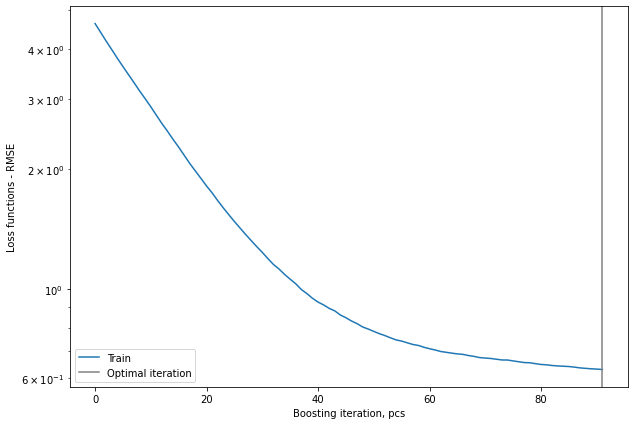

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -1.11
RMSE: 0.6
Relative RMSE(%):  0.120
MSE: 0.4
R square: 68.8%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 2.020
a1: 0.608
R^2: 0.701
Uncertainty
a0: 2.02+/-0.15
a1: 0.608+/-0.028


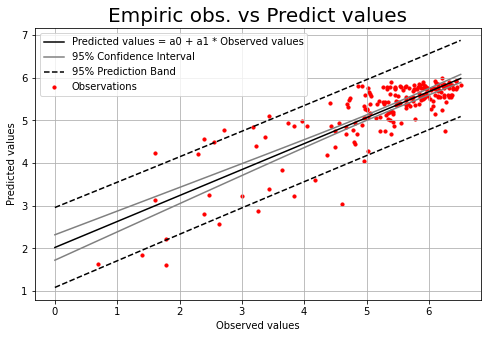

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

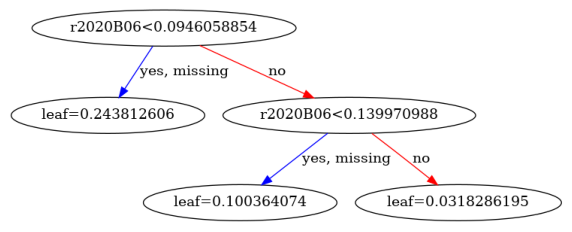

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

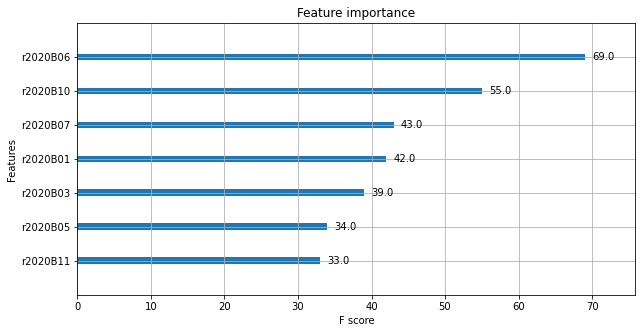

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

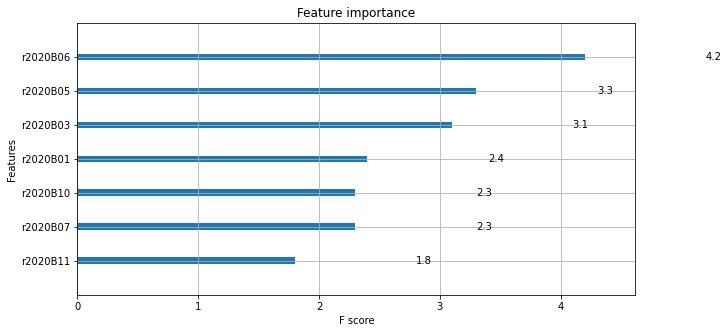

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

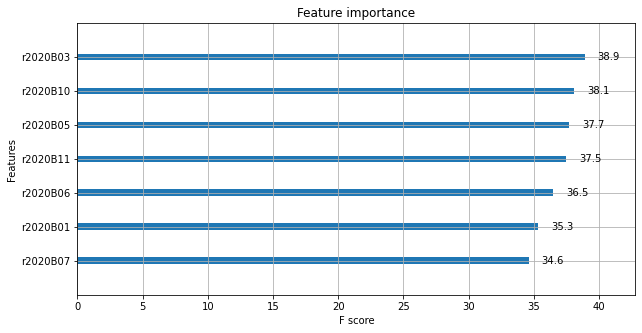

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


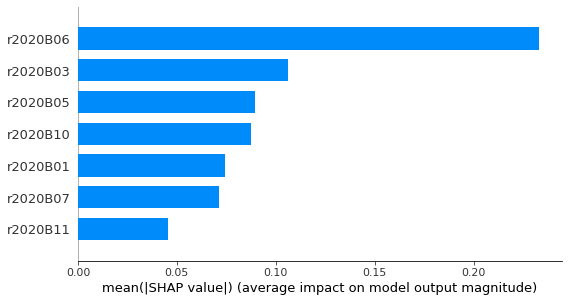

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

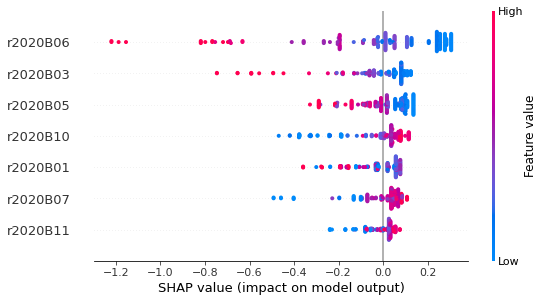

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

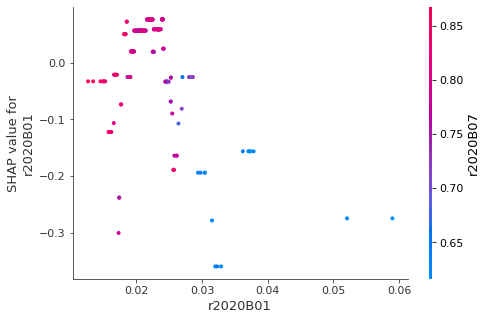

invalid value encountered in true_divide
invalid value encountered in true_divide


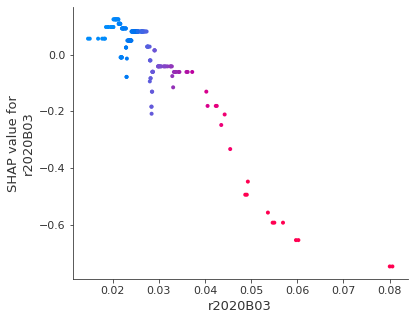

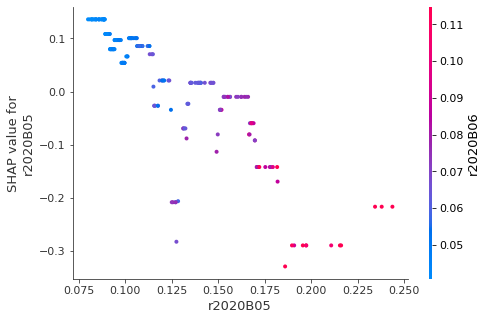

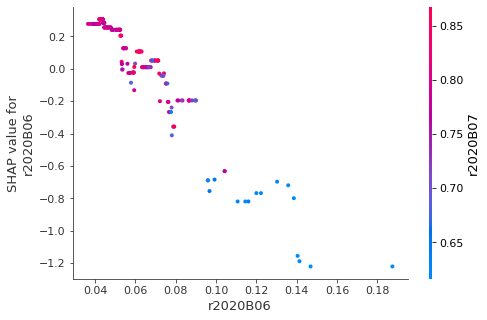

invalid value encountered in true_divide
invalid value encountered in true_divide


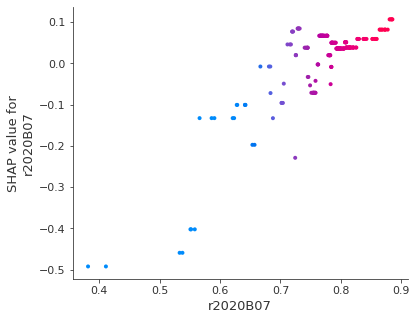

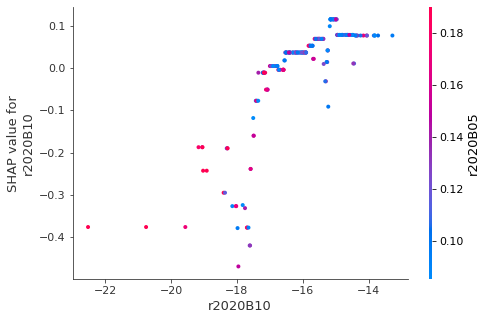

invalid value encountered in true_divide
invalid value encountered in true_divide


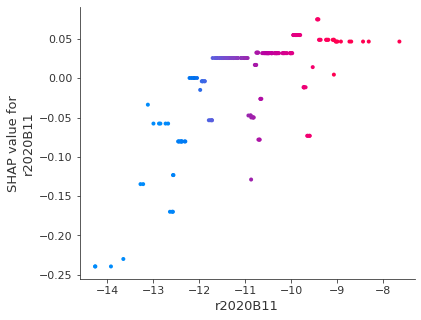

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [48]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_GS_Sentinel_data_2020.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_GS_Sentinel_data_2020.txt")